# **AirBnB Price in European Cities**  (Stage 3)

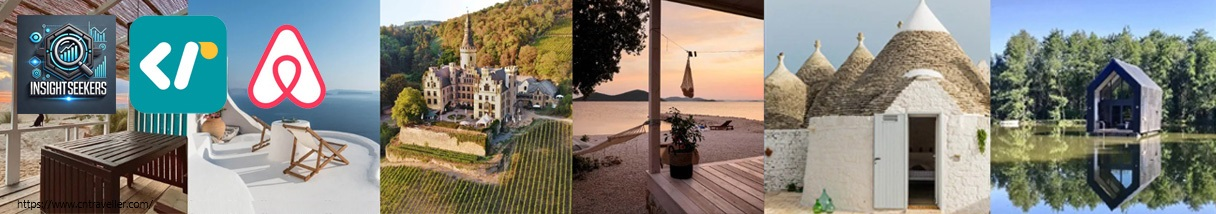

# **Team FinPro-8 InsightSeekers :**

1.	Risanto Darmawan
2.	Asri Nur Azizah
3.	Fransiska Angelina
4.	Naufa Tasha Nabila

#Problem Statement

Permintaan sewa properti Airbnb di 10 kota besar Eropa menjadi salah satu tantangan kompleks tersendiri bagi para pemilik properti. Hal ini disebakan karena adanya keterkaitan antar properti yang disewakan oleh berbagai faktor seperti lokasi, guest satisfaction, spesifikasi properti, metro distance, dan sebagainya. Adanya perbedaan tersebut mengakibatkan para pemilik properti Airbnb kesulitan menentukan harga sewa yang tepat. <br>
Berangkat dari kondisi tersebut, dibutuhkan tools atau model prediksi harga yang dapat membantu business owner untuk menentukan range harga yang tepat dan kompetitif untuk properti airbnb yang mereka miliki. Dengan adanya model prediksi tersebut, kiranya dapat membantu para business owner untuk mengoptimalisasi kinerja dari bisnis yang mereka jalani, membantu dalam menentukan strategi pemasaran, hingga mendorong adanya peningkatan kualitas layanan.

#Goal

Optimalisasi harga sewa properti menggunakan model machine learning yang  komprehensif untuk Airbnb. Tujuannya untuk memaksimalkan pendapatan pemilik properti sekaligus meningkatkan kepuasan pelanggan melalui penentuan harga yang optimal dan relevan berdasarkan faktor-faktor seperti tipe kamar, lokasi, kebersihan, dan lainnya.

## **A. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures, MinMaxScaler
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.2
seaborn version :  0.13.2


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving amsterdam_weekdays.csv to amsterdam_weekdays.csv
Saving amsterdam_weekends.csv to amsterdam_weekends.csv
Saving athens_weekdays.csv to athens_weekdays.csv
Saving athens_weekends.csv to athens_weekends.csv
Saving barcelona_weekdays.csv to barcelona_weekdays.csv
Saving barcelona_weekends.csv to barcelona_weekends.csv
Saving berlin_weekdays.csv to berlin_weekdays.csv
Saving berlin_weekends.csv to berlin_weekends.csv
Saving budapest_weekdays.csv to budapest_weekdays.csv
Saving budapest_weekends.csv to budapest_weekends.csv
Saving lisbon_weekdays.csv to lisbon_weekdays.csv
Saving lisbon_weekends.csv to lisbon_weekends.csv
Saving london_weekdays.csv to london_weekdays.csv
Saving london_weekends.csv to london_weekends.csv
Saving paris_weekdays.csv to paris_weekdays.csv
Saving paris_weekends.csv to paris_weekends.csv
Saving rome_weekdays.csv to rome_weekdays.csv
Saving rome_weekends.csv to rome_weekends.csv
Saving vienna_weekdays.csv to vienna_weekdays.csv
Saving vienna_weekends.csv to 

## **B. Import Data**

In [ ]:
#1 Amsterdam
amsterdam_weekdays = pd.read_csv('amsterdam_weekdays.csv')
amsterdam_weekends = pd.read_csv('amsterdam_weekends.csv')
#2 Athens
athens_weekdays = pd.read_csv('athens_weekdays.csv')
athens_weekends = pd.read_csv('athens_weekends.csv')
#3 Barcelona
barcelona_weekdays = pd.read_csv('barcelona_weekdays.csv')
barcelona_weekends = pd.read_csv('barcelona_weekends.csv')
#4 Berlin
berlin_weekdays = pd.read_csv('berlin_weekdays.csv')
berlin_weekends = pd.read_csv('berlin_weekends.csv')
#5 Budapest
budapest_weekdays = pd.read_csv('budapest_weekdays.csv')
budapest_weekends = pd.read_csv('budapest_weekends.csv')
#6 Lisbon
lisbon_weekdays = pd.read_csv('lisbon_weekdays.csv')
lisbon_weekends = pd.read_csv('lisbon_weekends.csv')
#7 London
london_weekdays = pd.read_csv('london_weekdays.csv')
london_weekends = pd.read_csv('london_weekends.csv')
#8 Paris
paris_weekdays = pd.read_csv('paris_weekdays.csv')
paris_weekends = pd.read_csv('paris_weekends.csv')
#9 Rome
rome_weekdays = pd.read_csv('rome_weekdays.csv')
rome_weekends = pd.read_csv('rome_weekends.csv')
#10 Vienna
vienna_weekdays = pd.read_csv('vienna_weekdays.csv')
vienna_weekends = pd.read_csv('vienna_weekends.csv')

In [ ]:
print('amsterdam_weekdays shape = ' + str(amsterdam_weekdays.shape))
print('amsterdam_weekends shape = ' + str(amsterdam_weekends.shape))
print('athens_weekdays shape = ' + str(athens_weekdays.shape))
print('athens_weekends shape = ' + str(athens_weekends.shape))
print('barcelona_weekdays shape = ' + str(barcelona_weekdays.shape))
print('barcelona_weekends shape = ' + str(barcelona_weekends.shape))
print('berlin_weekdays shape = ' + str(berlin_weekdays.shape))
print('berlin_weekends shape = ' + str(berlin_weekends.shape))
print('budapest_weekdays shape = ' + str(budapest_weekdays.shape))
print('budapest_weekends shape = ' + str(budapest_weekends.shape))
print('lisbon_weekdays shape = ' + str(lisbon_weekdays.shape))
print('lisbon_weekends shape = ' + str(lisbon_weekends.shape))
print('london_weekdays shape = ' + str(london_weekdays.shape))
print('london_weekends shape = ' + str(london_weekends.shape))
print('paris_weekdays shape = ' + str(paris_weekdays.shape))
print('paris_weekends shape = ' + str(paris_weekends.shape))
print('rome_weekdays shape = ' + str(rome_weekdays.shape))
print('rome_weekends shape = ' + str(rome_weekends.shape))
print('vienna_weekdays shape = ' + str(vienna_weekdays.shape))
print('vienna_weekends shape = ' + str(vienna_weekends.shape))

amsterdam_weekdays shape = (1103, 20)
amsterdam_weekends shape = (977, 20)
athens_weekdays shape = (2653, 20)
athens_weekends shape = (2627, 20)
barcelona_weekdays shape = (1555, 20)
barcelona_weekends shape = (1278, 20)
berlin_weekdays shape = (1284, 20)
berlin_weekends shape = (1200, 20)
budapest_weekdays shape = (2074, 20)
budapest_weekends shape = (1948, 20)
lisbon_weekdays shape = (2857, 20)
lisbon_weekends shape = (2906, 20)
london_weekdays shape = (4614, 20)
london_weekends shape = (5379, 20)
paris_weekdays shape = (3130, 20)
paris_weekends shape = (3558, 20)
rome_weekdays shape = (4492, 20)
rome_weekends shape = (4535, 20)
vienna_weekdays shape = (1738, 20)
vienna_weekends shape = (1799, 20)


In [ ]:
amsterdam_weekdays.columns

Index(['Unnamed: 0', 'realSum', 'room_type', 'room_shared', 'room_private',
       'person_capacity', 'host_is_superhost', 'multi', 'biz',
       'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist',
       'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index',
       'rest_index_norm', 'lng', 'lat'],
      dtype='object')

#### **Insight**
- Dari seluruh dataset, masing-masing kota memiliki kolom/features yang sama yaitu sebanyak 20 kolom yang terdiri dari Unnamed, realSum, room_type, room_shared, room_private,person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, dan lat.
- Masing-masing dataset memiliki jumlah baris yang berbeda.
- Dengan jumlah kolom yang sama namun jumlah baris yang berbeda dapat dilakukan combine seluruh dataset menjadi satu dataset dengan menambahkan kolom baru yang berisi keterangan kota (city) dan kategori hari (week_time).

## **C. Combine Data**

In [ ]:
def combine(csv_1,col_1,csv_2,col_2,city): # Dictionary untuk menggabungkan weekdays dan weekend tiap kota
    csv_1['week_time'] = col_1
    csv_2['week_time'] = col_2
    csv_1.drop(columns = ['Unnamed: 0'],inplace=True)
    csv_2.drop(columns = ['Unnamed: 0'],inplace=True)
    merged = pd.concat([csv_1, csv_2])
    merged['city'] = city
    return merged

In [ ]:
amsterdam = combine(amsterdam_weekdays,'weekdays',amsterdam_weekends,'weekends','amsterdam')
athens = combine(athens_weekdays,'weekdays',athens_weekends,'weekends','athens')
barcelona = combine(barcelona_weekdays,'weekdays',barcelona_weekends,'weekends','barcelona')
berlin = combine(berlin_weekdays,'weekdays',berlin_weekends,'weekends','berlin')
budapest = combine(budapest_weekdays,'weekdays',budapest_weekends,'weekends','budapest')
lisbon = combine(lisbon_weekdays,'weekdays',lisbon_weekends,'weekends','lisbon')
london = combine(london_weekdays,'weekdays',london_weekends,'weekends','london')
paris = combine(paris_weekdays,'weekdays',paris_weekends,'weekends','paris')
rome = combine(rome_weekdays,'weekdays',rome_weekends,'weekends','rome')
vienna = combine(vienna_weekdays,'weekdays',vienna_weekends,'weekends','vienna')

In [ ]:
cities_names = ['amsterdam', 'athens', 'barcelona', 'berlin', 'budapest', 'lisbon', 'london', 'paris', 'rome', 'vienna']
cities = [amsterdam, athens, barcelona, berlin, budapest, lisbon, london, paris, rome, vienna]

In [ ]:
europe = pd.concat(cities, ignore_index=True) #menggabungkan seluruh dataset

In [ ]:
europe.sample(5)

realSum        room_type  room_shared  room_private  \
36212  1007.782645  Entire home/apt        False         False   
46185   121.338227     Private room        False          True   
21608   175.656660     Private room        False          True   
42803    97.725200     Private room        False          True   
31876  1085.867495  Entire home/apt        False         False   

       person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
36212              4.0               True      0    0                10.0   
46185              2.0               True      1    0                10.0   
21608              2.0              False      1    0                 9.0   
42803              3.0               True      1    0                10.0   
31876              6.0              False      0    0                 9.0   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
36212                        95.0  ...  2.091873    0.187071  318.968039   
46185                       100.0  ...  5.029934    1.134159  218.508759   
21608                        92.0  ...  1.685212    0.949598  137.251439   
42803                        99.0  ...  2.585146    0.689377  298.020819   
31876                       100.0  ...  5.012831    0.519665  258.205683   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
36212        15.509844  730.155855        33.683792   2.35370  48.83776   
46185         4.841158  627.023312        13.661317  12.46847  41.86328   
21608         4.527001  400.788403        22.525368  -9.15900  38.71181   
42803         6.604200  728.067063        15.852070  12.50800  41.87800   
31876        17.948884  558.299832         9.992594  -0.18891  51.48464   

       week_time    city  
36212   weekends   paris  
46185   weekends    rome  
21608   weekends  lisbon  
42803   weekdays    rome  
31876   weekends  london  

[5 rows x 21 columns]

In [ ]:
europe.shape

(51707, 21)

Dataset europe terdapat 51707 baris dengan 21 kolom atau feature.

## **D. Exploration Data Analysis**

### **1. Descriptive Statistics**

In [ ]:
numerical = ['realSum', 'person_capacity', 'multi', 'biz', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm', 'lng', 'lat']
categorical = ['room_type', 'room_shared', 'room_private', 'host_is_superhost', 'week_time', 'city']

In [ ]:
europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

Apabila kita lebih teliti lagi dari isi dataset yang ada dan info yang diberikan terdapat beberapa kolom yang harus dilakukan perubahan dataset untuk memudahkan dalam kegiatan analisis nantinya seperti:  
- kolom room_type bisa dilakukan perubahan dari object (private room, shared room, entire home/apt) dilakukan encoding menjadi angka dan tipe data dilakukan perubahan dari object menjadi int64.    
- kolom room_shared, room_private, dan host_is_superhost bisa dilakukan perubahan isi kolom yang semula TRUE FALSE menjadi angka (1 dan 0) dengan mengubah tipe data boolean menjadi int64.    
- kolom person_capacity bisa dilakukan perubahan tipe data menjadi int64 karena isi dalam kolom tersebut merupakan angka bulat.    
- kolom cleanliness_rating dan guest_satisfaction_overall bisa dilakukan perubahan tipe data dari float64 menjadi int64 karena data yang terdapat dalam kolom tidak ada angka di belakang koma.    
- kolom week_time bisa dilakukan encoding dengan mengubah weekend dan weekday menjadi angka 1 dan 0. Selain itu, dilakukan perubahan tipe data dari object menjadi int64.    
- kolom city bisa dilakukan encoding dengan mengubah semua nama kota menjadi angka. Selain itu, dilakukan perubahan tipe data dari object menjadi int64.    
- kolom unnamed:0 bisa dilakukan drop kolom karena tidak memiliki pengaruh terhadap fitur lain.    

In [ ]:
europe[numerical].describe()

realSum  person_capacity         multi           biz  \
count  51707.000000     51707.000000  51707.000000  51707.000000   
mean     279.879591         3.161661      0.291353      0.350204   
std      327.948386         1.298545      0.454390      0.477038   
min       34.779339         2.000000      0.000000      0.000000   
25%      148.752174         2.000000      0.000000      0.000000   
50%      211.343089         3.000000      0.000000      0.000000   
75%      319.694287         4.000000      1.000000      1.000000   
max    18545.450285         6.000000      1.000000      1.000000   

       cleanliness_rating  guest_satisfaction_overall     bedrooms  \
count        51707.000000                51707.000000  51707.00000   
mean             9.390624                   92.628232      1.15876   
std              0.954868                    8.945531      0.62741   
min              2.000000                   20.000000      0.00000   
25%              9.000000                   90.000000      1.00000   
50%             10.000000                   95.000000      1.00000   
75%             10.000000                   99.000000      1.00000   
max             10.000000                  100.000000     10.00000   

               dist    metro_dist    attr_index  attr_index_norm  \
count  51707.000000  51707.000000  51707.000000     51707.000000   
mean       3.191285      0.681540    294.204105        13.423792   
std        2.393803      0.858023    224.754123         9.807985   
min        0.015045      0.002301     15.152201         0.926301   
25%        1.453142      0.248480    136.797385         6.380926   
50%        2.613538      0.413269    234.331748        11.468305   
75%        4.263077      0.737840    385.756381        17.415082   
max       25.284557     14.273577   4513.563486       100.000000   

         rest_index  rest_index_norm           lng           lat  
count  51707.000000     51707.000000  51707.000000  51707.000000  
mean     626.856696        22.786177      7.426068     45.671128  
std      497.920226        17.804096      9.799725      5.249263  
min       19.576924         0.592757     -9.226340     37.953000  
25%      250.854114         8.751480     -0.072500     41.399510  
50%      522.052783        17.542238      4.873000     47.506690  
75%      832.628988        32.964603     13.518825     51.471885  
max     6696.156772       100.000000     23.786020     52.641410

**KESIMPULAN DARI DESCRIBE**
- kolom realSum memiliki jarak yang cukup jauh antara nilai mean dan nilai max. Hal ini dapat berakibat adanya outlier yang akan mempengaruhi hasil analisis. Mungkin dapat dilakukan peruabahan angka dalam kolom tersebut menjadi log untuk meminimalisir pengaruh outlier.  
- kolom cleanliness_rating memiliki jarak yang cukup dekat antara nilai mean dan nilai max. Hal ini mengindikasikan rating yang diberikan oleh customer paling banyak diberikan pada rentang nilai 8-10. Perlu dilakukan analisis lebih lanjut untuk tahu apakah bias atau tidak.  
- kolom guest_satisfaction_overall memiliki jarak yang cukup dekat antara nilai mean dan nilai max. Hal ini mengindikasikan tingkat kepuasan yang diberikan oleh customer paling banyak diberikan pada nilai yang tinggi (87-100). Perlu dilakukan analisis lebih lanjut untuk tahu apakah bias atau tidak.  
- kolom dist memiliki rentan jarak yang cukup besar, dari 0.01 hingga 25.28.Setiap penginapan memiliki jarak yang berbeda dengan pusat kota dan hal ini menunjukkan bahwa terdapat penginapan yang sangat dekat dengan pusat kota dan sangat jauh dari pusat kota. kolom metro_dist memiliki rentang jarak yang cukup besar dari 0.002 hingga 14.27. Ini adalah jarak dari akomodasi yang ada di sekitar penginapan tersebut. Hal ini menunjukkan adanya penginapan yang jaraknya sangat dekat hingga terjauh dari transportasi publik.  
- kolom attr_index, attr_index_norm, rest_index, dan rest_index_norm bisa dianggap sebagai outlier karena adanya rentang nilai mean dan max. Ini bisa menjadi properti yang berlokasi di area yang sangat dekat dengan banyak atraksi atau restoran.  
- Nilai mean dan median yang cukup berbeda, terutama di kolom attr_index_norm dan rest_index_norm, menunjukkan distribusi yang cenderung condong ke bawah, dengan sebagian besar properti tidak memiliki akses maksimal.  

In [ ]:
europe[categorical].describe()

room_type room_shared room_private host_is_superhost week_time  \
count             51707       51707        51707             51707     51707   
unique                3           2            2                 2         2   
top     Entire home/apt       False        False             False  weekends   
freq              32648       51341        33014             38475     26207   

          city  
count    51707  
unique      10  
top     london  
freq      9993

In [ ]:
europe.isnull().sum()

realSum                       0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
week_time                     0
city                          0
dtype: int64

Tidak ada data yang memiliki data kosong.

In [ ]:
print(f'realSum : {europe.realSum.nunique()}')
print(f'room_type : {europe.room_type.nunique()}')
print(f'room_shared : {europe.room_shared.nunique()}')
print(f'room_private : {europe.room_private.nunique()}')
print(f'person_capacity : {europe.person_capacity.nunique()}')
print(f'host_is_superhost : {europe.host_is_superhost.nunique()}')
print(f'multi : {europe.multi.nunique()}')
print(f'biz : {europe.biz.nunique()}')
print(f'cleanliness_rating : {europe.cleanliness_rating.nunique()}')
print(f'guest_satisfaction_overall : {europe.guest_satisfaction_overall.nunique()}')
print(f'bedrooms : {europe.bedrooms.nunique()}')
print(f'dist : {europe.dist.nunique()}')
print(f'metro_dist : {europe.metro_dist.nunique()}')
print(f'attr_index : {europe.attr_index.nunique()}')
print(f'attr_index_norm : {europe.attr_index_norm.nunique()}')
print(f'rest_index  : {europe.rest_index.nunique()}')
print(f'rest_index_norm : {europe.rest_index_norm.nunique()}')
print(f'lng : {europe.lng.nunique()}')
print(f'lat : {europe.lat.nunique()}')
print(f'week_time : {europe.week_time.nunique()}')
print(f'city : {europe.city.nunique()}')

realSum : 10497
room_type : 3
room_shared : 2
room_private : 2
person_capacity : 5
host_is_superhost : 2
multi : 2
biz : 2
cleanliness_rating : 9
guest_satisfaction_overall : 53
bedrooms : 10
dist : 51707
metro_dist : 51707
attr_index : 51707
attr_index_norm : 51688
rest_index  : 51707
rest_index_norm : 51688
lng : 23600
lat : 21484
week_time : 2
city : 10


### **2. Univariate Analysis**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
europe['person_capacity'].unique()

array([2., 4., 3., 6., 5.])

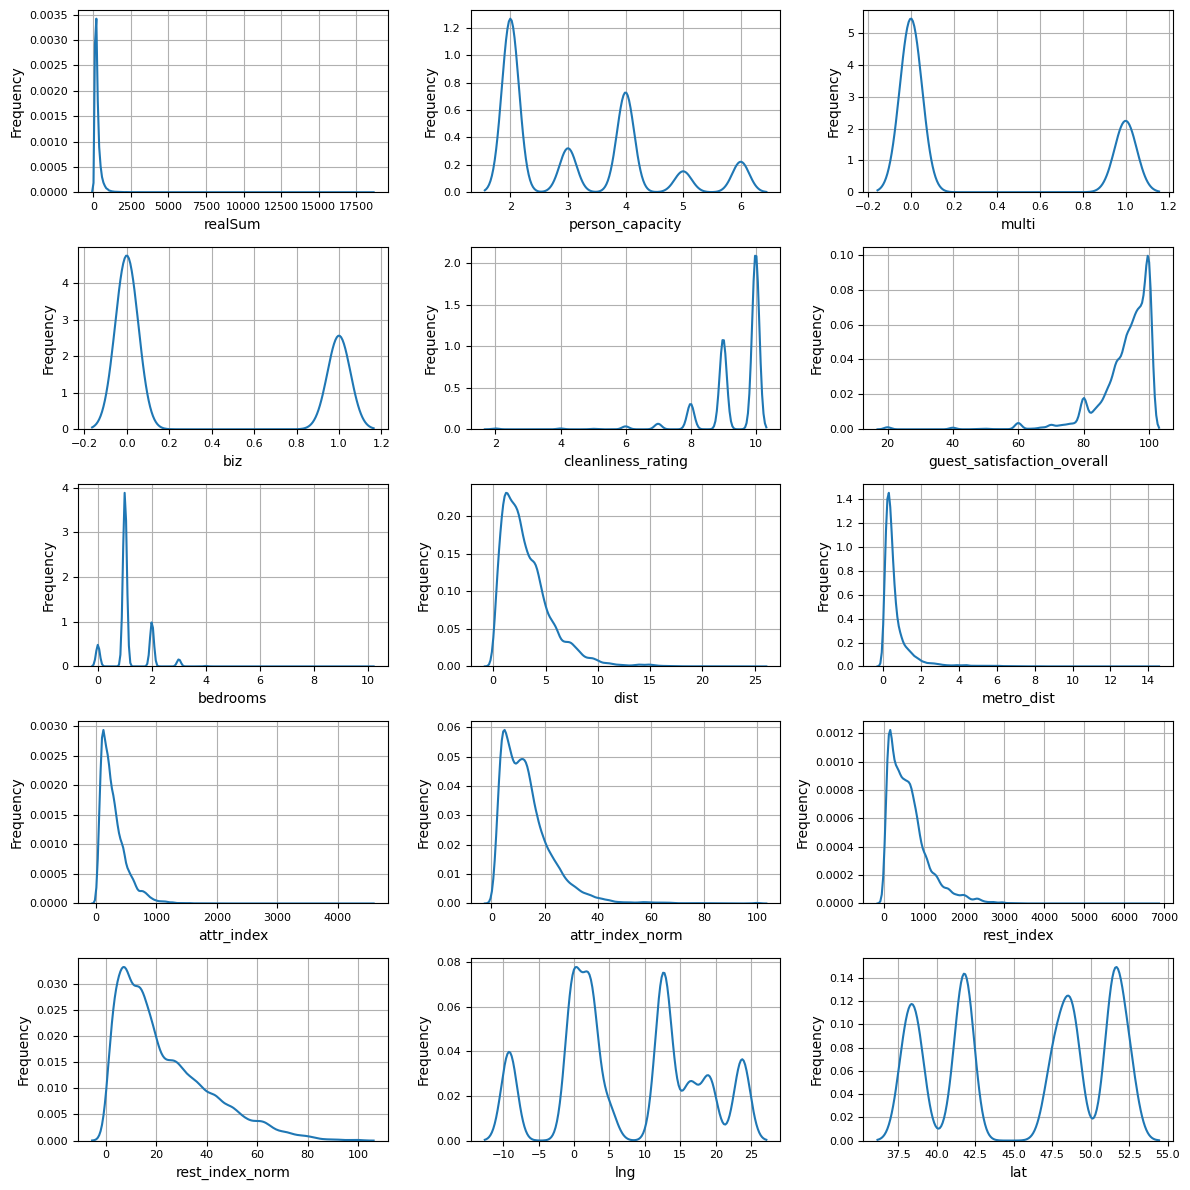

In [ ]:
features = numerical
rcParams['figure.figsize'] = 12, 12
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=europe[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()

plt.savefig('univariate.png')

Dari gambar grafik di atas menunjukkan bahwa
*   Kolom realSum, dist, metro_dist, attr_index, attr_index_norm, rest_index, dan rest_index_norm menunjukkan right skewed untuk persebaran datanya.
*   Kolom multi dan biz terlihat adanya dua puncak karena merupakan data yang terdiri dari dua pilihan, yaitu angka 1 (yes) dan angka 0 (no).
*   Kolom person_capacity, bedrooms, dan cleanliness_rating memiliki beberapa puncak. Hal ini dikarenakan pada kolom bedrooms, person_capacity, dan cleanliness_rating memiliki rentang nilai dari 0 sampai dengan 10. Sedangkan pada kolom guest_satisfaction memiliki rentang nilai dari 20 sampai dengan 100.





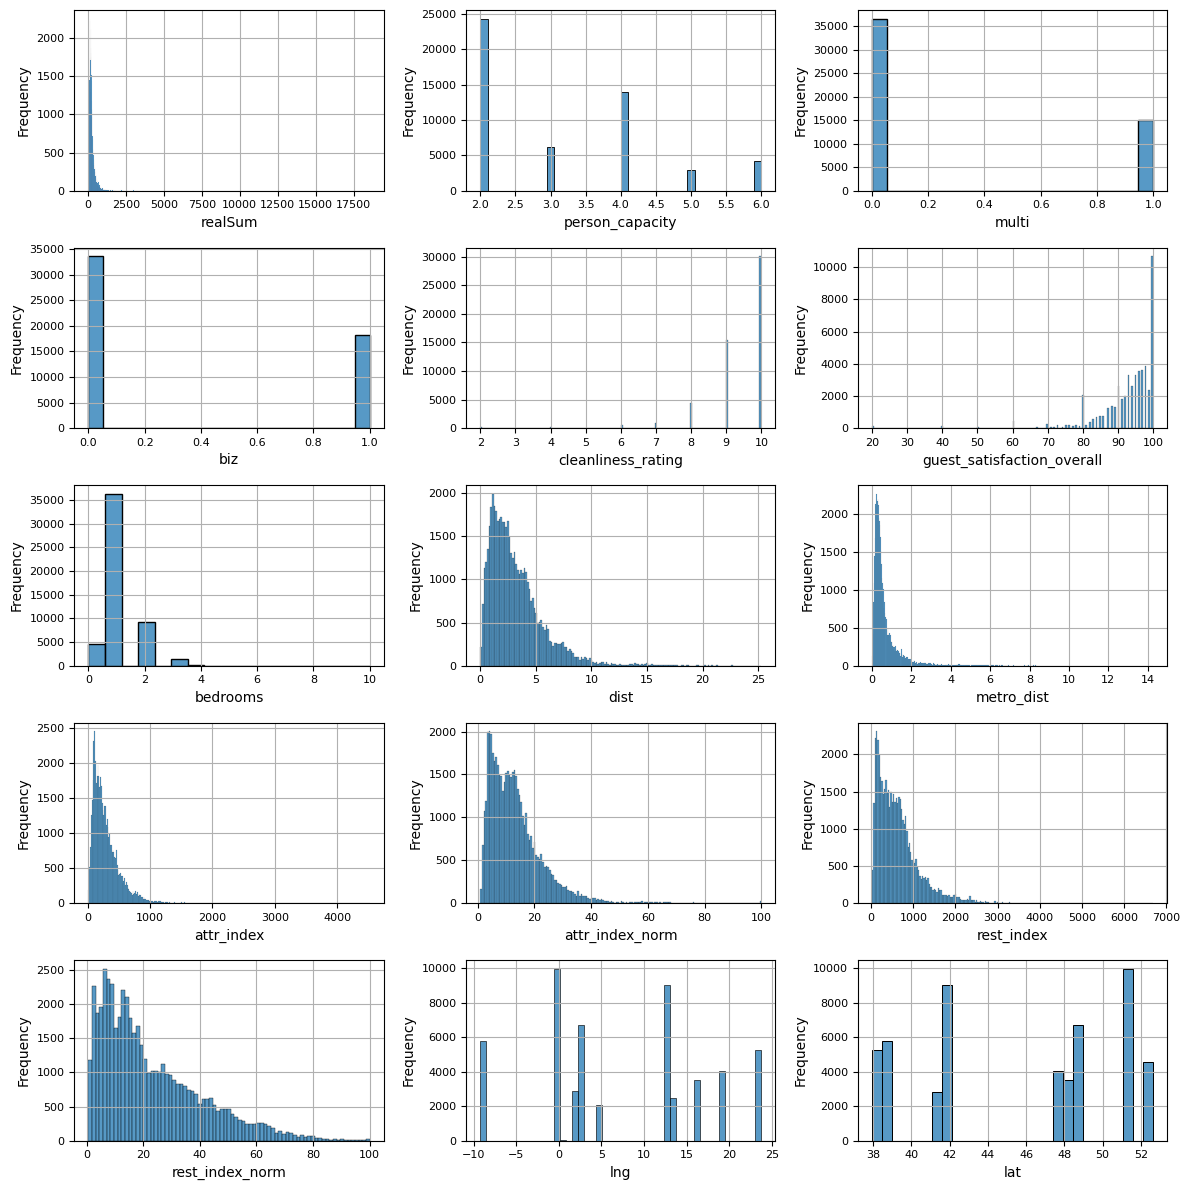

In [ ]:
features = numerical
rcParams['figure.figsize'] = 12, 12
for i in range(0, len(features)):
    plt.subplot(5, 3, i+1)
    sns.histplot(x=europe[features[i]],)
    plt.xlabel(features[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()
    plt.tight_layout()

plt.savefig('hist.png')

Dari gambar grafik di atas menunjukkan bahwa
*   Kolom multi dan biz terlihat dengan jelas bahwa hanya terdapat dua pilihan, yaitu angka 1 (yes) dan angka 0 (no).
*   Kolom person_capacity, bedrooms, dan cleanliness_rating terlihat dengan jelas bahwa pada kolom bedrooms dan person_capacity memiliki rentang nilai mulai dari 0,1, 2, 3, sampai 10. Sedangkan pada kolom guest_satisfaction memiliki rentang nilai dari 68, 70, 71, 72 sampai dengan 100.
*   kolom lat dan lng juga terlihat jelas bahwa terdapat beberapa lokasi yang memiliki titik lokasi yang sama.



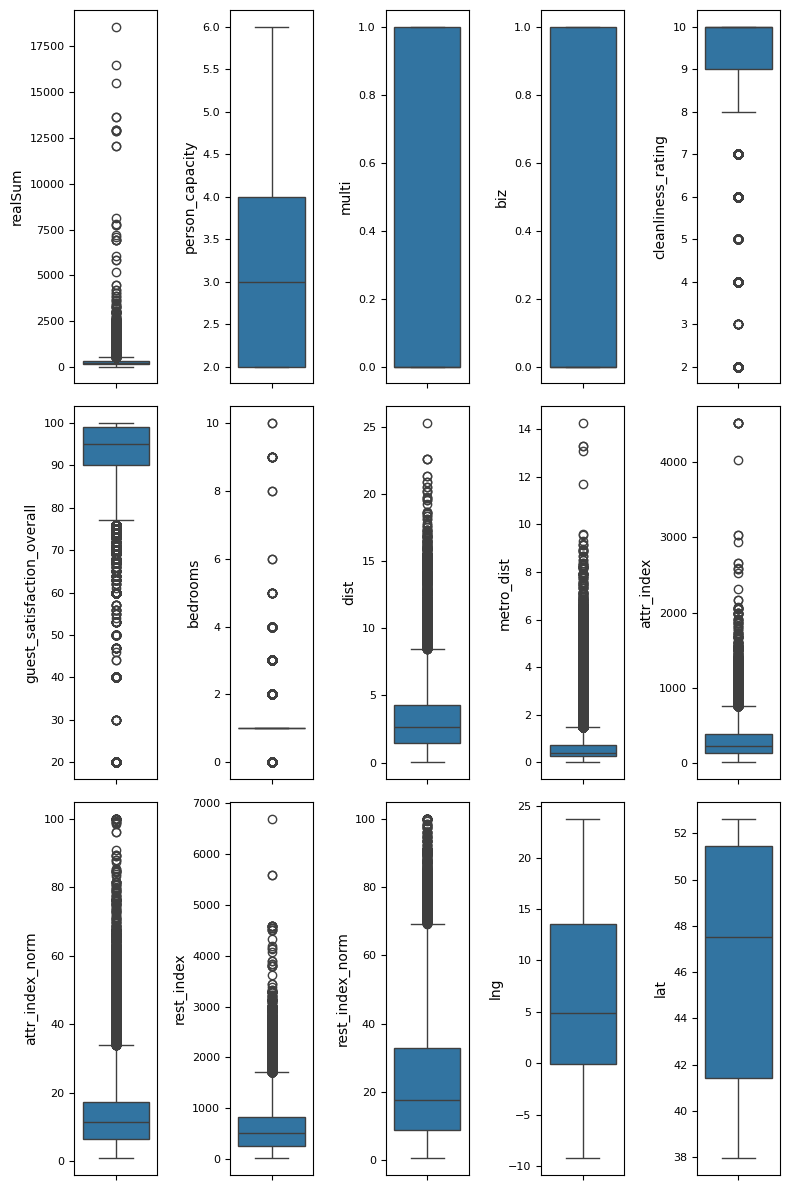

In [ ]:
features = numerical
rcParams['figure.figsize'] = 8, 12
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y=europe[features[i]])
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()
plt.savefig('box.png')

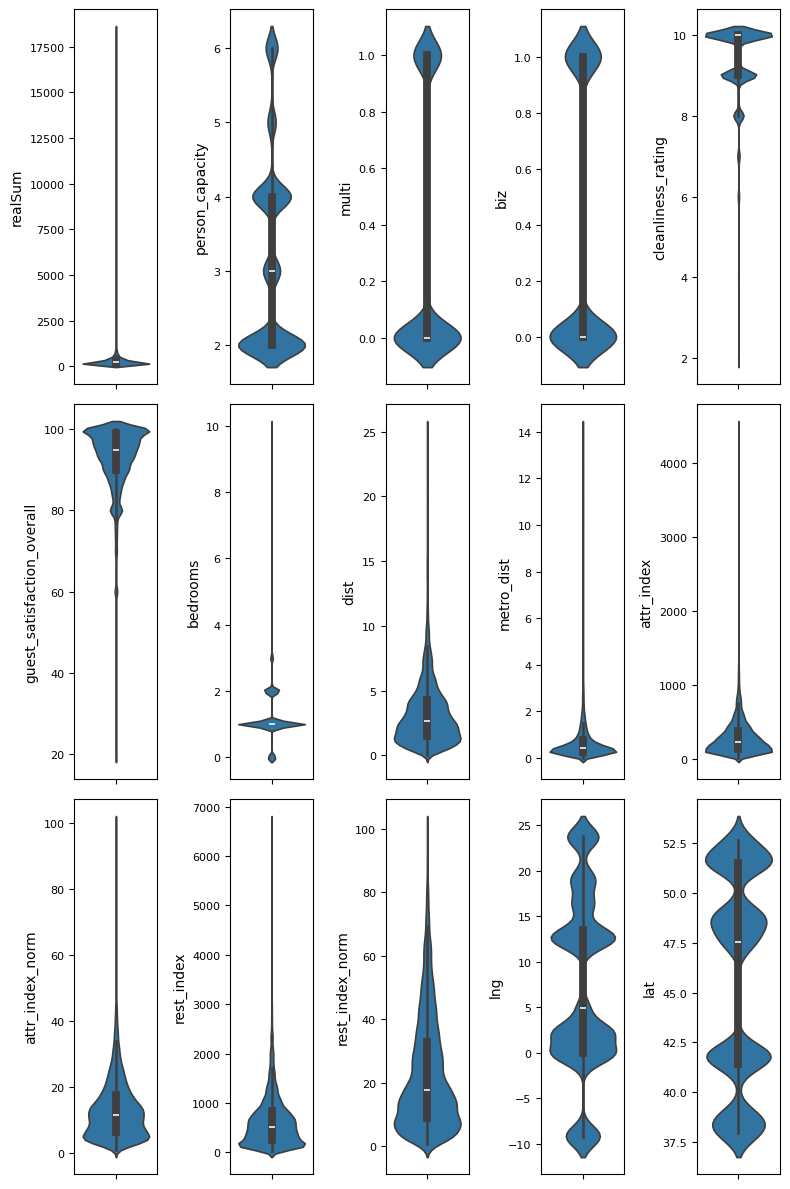

In [ ]:
features = numerical
rcParams['figure.figsize'] = 8, 12
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(y=europe[features[i]])
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()

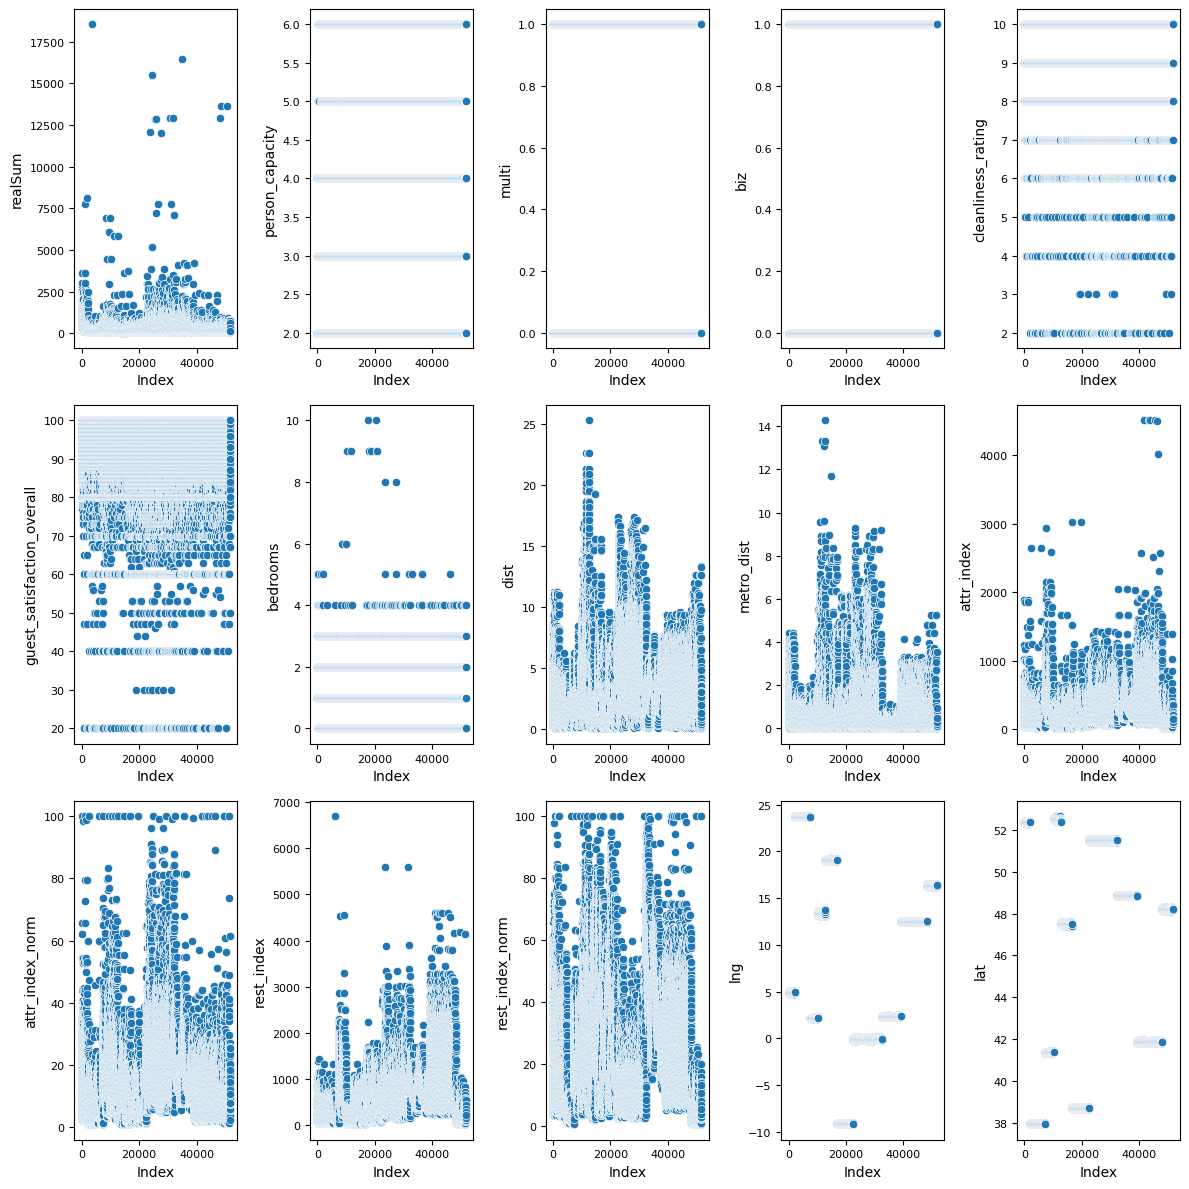

In [ ]:
# Set ukuran figure
rcParams['figure.figsize'] = 12, 12

# Membuat scatter plot untuk setiap fitur
for i in range(0, len(features)):
    plt.subplot(3, 5, i+1)  # 3 baris, 5 kolom
    sns.scatterplot(x=range(len(europe)), y=europe[features[i]])
    plt.xlabel('Index')
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.tight_layout()

# Simpan scatter plot ke file
plt.savefig('scatter.png')

Dari gambar grafik boxplot dan violinplot di atas dapat disimpulkan bahwa terdapat outlier pada kolom realSum, clealiness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, dan rest_index-norm. Sedangkan dari gambar scatter plot terlihat bahwa untuk kolom cleanliness-rating, guest_satisfaction_overall, dan bedrooms tidak terdapat outlier.


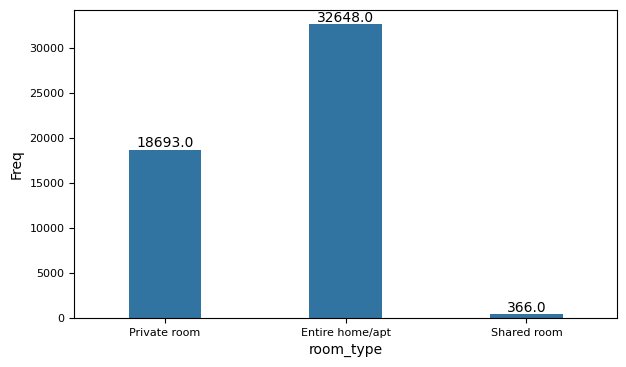

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='room_type', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

Pada kolom room_type, jumlah entire_home/apt lebih banyak dibandingkan private room dan shared room. Akan tetapi, jumlah shared_room tidak lebih dari 500 (sangat sedikit sekali).

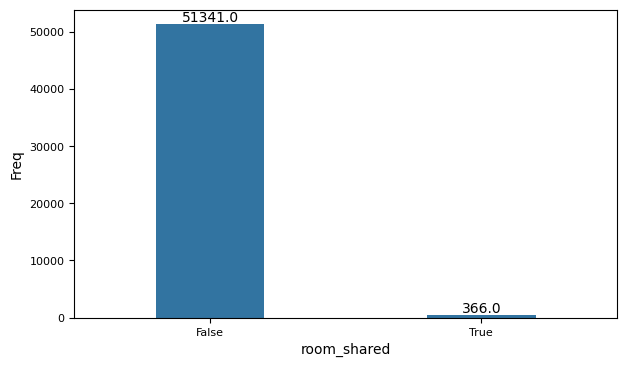

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='room_shared', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

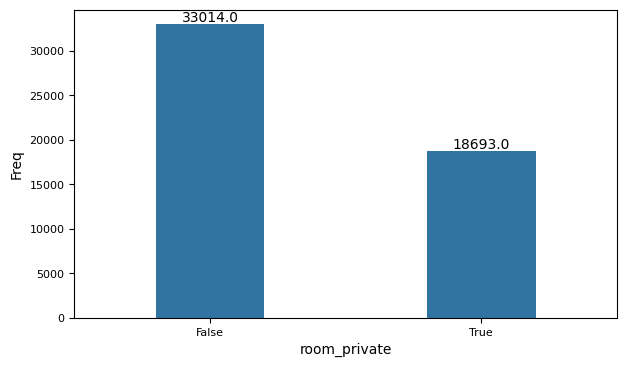

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='room_private', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

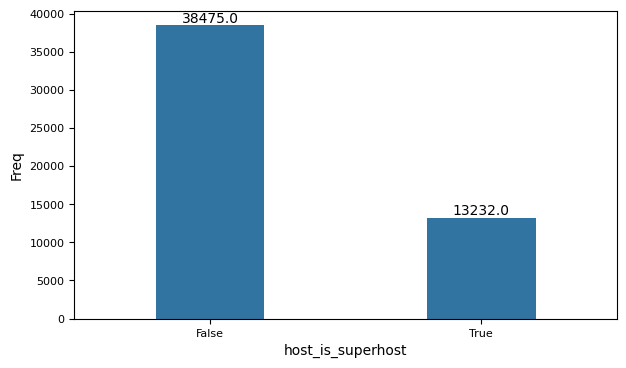

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='host_is_superhost', data= europe, width = 0.4)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

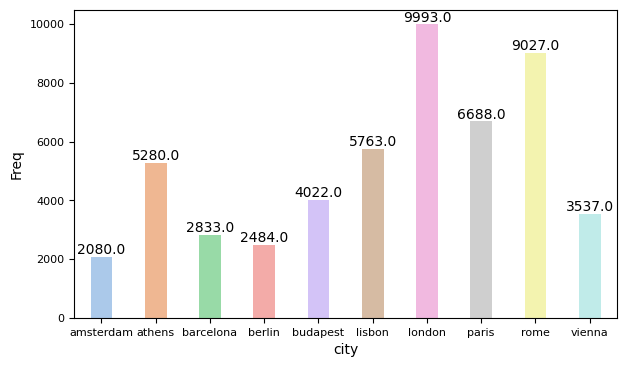

In [ ]:
rcParams['figure.figsize'] = 7, 4
sns.countplot(x='city', data= europe, hue = 'city', width = 0.4, palette = 'pastel', legend=False)
plt.ylabel('Freq')
plt.tick_params(axis='both', which='major', labelsize=8)
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')
plt.show()

### **3. Multivariate Analysis**

### **Feature and Target Relation**

In [ ]:
#Korelasi antar feature atau kolom
europe[numerical].corr()

realSum  person_capacity     multi       biz  \
realSum                     1.000000         0.203077 -0.052926  0.037144   
person_capacity             0.203077         1.000000 -0.054326  0.110668   
multi                      -0.052926        -0.054326  1.000000 -0.470725   
biz                         0.037144         0.110668 -0.470725  1.000000   
cleanliness_rating         -0.006082         0.003256  0.041064 -0.107310   
guest_satisfaction_overall -0.001888         0.005181  0.054254 -0.208160   
bedrooms                    0.221653         0.560627 -0.000659 -0.026741   
dist                       -0.044725        -0.128488  0.033426 -0.164767   
metro_dist                 -0.061025        -0.037267  0.043365 -0.109153   
attr_index                  0.178228         0.028394  0.006319  0.114732   
attr_index_norm             0.292396        -0.050487 -0.041412  0.093720   
rest_index                  0.134722         0.037330  0.007051  0.137747   
rest_index_norm             0.144094         0.038059 -0.037402  0.083999   
lng                        -0.173833         0.146848  0.041260 -0.088943   
lat                         0.211805        -0.168265 -0.034058 -0.126433   

                            cleanliness_rating  guest_satisfaction_overall  \
realSum                              -0.006082                   -0.001888   
person_capacity                       0.003256                    0.005181   
multi                                 0.041064                    0.054254   
biz                                  -0.107310                   -0.208160   
cleanliness_rating                    1.000000                    0.714045   
guest_satisfaction_overall            0.714045                    1.000000   
bedrooms                              0.033489                    0.047573   
dist                                 -0.030202                   -0.004178   
metro_dist                            0.010441                    0.029788   
attr_index                           -0.025322                   -0.050624   
attr_index_norm                      -0.075372                   -0.074146   
rest_index                           -0.031929                   -0.069319   
rest_index_norm                      -0.005995                   -0.008765   
lng                                   0.120379                    0.156079   
lat                                  -0.092502                   -0.033957   

                            bedrooms      dist  metro_dist  attr_index  \
realSum                     0.221653 -0.044725   -0.061025    0.178228   
person_capacity             0.560627 -0.128488   -0.037267    0.028394   
multi                      -0.000659  0.033426    0.043365    0.006319   
biz                        -0.026741 -0.164767   -0.109153    0.114732   
cleanliness_rating          0.033489 -0.030202    0.010441   -0.025322   
guest_satisfaction_overall  0.047573 -0.004178    0.029788   -0.050624   
bedrooms                    1.000000 -0.006262    0.044431   -0.011735   
dist                       -0.006262  1.000000    0.558064   -0.363088   
metro_dist                  0.044431  0.558064    1.000000   -0.168010   
attr_index                 -0.011735 -0.363088   -0.168010    1.000000   
attr_index_norm            -0.063773 -0.242862   -0.219587    0.714847   
rest_index                 -0.014047 -0.346653   -0.138876    0.850229   
rest_index_norm            -0.057726 -0.467791   -0.259654    0.544403   
lng                         0.013688 -0.147424   -0.069506   -0.126942   
lat                        -0.104694  0.405878    0.086424   -0.052438   

                            attr_index_norm  rest_index  rest_index_norm  \
realSum                            0.292396    0.134722         0.144094   
person_capacity                   -0.050487    0.037330         0.038059   
multi                             -0.041412    0.007051        -0.037402   
biz                                0.093720    0.137747   

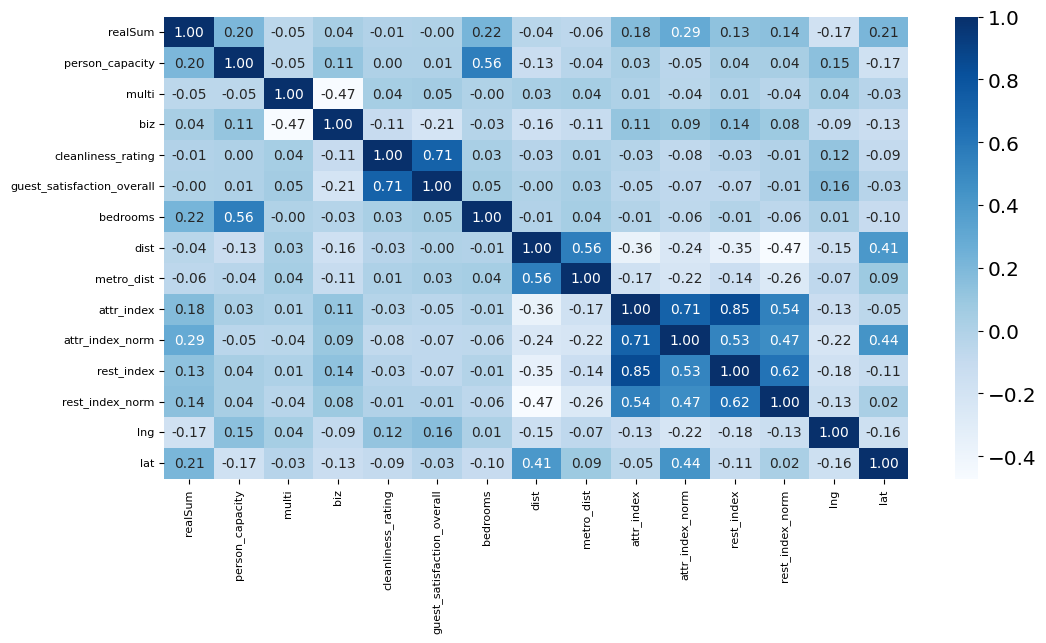

In [ ]:
rcParams['figure.figsize'] = 12, 6
sns.heatmap(europe[numerical].corr(),cmap='Blues', annot=True, fmt = '.2f')
plt.tick_params(axis='both', which='major', labelsize=8)

Dari heatmap di atas menunjukkan bahwa terdapat beberapa feature yang memiliki korelasi sangat kuat sehingg aperlu dilakukan analisis untuk memastikan apakah data-data tersebut redundant atau tidak. Selain itu, juga terdapat korelasi yang sangat lemah antar feature.

### **Antar Feature**

In [ ]:
room_type_values = europe[['room_type', 'city']].value_counts().reset_index()
person_capacity = europe[['person_capacity', 'city']].value_counts().reset_index()

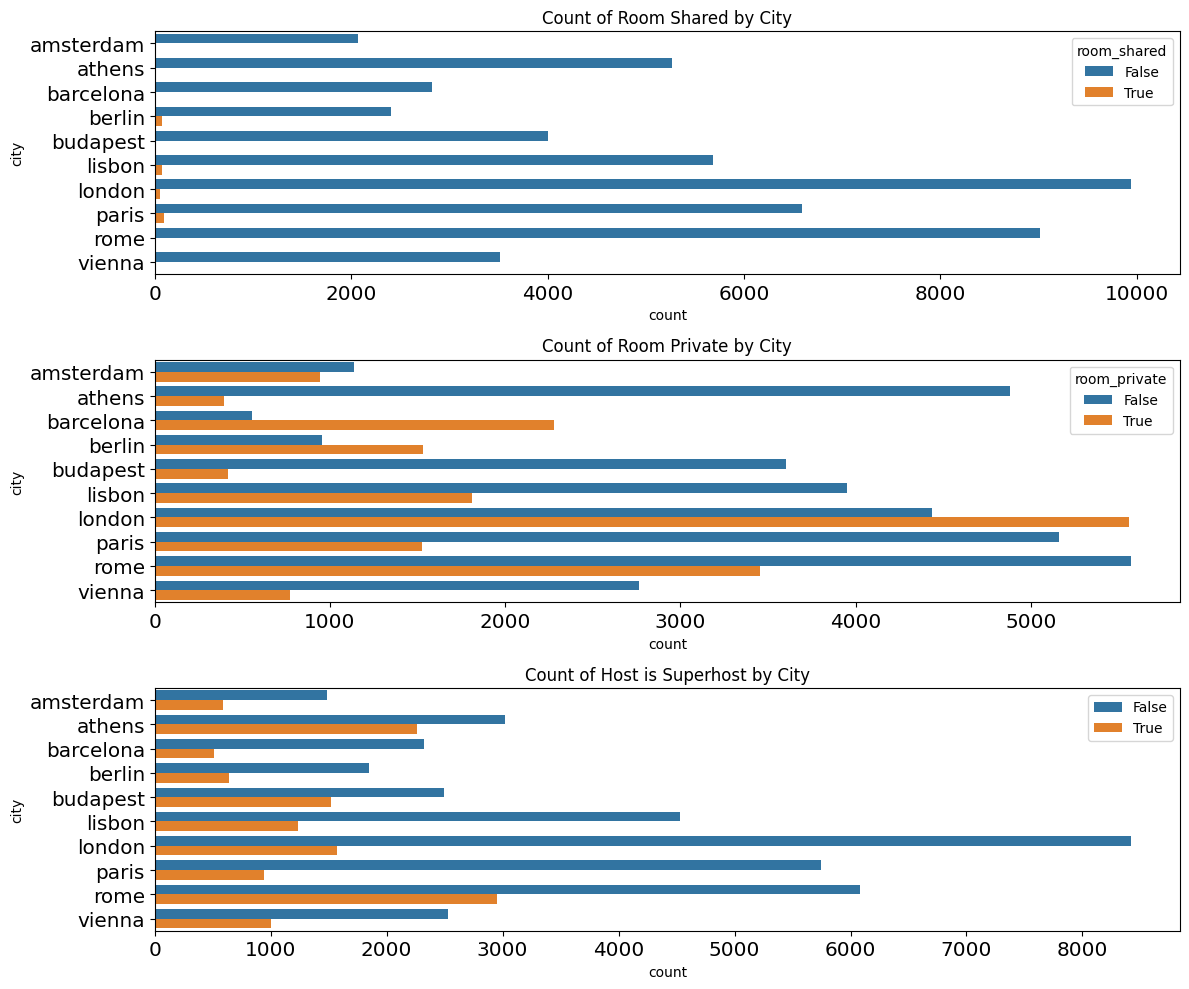

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))
sns.countplot(y='city', data=europe, hue='room_shared', ax=ax[0])
ax[0].set_title('Count of Room Shared by City')
sns.countplot(y='city', data=europe, hue='room_private', ax=ax[1])
ax[1].set_title('Count of Room Private by City')
sns.countplot(y='city', data=europe, hue='host_is_superhost', ax=ax[2])
ax[2].set_title('Count of Host is Superhost by City')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [ ]:
meanprices=europe.groupby(['city','week_time']).realSum.mean().reset_index().sort_values(by=['realSum'])
meanprices=meanprices.rename(columns={'realSum':'mean_price'})

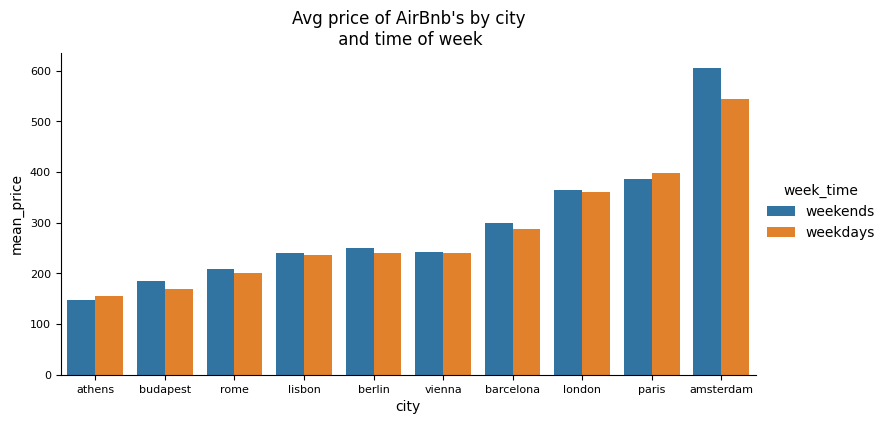

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='city',y='mean_price',hue='week_time',data=meanprices,
           height=4, aspect=2,kind='bar')
plt.title('Avg price of AirBnb\'s by city\n and time of week')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

In [ ]:
number_of_room=europe.groupby(['room_type','person_capacity']).realSum.count().reset_index().sort_values(by=['realSum'])
number_of_room=number_of_room.rename(columns={'realSum':'number_of_room'})

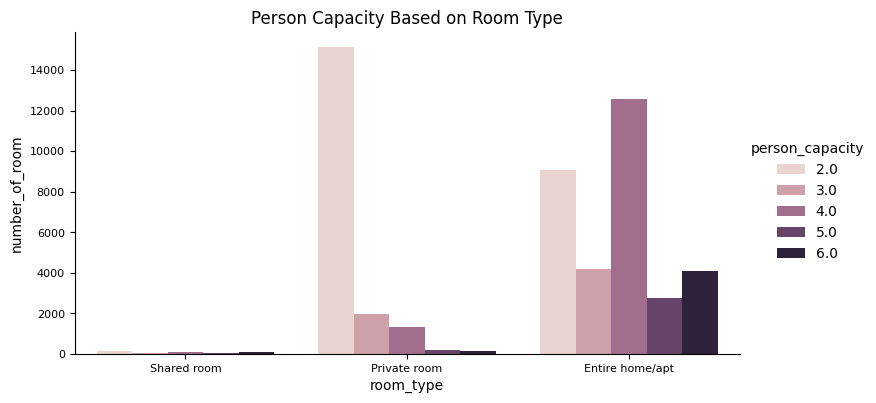

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='room_type',y='number_of_room',hue='person_capacity',data=number_of_room,
           height=4, aspect=2,kind='bar')
plt.title('Person Capacity Based on Room Type')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

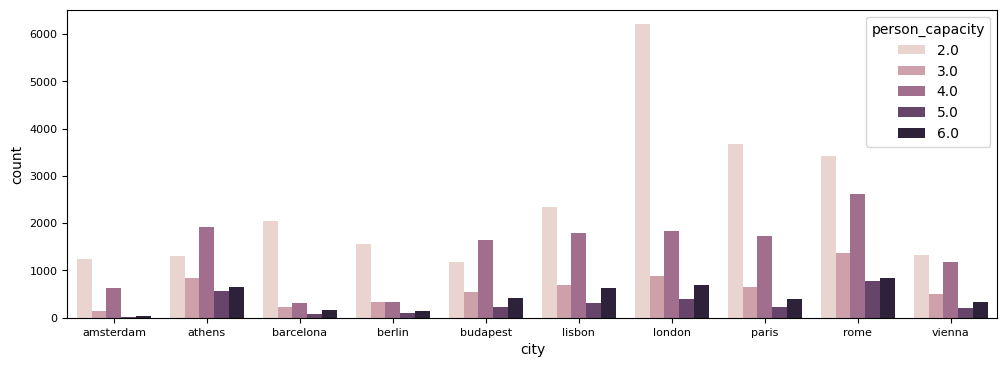

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(x='city',data=europe, hue='person_capacity')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()

In [ ]:
avg_by_room=europe.groupby(['room_type']).realSum.mean().reset_index().sort_values(by=['realSum'])
avg_by_room=avg_by_room.rename(columns={'realSum':'avg_by_room'})

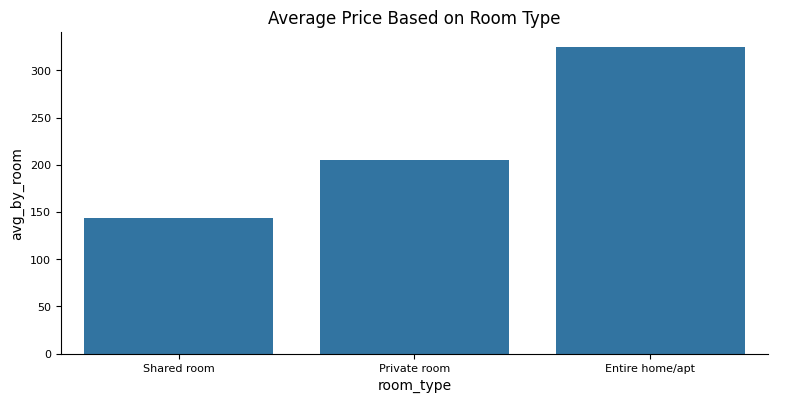

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='room_type',y='avg_by_room',data=avg_by_room,
           height=4, aspect=2,kind='bar')
plt.title('Average Price Based on Room Type')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

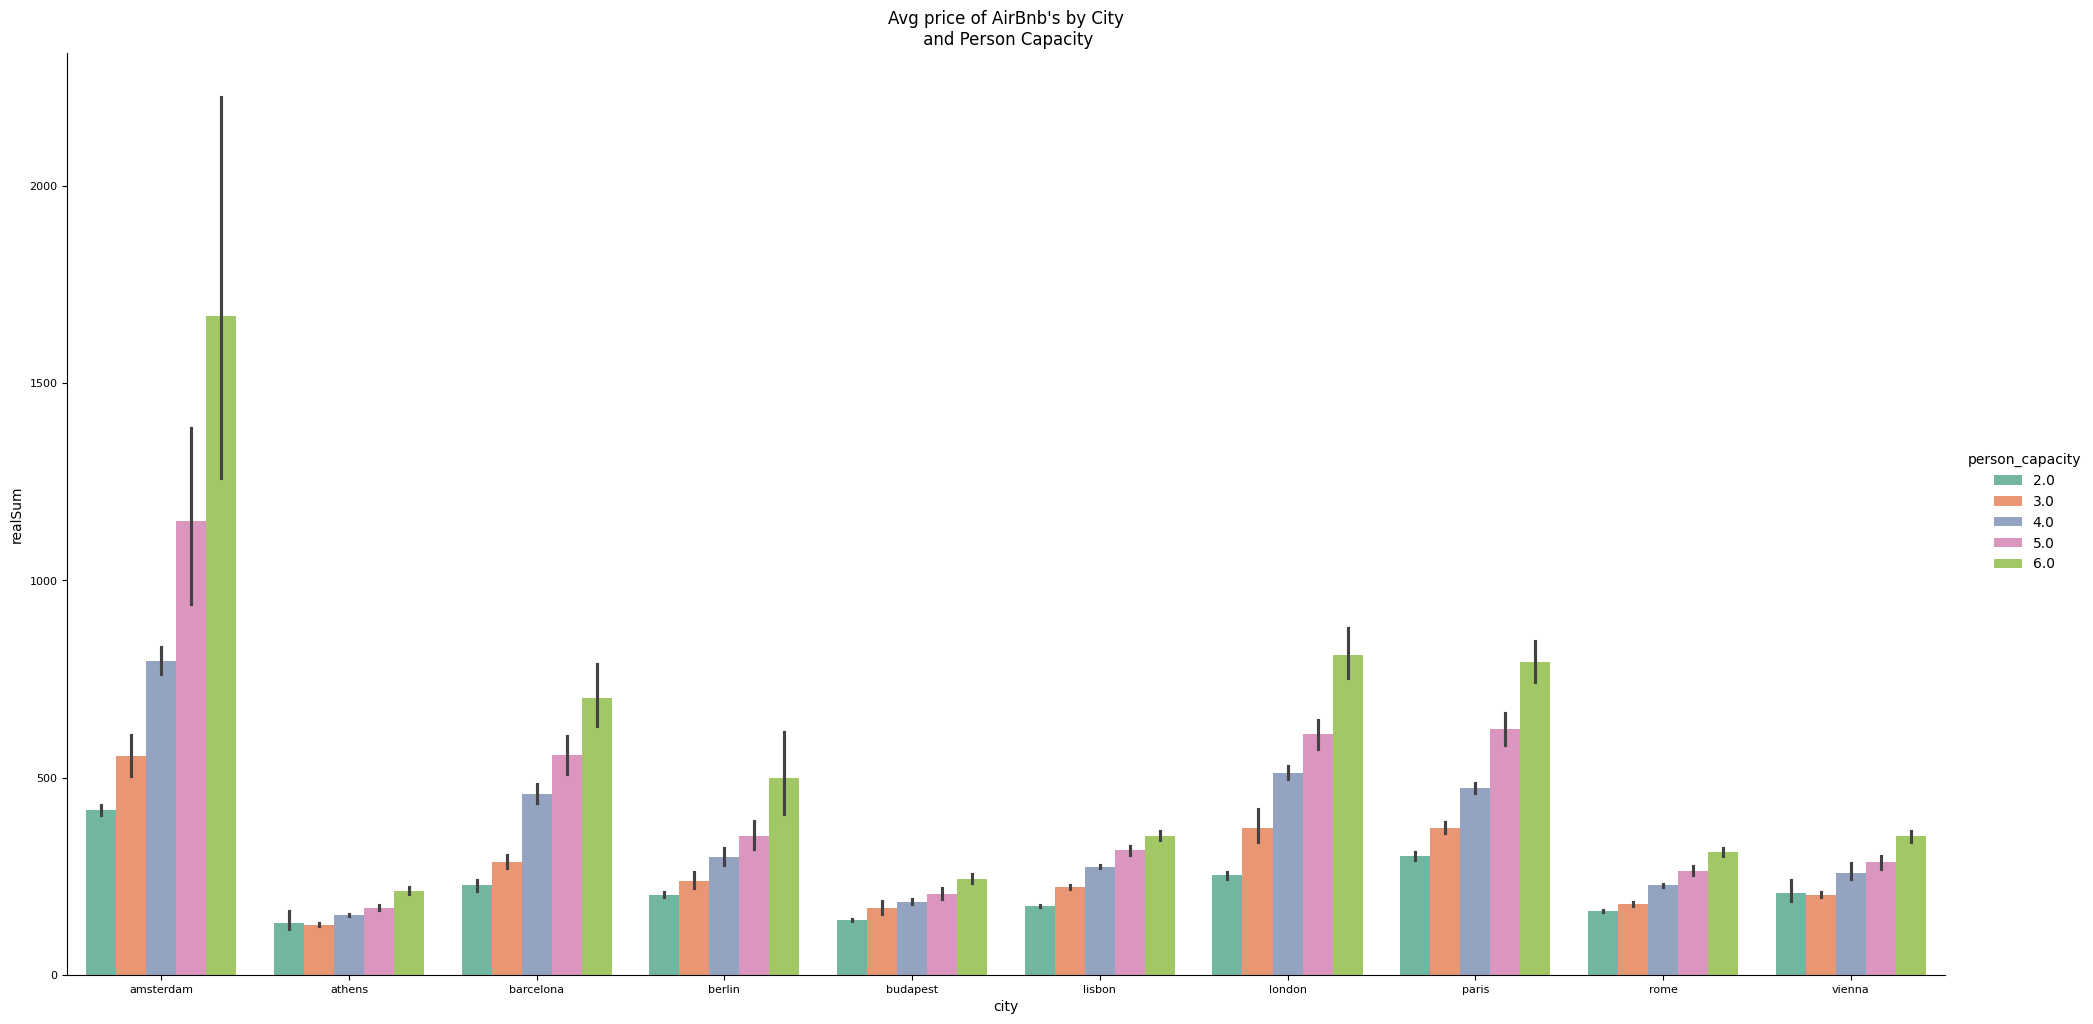

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='city', y='realSum', hue='person_capacity', data=europe,
            height=10, aspect=2, kind='bar', palette='Set2')

plt.title('Avg price of AirBnb\'s by City\n and Person Capacity')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

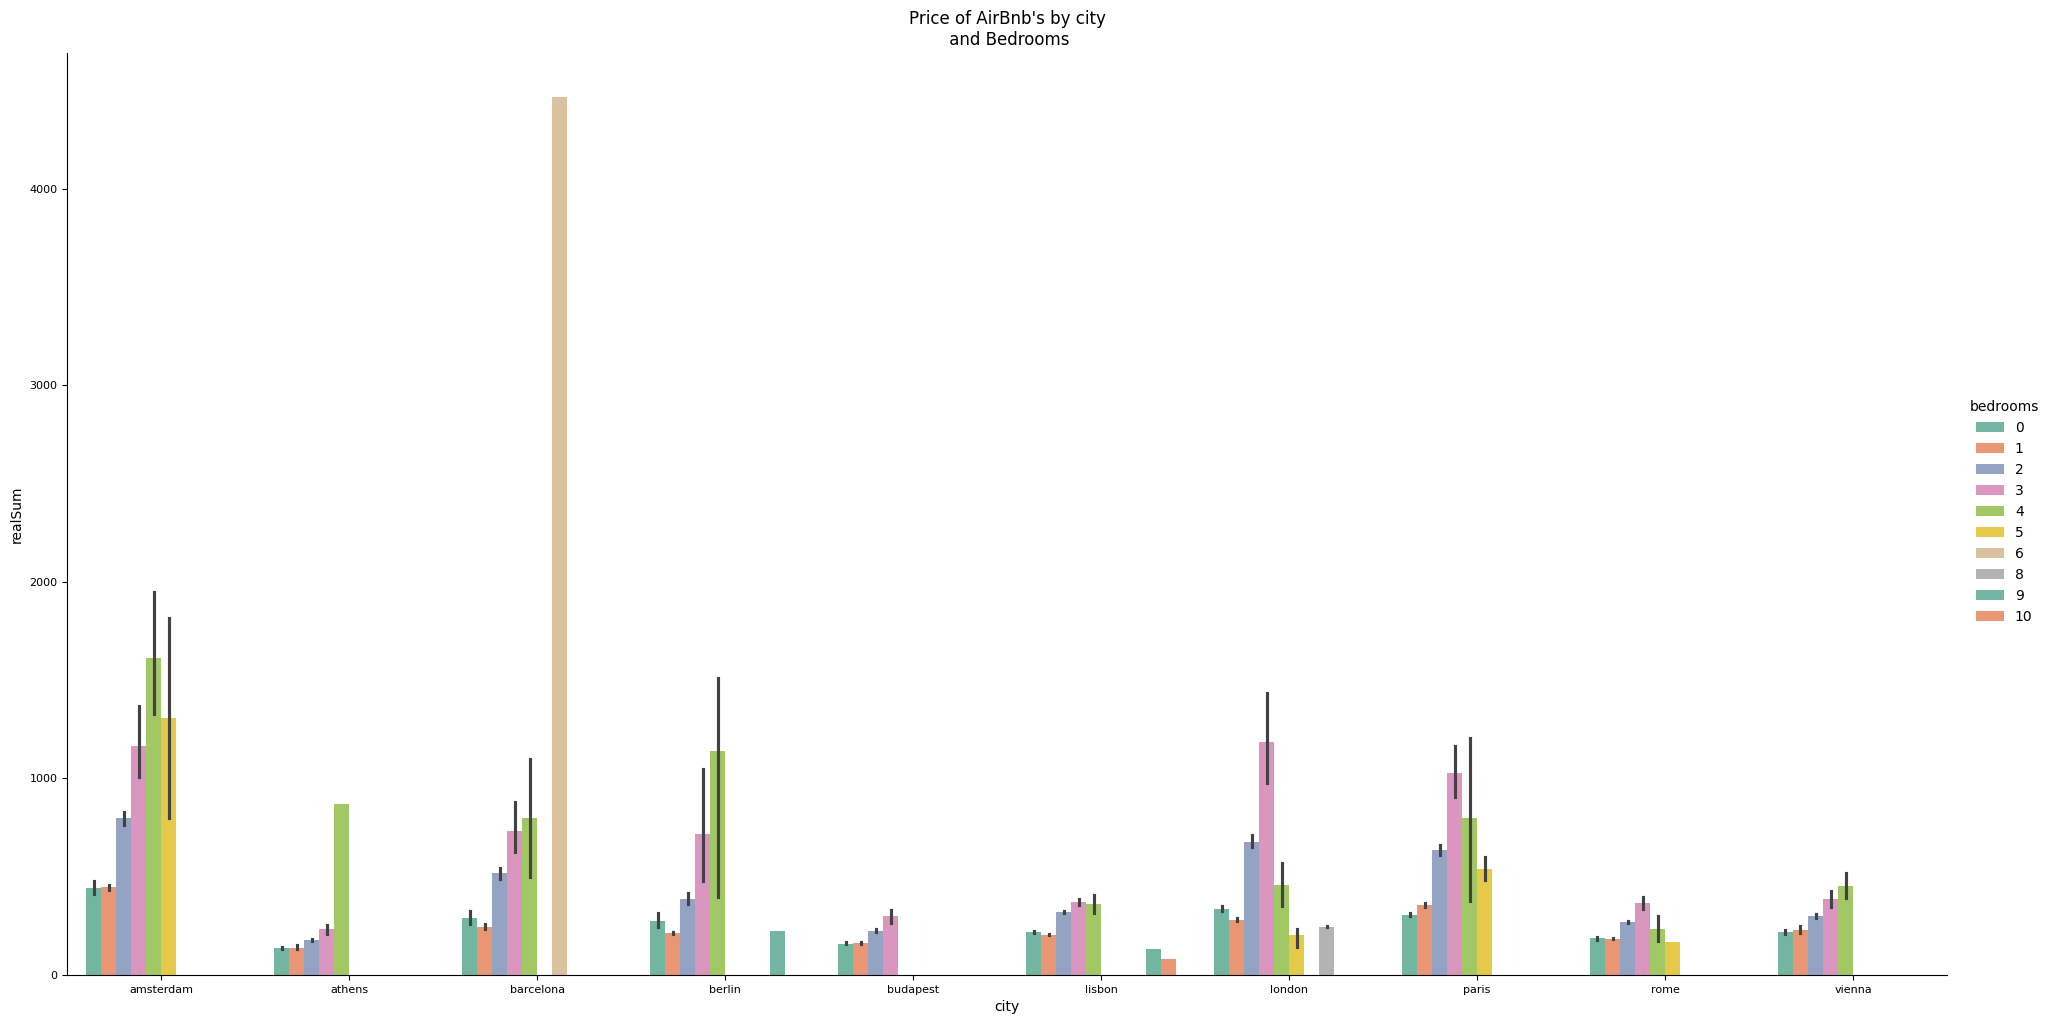

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='city', y='realSum', hue='bedrooms', data=europe,
            height=10, aspect=2, kind='bar', palette='Set2')

plt.title('Price of AirBnb\'s by city\n and Bedrooms')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

<ipython-input-43-db9fa8469a98>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='person_capacity', y='realSum', data=europe,


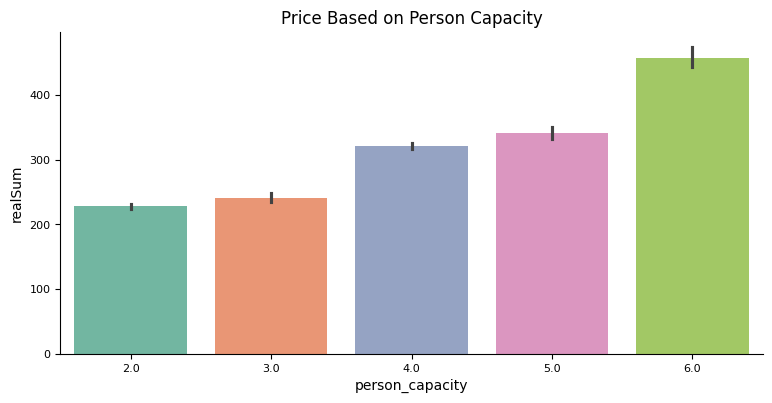

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='person_capacity', y='realSum', data=europe,
            height=4, aspect=2, kind='bar', palette='Set2')

plt.title('Price Based on Person Capacity')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

<ipython-input-44-372a7bb25d3a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='bedrooms', y='realSum', data=europe,


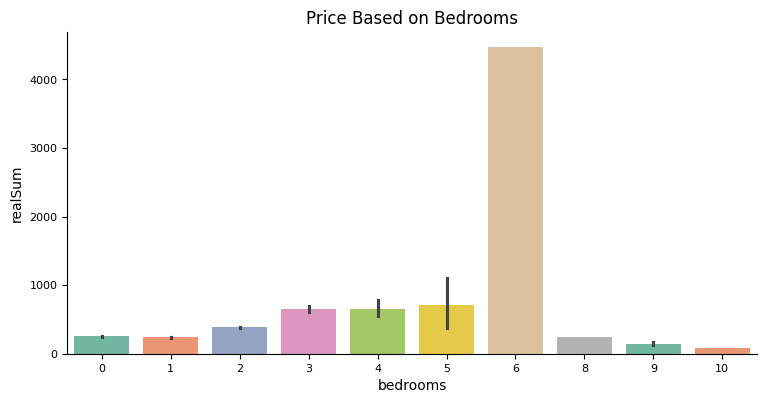

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='bedrooms', y='realSum', data=europe,
            height=4, aspect=2, kind='bar', palette='Set2')

plt.title('Price Based on Bedrooms')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

<ipython-input-45-504fe822e8c7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='room_type', y='realSum', data=europe,


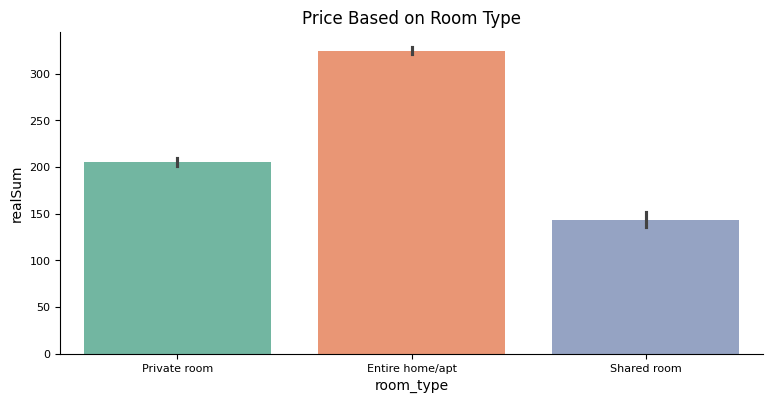

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='room_type', y='realSum', data=europe,
            height=4, aspect=2, kind='bar', palette='Set2')

plt.title('Price Based on Room Type')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

<ipython-input-46-353175bb7863>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='cleanliness_rating', y='realSum', data=europe,


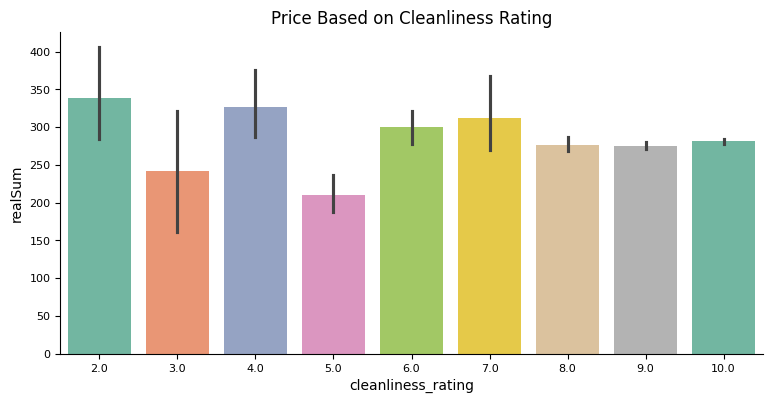

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='cleanliness_rating', y='realSum', data=europe,
            height=4, aspect=2, kind='bar', palette='Set2')

plt.title('Price Based on Cleanliness Rating')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

<ipython-input-47-bfe0c5edcc94>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='host_is_superhost', y='realSum', data=europe,


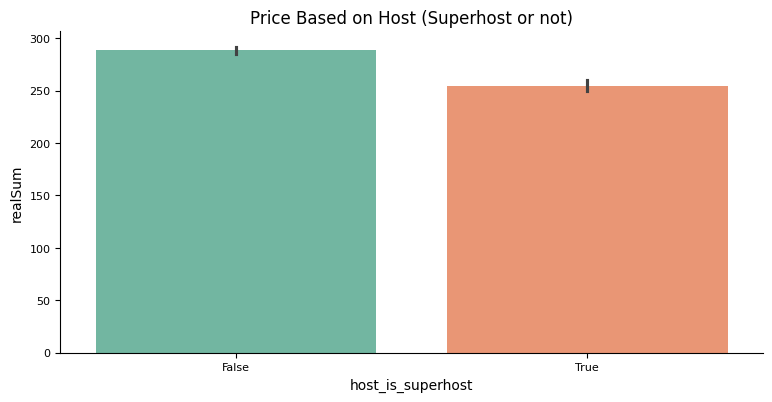

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='host_is_superhost', y='realSum', data=europe,
            height=4, aspect=2, kind='bar', palette='Set2')

plt.title('Price Based on Host (Superhost or not)')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

<ipython-input-48-7ea9e0575a73>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='biz', y='realSum', data=europe,


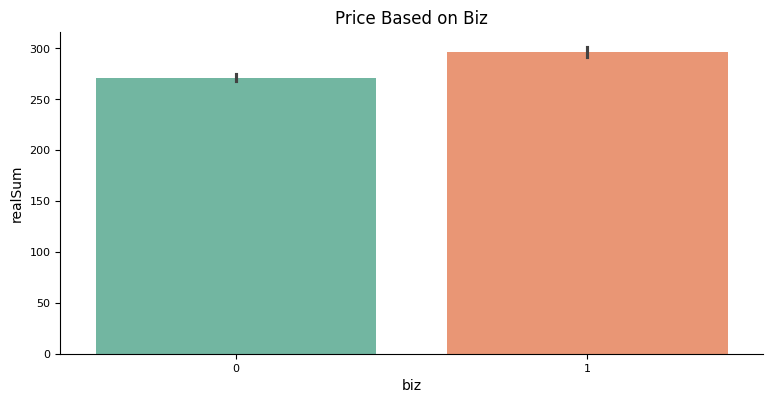

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='biz', y='realSum', data=europe,
            height=4, aspect=2, kind='bar', palette='Set2')

plt.title('Price Based on Biz')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

<ipython-input-49-e234cc8b16ee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='guest_satisfaction_overall', y='realSum', data=europe,


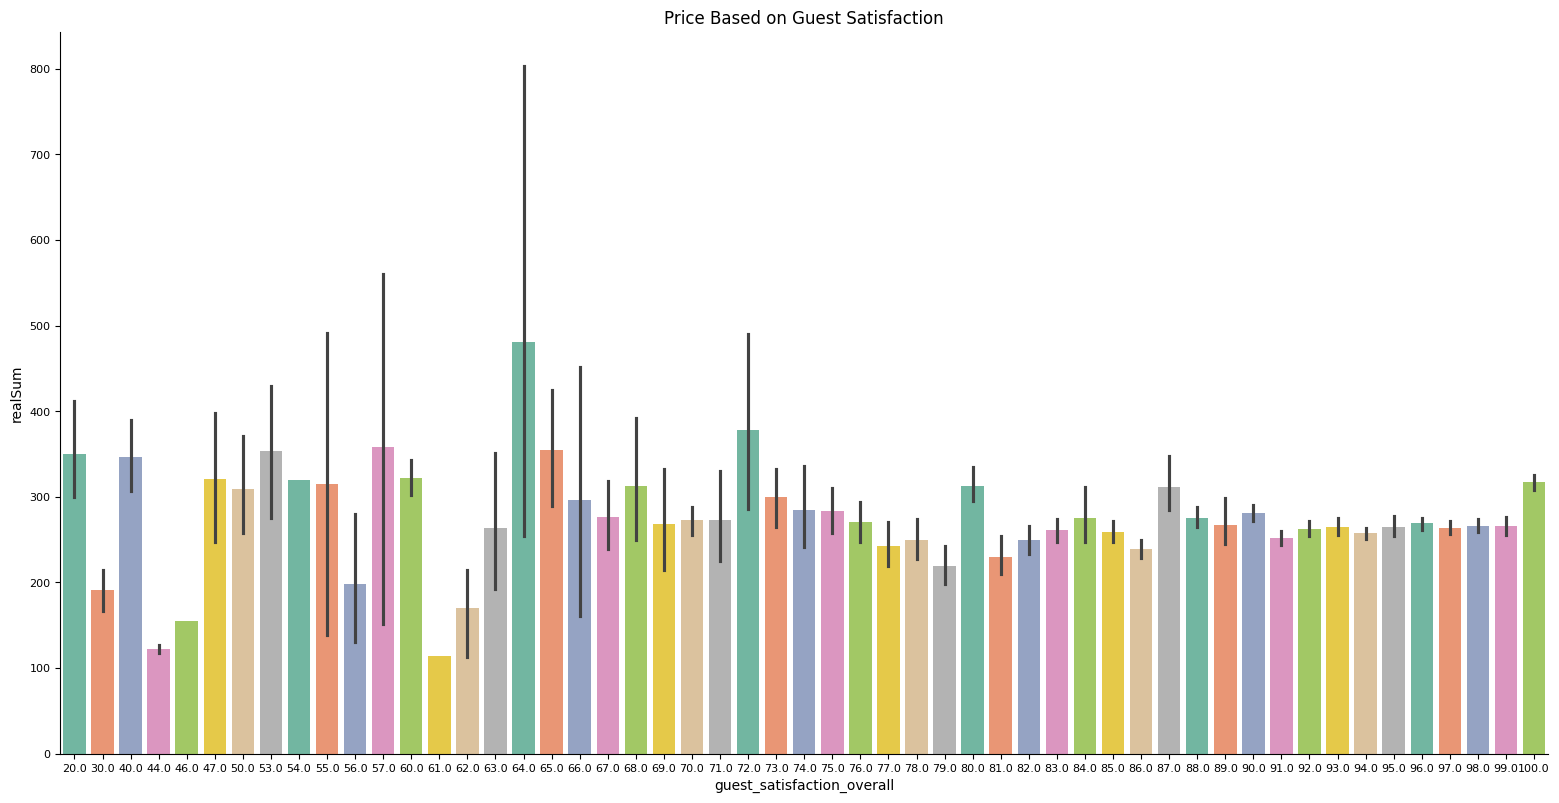

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='guest_satisfaction_overall', y='realSum', data=europe,
            height=8, aspect=2, kind='bar', palette='Set2')

plt.title('Price Based on Guest Satisfaction')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

<ipython-input-50-353175bb7863>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='cleanliness_rating', y='realSum', data=europe,


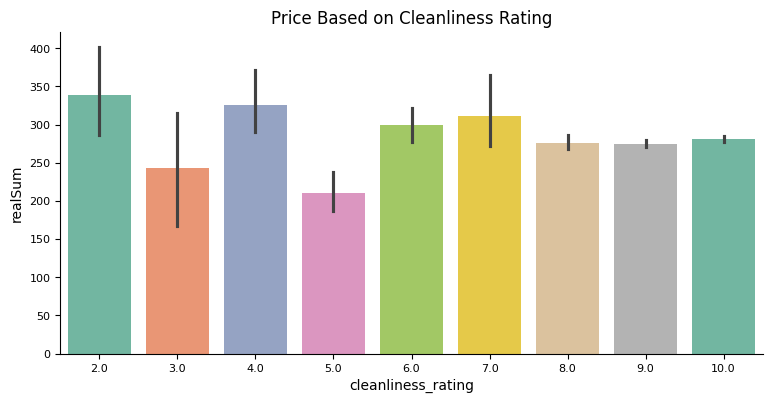

<Figure size 1200x600 with 0 Axes>

In [ ]:
sns.catplot(x='cleanliness_rating', y='realSum', data=europe,
            height=4, aspect=2, kind='bar', palette='Set2')

plt.title('Price Based on Cleanliness Rating')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.show()
plt.clf()

## **E. Data Pre Processing**

### **1. Data Type Conversion**

In [ ]:
europe_airbnb=europe.copy()

In [ ]:
europe_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  bool   
 3   room_private                51707 non-null  bool   
 4   person_capacity             51707 non-null  float64
 5   host_is_superhost           51707 non-null  bool   
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  float64
 9   guest_satisfaction_overall  51707 non-null  float64
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [ ]:
europe_airbnb['person_capacity'] = europe_airbnb['person_capacity'].astype(int)
europe_airbnb['cleanliness_rating'] = europe_airbnb['cleanliness_rating'].astype(int)
europe_airbnb['guest_satisfaction_overall'] = europe_airbnb['guest_satisfaction_overall'].astype(int)
europe_airbnb['room_shared'] = europe_airbnb['room_shared'].astype(str)
europe_airbnb['room_private'] = europe_airbnb['room_private'].astype(str)
europe_airbnb['host_is_superhost'] = europe_airbnb['host_is_superhost'].astype(str)

In [ ]:
europe_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   realSum                     51707 non-null  float64
 1   room_type                   51707 non-null  object 
 2   room_shared                 51707 non-null  object 
 3   room_private                51707 non-null  object 
 4   person_capacity             51707 non-null  int64  
 5   host_is_superhost           51707 non-null  object 
 6   multi                       51707 non-null  int64  
 7   biz                         51707 non-null  int64  
 8   cleanliness_rating          51707 non-null  int64  
 9   guest_satisfaction_overall  51707 non-null  int64  
 10  bedrooms                    51707 non-null  int64  
 11  dist                        51707 non-null  float64
 12  metro_dist                  51707 non-null  float64
 13  attr_index                  517

In [ ]:
europe_airbnb.sample(10)

realSum        room_type room_shared room_private  person_capacity  \
50677  157.539209  Entire home/apt       False        False                2   
12009  174.114238     Private room       False         True                2   
4481    85.768519  Entire home/apt       False        False                4   
43828  146.587801     Private room       False         True                2   
29841  119.005621     Private room       False         True                2   
5786   269.959928  Entire home/apt       False        False                5   
45373  259.275711  Entire home/apt       False        False                4   
32088  179.919565     Private room       False         True                2   
2721    90.455323  Entire home/apt       False        False                6   
22026  125.938086     Private room       False         True                2   

      host_is_superhost  multi  biz  cleanliness_rating  \
50677             False      1    0                  10   
12009             False      1    0                   9   
4481              False      0    0                  10   
43828              True      1    0                  10   
29841             False      0    0                  10   
5786              False      0    1                  10   
45373              True      1    0                  10   
32088              True      0    0                  10   
2721               True      1    0                   9   
22026             False      0    1                   9   

       guest_satisfaction_overall  ...      dist  metro_dist  attr_index  \
50677                          94  ...  3.518007    0.535771   94.199621   
12009                          87  ...  4.360672    0.379899  125.552279   
4481                          100  ...  1.835999    0.484956  121.033973   
43828                          90  ...  4.780894    2.020486  187.708868   
29841                         100  ...  6.671557    3.325823  178.004110   
5786                           97  ...  1.341748    0.320248  239.590456   
45373                          98  ...  1.906862    0.124409  341.122144   
32088                          99  ...  6.147364    1.432236  195.032460   
2721                           94  ...  3.003696    0.419892   53.402029   
22026                          85  ...  1.164835    0.303776  200.893151   

       attr_index_norm  rest_index  rest_index_norm       lng       lat  \
50677         6.745955  121.279997         2.931291  16.34423  48.18374   
12009        19.136753  160.441434        33.944531  13.38593  52.48897   
4481          4.563484  207.016433        15.544054  23.71577  37.98124   
43828         4.158773  475.123427        10.351787  12.50463  41.85787   
29841        12.373760  347.807488         6.225148  -0.05553  51.46863   
5786          9.027227  326.220157         4.871752  23.72029  37.97379   
45373         7.557712  830.023530        18.084199  12.51100  41.88500   
32088        13.557467  430.872967         7.711875  -0.05505  51.54009   
2721          2.013478   79.597398         5.976657  23.76485  37.98928   
22026         6.626113  483.431497        27.170129  -9.13200  38.72100   

       week_time    city  
50677   weekends  vienna  
12009   weekends  berlin  
4481    weekdays  athens  
43828   weekends    rome  
29841   weekends  london  
5786    weekends  athens  
45373   weekends    rome  
32088   weekends  london  
2721    weekdays  athens  
22026   weekends  lisbon  

[10 rows x 21 columns]

In [ ]:
europe_airbnb = europe_airbnb.rename(columns = {'realSum' : 'price'})

### **2. Handle Missing Value**

In [ ]:
europe_airbnb.isna().sum()

price                         0
room_type                     0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multi                         0
biz                           0
cleanliness_rating            0
guest_satisfaction_overall    0
bedrooms                      0
dist                          0
metro_dist                    0
attr_index                    0
attr_index_norm               0
rest_index                    0
rest_index_norm               0
lng                           0
lat                           0
week_time                     0
city                          0
dtype: int64

Tidak ada missing value, sehingga tidak perlu dilakukan pengolahan terhadap missing value

### **3. Handling Duplicate Value**

In [ ]:
duplicated = europe_airbnb[europe_airbnb.duplicated(keep=False)]
print(duplicated)

Empty DataFrame
Columns: [price, room_type, room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat, week_time, city]
Index: []

[0 rows x 21 columns]


Tidak ada duplicate value, sehingga tidak perlu dilakukan pengolahan terhadap duplicate value

### **4. Feature Encoding**

In [ ]:
# Label Encoding
# Label Encoding pada room_shared, room_private, host_is_superhost
mapping_bool = {
    'True' : 1,
    'False' : 0,
}
europe_airbnb['room_shared'] = europe_airbnb['room_shared'].map(mapping_bool)
europe_airbnb['room_private'] = europe_airbnb['room_private'].map(mapping_bool)
europe_airbnb['host_is_superhost'] = europe_airbnb['host_is_superhost'].map(mapping_bool)
# Label Encoding pada weektime
mapping_week = {
    'weekends' : 1,
    'weekdays' : 0,
}
europe_airbnb['week_time'] = europe_airbnb['week_time'].map(mapping_week)

In [ ]:
# One Hot Encoding pada Feature City dan room_type
city_ohe = pd.get_dummies(europe_airbnb['city'], prefix='kota').astype(int)
type_ohe = pd.get_dummies(europe_airbnb['room_type']).astype(int)

In [ ]:
europe_airbnb = pd.concat([europe_airbnb, city_ohe, type_ohe], axis=1)

In [ ]:
europe_airbnb = europe_airbnb.drop('room_type', axis=1)

In [ ]:
europe_airbnb.head()

price  room_shared  room_private  person_capacity  host_is_superhost  \
0  194.033698            0             1                2                  0   
1  344.245776            0             1                4                  0   
2  264.101422            0             1                2                  0   
3  433.529398            0             1                4                  0   
4  485.552926            0             1                2                  1   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  ...  \
0      1    0                  10                          93         1  ...   
1      0    0                   8                          85         1  ...   
2      0    1                   9                          87         1  ...   
3      0    1                   9                          90         2  ...   
4      0    0                  10                          98         1  ...   

   kota_berlin  kota_budapest  kota_lisbon  kota_london  kota_paris  \
0            0              0            0            0           0   
1            0              0            0            0           0   
2            0              0            0            0           0   
3            0              0            0            0           0   
4            0              0            0            0           0   

   kota_rome  kota_vienna  Entire home/apt  Private room Shared room  
0          0            0                0             1           0  
1          0            0                0             1           0  
2          0            0                0             1           0  
3          0            0                0             1           0  
4          0            0                0             1           0  

[5 rows x 33 columns]

### **5. Feature Extraction**

In [ ]:
#1. indikator aksesibilitas airbnb menuju pusat kota
def categorize_distance(dist):
    if dist < 5:
        return 'Central'
    elif dist <= 15:
        return 'Suburban'
    else:
        return 'Remote'

europe_airbnb['accessibility'] = europe_airbnb['dist'].apply(categorize_distance)

#2. kategori popularitas airbnb (high, medium, low) berdasarkan kepuasan pelanggan
def satisfaction_category(score):
    if score > 9:
        return 'High'
    elif score >= 7:
        return 'Medium'
    else:
        return 'Low'

europe_airbnb['satisfaction_level'] = europe_airbnb['guest_satisfaction_overall'].apply(satisfaction_category)
print(europe_airbnb.head())

#3. Walkability Score
# Bobot untuk setiap faktor (sesuaikan sesuai kebutuhan)
w_dist = 0.25
w_metro = 0.25
w_attr = 0.25
w_rest = 0.25

# Hindari pembagian dengan nol (tambahkan epsilon kecil)
epsilon = 1e-6

# Hitung walkability score
europe_airbnb['walkability_score'] = (
    w_dist * (1 / (europe_airbnb['dist'] + epsilon)) +
    w_metro * (1 / (europe_airbnb['metro_dist'] + epsilon)) +
    w_attr * europe_airbnb['attr_index_norm'] +
    w_rest * europe_airbnb['rest_index_norm']
)

# Normalisasi walkability score ke rentang 0-100
europe_airbnb['walkability_score'] = (europe_airbnb['walkability_score'] - europe_airbnb['walkability_score'].min()) / \
                          (europe_airbnb['walkability_score'].max() - europe_airbnb['walkability_score'].min()) * 100

# Simpan dataset baru
europe_airbnb.to_csv("dataset_with_walkability_score.csv", index=False)

        price  room_shared  room_private  person_capacity  host_is_superhost  \
0  194.033698            0             1                2                  0   
1  344.245776            0             1                4                  0   
2  264.101422            0             1                2                  0   
3  433.529398            0             1                4                  0   
4  485.552926            0             1                2                  1   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  ...  \
0      1    0                  10                          93         1  ...   
1      0    0                   8                          85         1  ...   
2      0    1                   9                          87         1  ...   
3      0    1                   9                          90         2  ...   
4      0    0                  10                          98         1  ...   

   kota_lisbon  kota_london  kota_pari

In [ ]:
europe_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       51707 non-null  float64
 1   room_shared                 51707 non-null  int64  
 2   room_private                51707 non-null  int64  
 3   person_capacity             51707 non-null  int64  
 4   host_is_superhost           51707 non-null  int64  
 5   multi                       51707 non-null  int64  
 6   biz                         51707 non-null  int64  
 7   cleanliness_rating          51707 non-null  int64  
 8   guest_satisfaction_overall  51707 non-null  int64  
 9   bedrooms                    51707 non-null  int64  
 10  dist                        51707 non-null  float64
 11  metro_dist                  51707 non-null  float64
 12  attr_index                  51707 non-null  float64
 13  attr_index_norm             517

In [ ]:
europe_airbnb['accessibility'] = europe_airbnb['accessibility'].astype(str)
europe_airbnb['satisfaction_level'] = europe_airbnb['satisfaction_level'].astype(str)

In [ ]:
# Label Encoding pada accesbility
mapping_week = {
    'Central': 3,
    'Suburban': 2,
    'Remote': 1
}
europe_airbnb['accessibility'] = europe_airbnb['accessibility'].map(mapping_week)
# Label Encoding pada satisfaction_level
mapping_week = {
    'High': 3,
    'Medium': 2,
    'Low': 1
}
europe_airbnb['satisfaction_level'] = europe_airbnb['satisfaction_level'].map(mapping_week)

print(europe_airbnb.head())

        price  room_shared  room_private  person_capacity  host_is_superhost  \
0  194.033698            0             1                2                  0   
1  344.245776            0             1                4                  0   
2  264.101422            0             1                2                  0   
3  433.529398            0             1                4                  0   
4  485.552926            0             1                2                  1   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  ...  \
0      1    0                  10                          93         1  ...   
1      0    0                   8                          85         1  ...   
2      0    1                   9                          87         1  ...   
3      0    1                   9                          90         2  ...   
4      0    0                  10                          98         1  ...   

   kota_london  kota_paris  kota_rome 

In [ ]:
europe_airbnb['accessibility'] = europe_airbnb['accessibility'].astype(int)
europe_airbnb['satisfaction_level'] = europe_airbnb['satisfaction_level'].astype(int)

Kami memilih untuk membuat kolom tambahan di bawah ini dengan alasan sebagai berikut:
1. price_per_person: kolom baru guna menunjukkan berapa rata-rata harga per orang berdasarkan kapasitas orang (person_capacity)

2. accessibility : kolom baru yang digunakan untuk mengkategorikan lokasi airbnb menggunakan kolom dist dan metro_dist dengan klasifikasi:
"Central": Properti dekat pusat kota (jarak < 5 km).
"Suburban": Properti agak jauh dari pusat (5-15 km).
"Remote": Properti sangat jauh (> 15 km)

3. satisfaction_level : kolom baru yang digunakan untuk mengkategorikan properti berdasarkan tingkat kepuasan tamu, adapun indikator yang digunakan sebagai berikut: High: Skor > 9.
Medium: Skor 7-9.
Low: Skor < 7.

### **6. Handling Outliers**

In [ ]:
num = ['price','person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm','satisfaction_level','accessibility', 'bedrooms','lat','lng','multi','biz','walkability_score']
feature = num

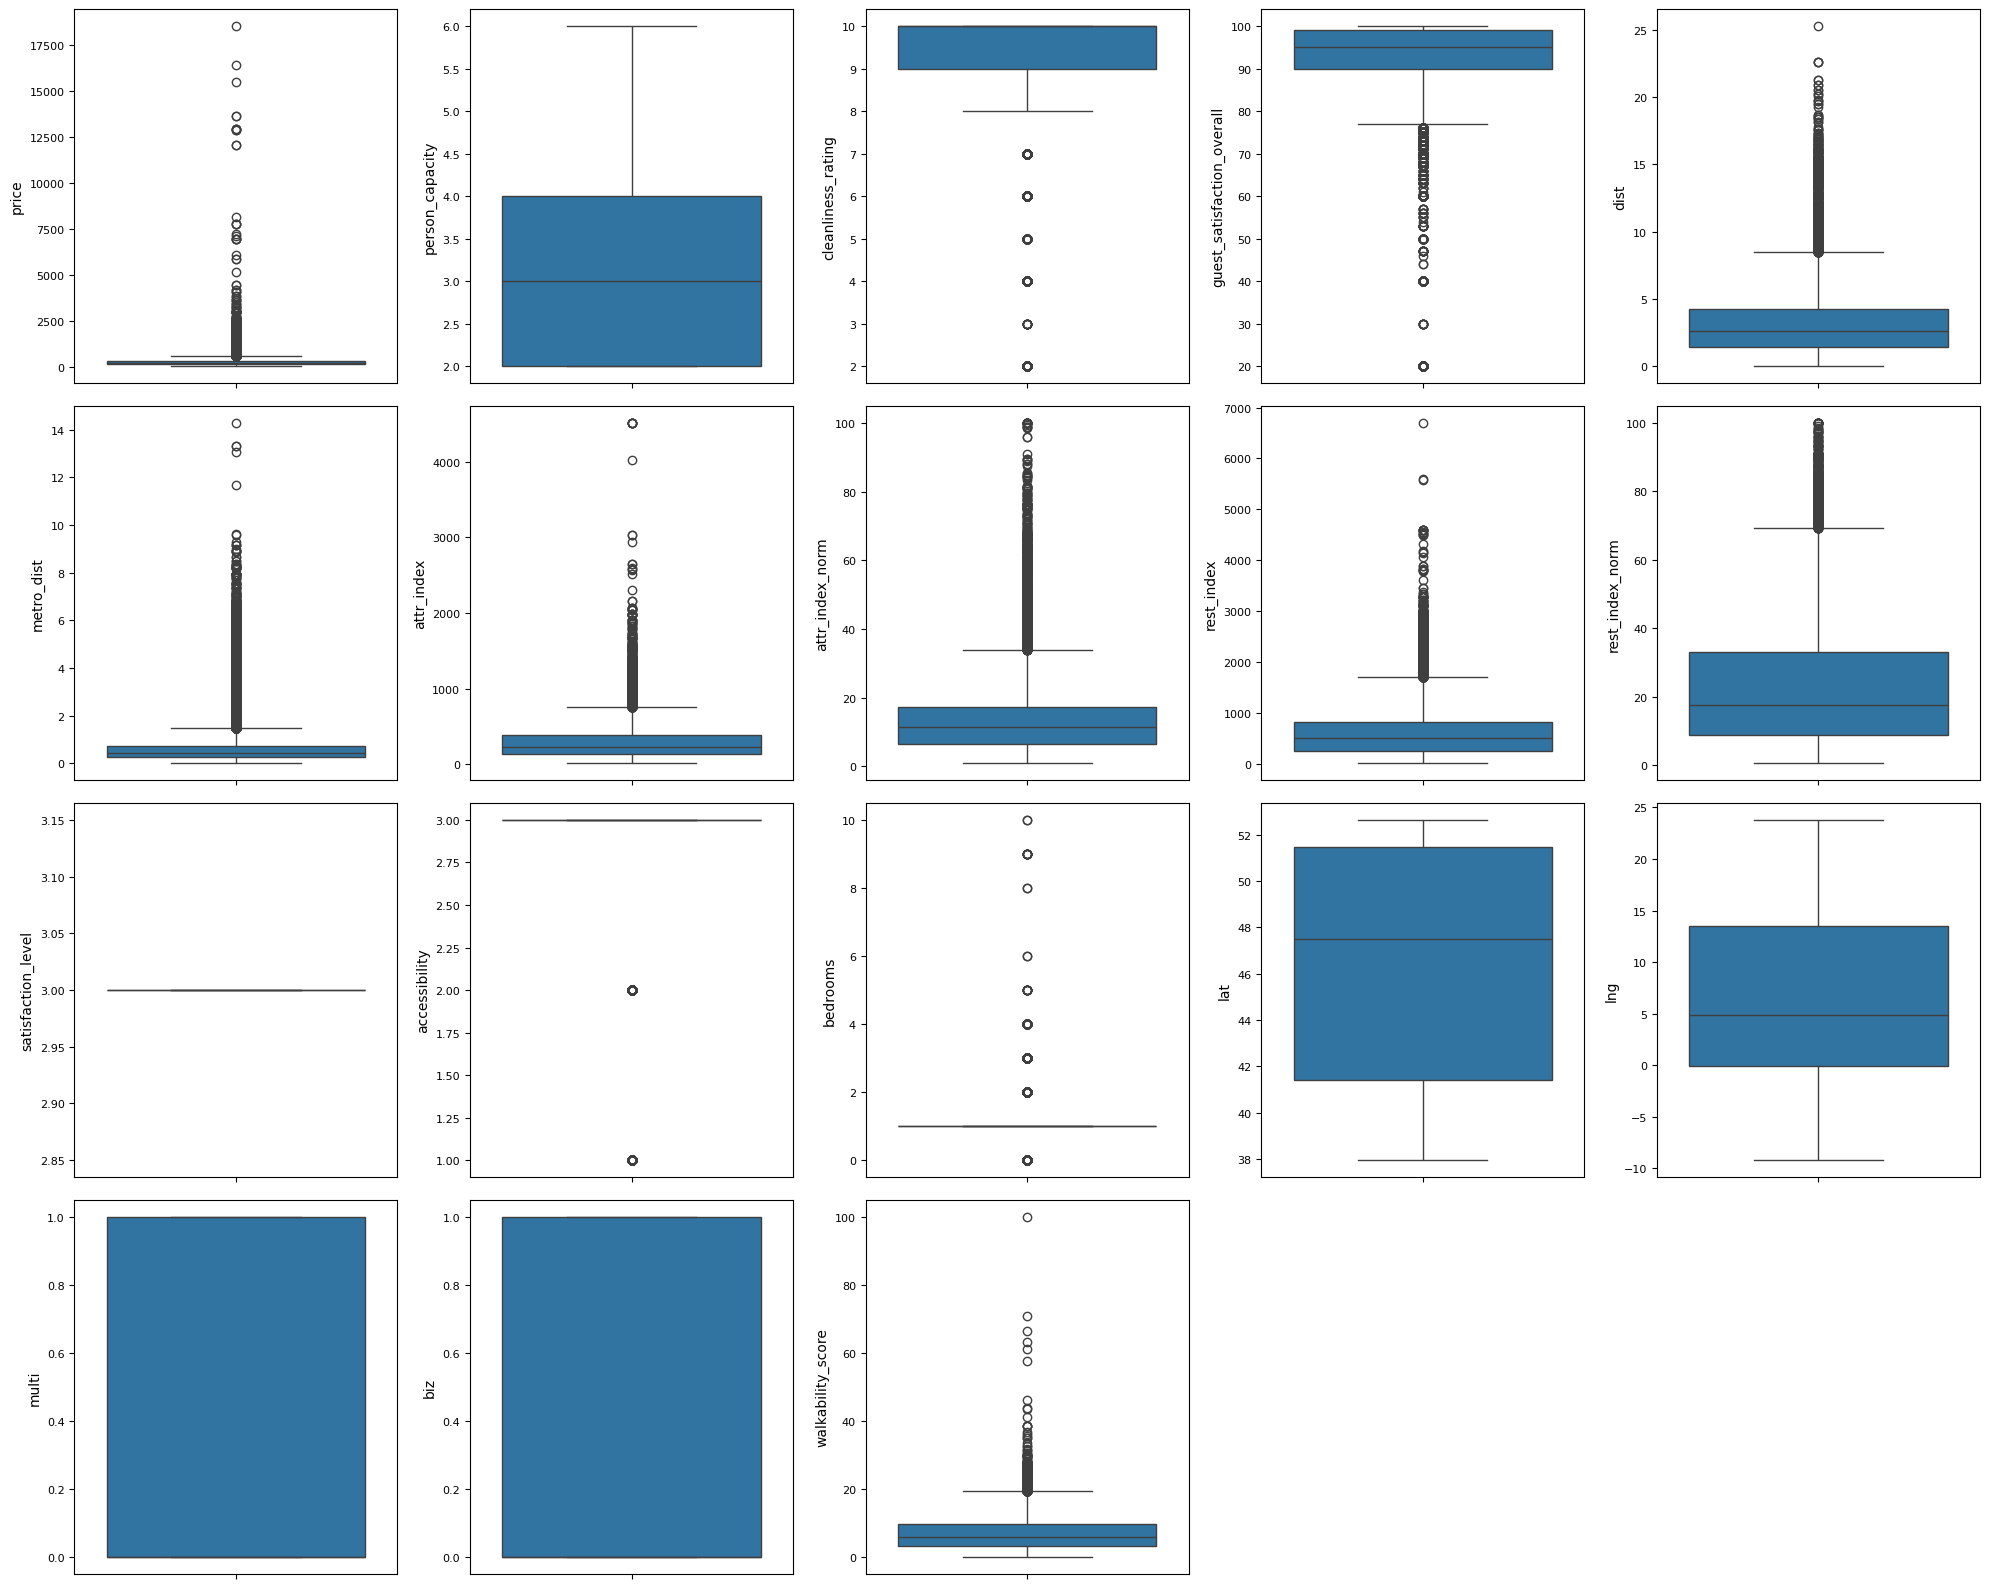

In [ ]:
# Menentukan jumlah fitur
num_features = len(feature)

# Menentukan jumlah kolom dan baris berdasarkan jumlah fitur
cols = 5  # Tetapkan jumlah kolom tetap 5
rows = (num_features // cols) + (num_features % cols > 0)  # Menyesuaikan jumlah baris

# Menyesuaikan ukuran figure
rcParams['figure.figsize'] = 8, 12
plt.figure(figsize=(cols * 4, rows * 4))

# Membuat boxplot untuk setiap fitur
for i in range(num_features):
    plt.subplot(rows, cols, i + 1)  # Menyesuaikan grid
    sns.boxplot(y=europe_airbnb[feature[i]])  # Menampilkan boxplot
    plt.ylabel(feature[i])
    plt.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()  # Mengatur layout agar tidak ada subplot yang saling bertumpukan
plt.savefig('box.png')  # Menyimpan gambar ke file

<ipython-input-71-7a9146caa875>:15: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=europe_airbnb[feature[i]])  # Menampilkan KDE plot


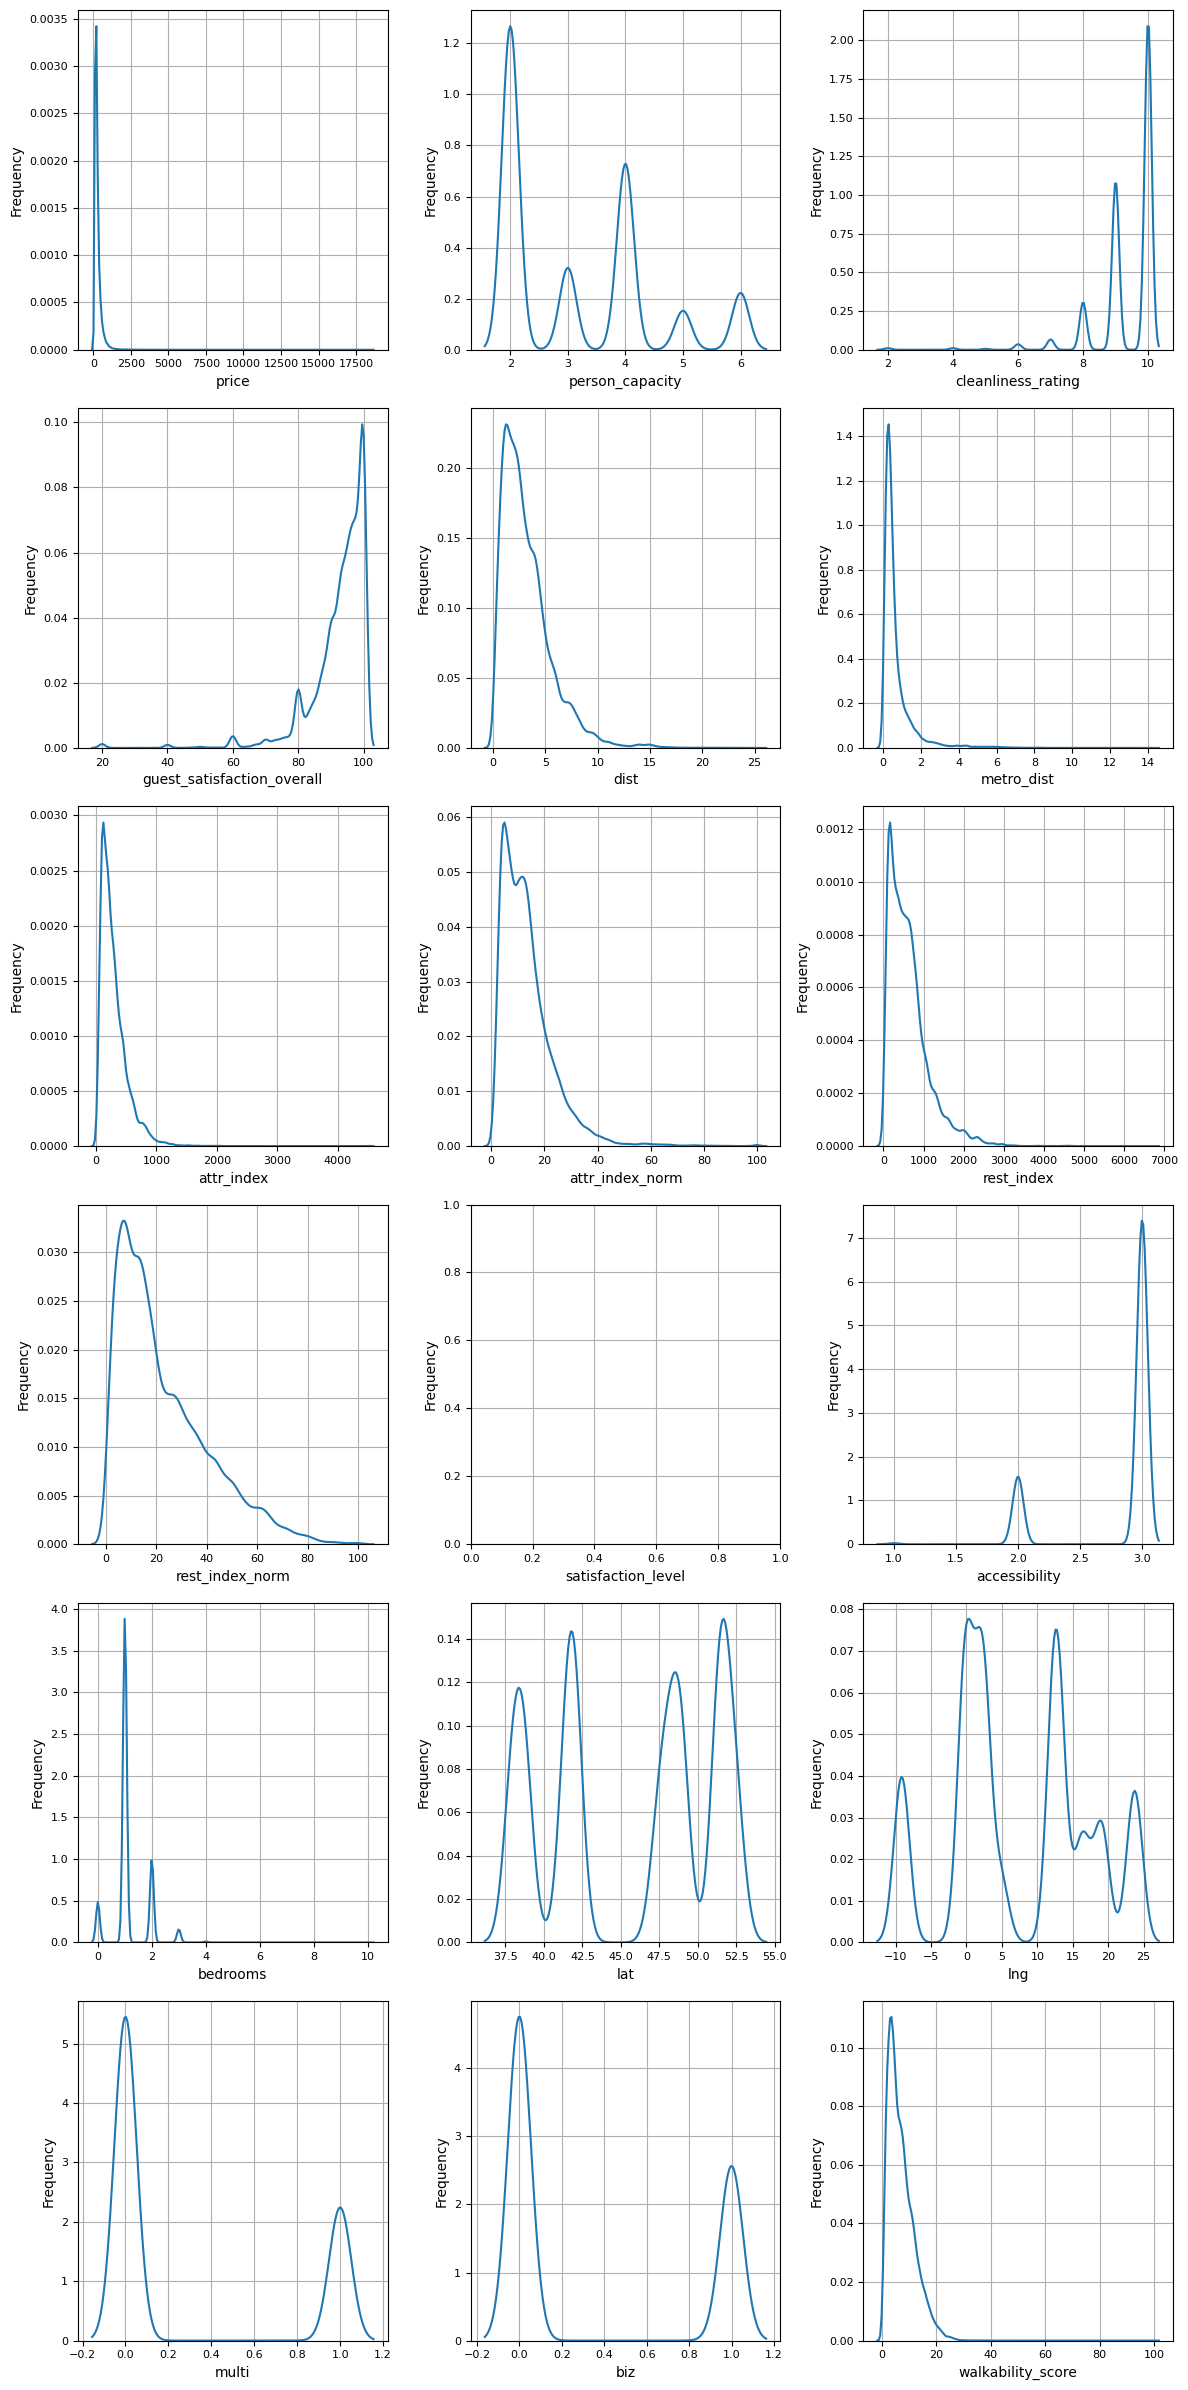

In [ ]:
# Menentukan jumlah fitur
num_features = len(feature)

# Menentukan jumlah kolom dan baris berdasarkan jumlah fitur
cols = 3  # Tetapkan jumlah kolom tetap 3
rows = (num_features // cols) + (num_features % cols > 0)  # Menyesuaikan jumlah baris

# Menyesuaikan ukuran figure
rcParams['figure.figsize'] = 12, 12
plt.figure(figsize=(cols * 4, rows * 4))

# Membuat KDE plot untuk setiap fitur
for i in range(num_features):
    plt.subplot(rows, cols, i + 1)  # Menyesuaikan grid
    sns.kdeplot(x=europe_airbnb[feature[i]])  # Menampilkan KDE plot
    plt.xlabel(feature[i])
    plt.ylabel('Frequency')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.grid()

# Menyusun layout secara rapi
plt.tight_layout()

# Menyimpan gambar ke file
plt.savefig('univariate.png')

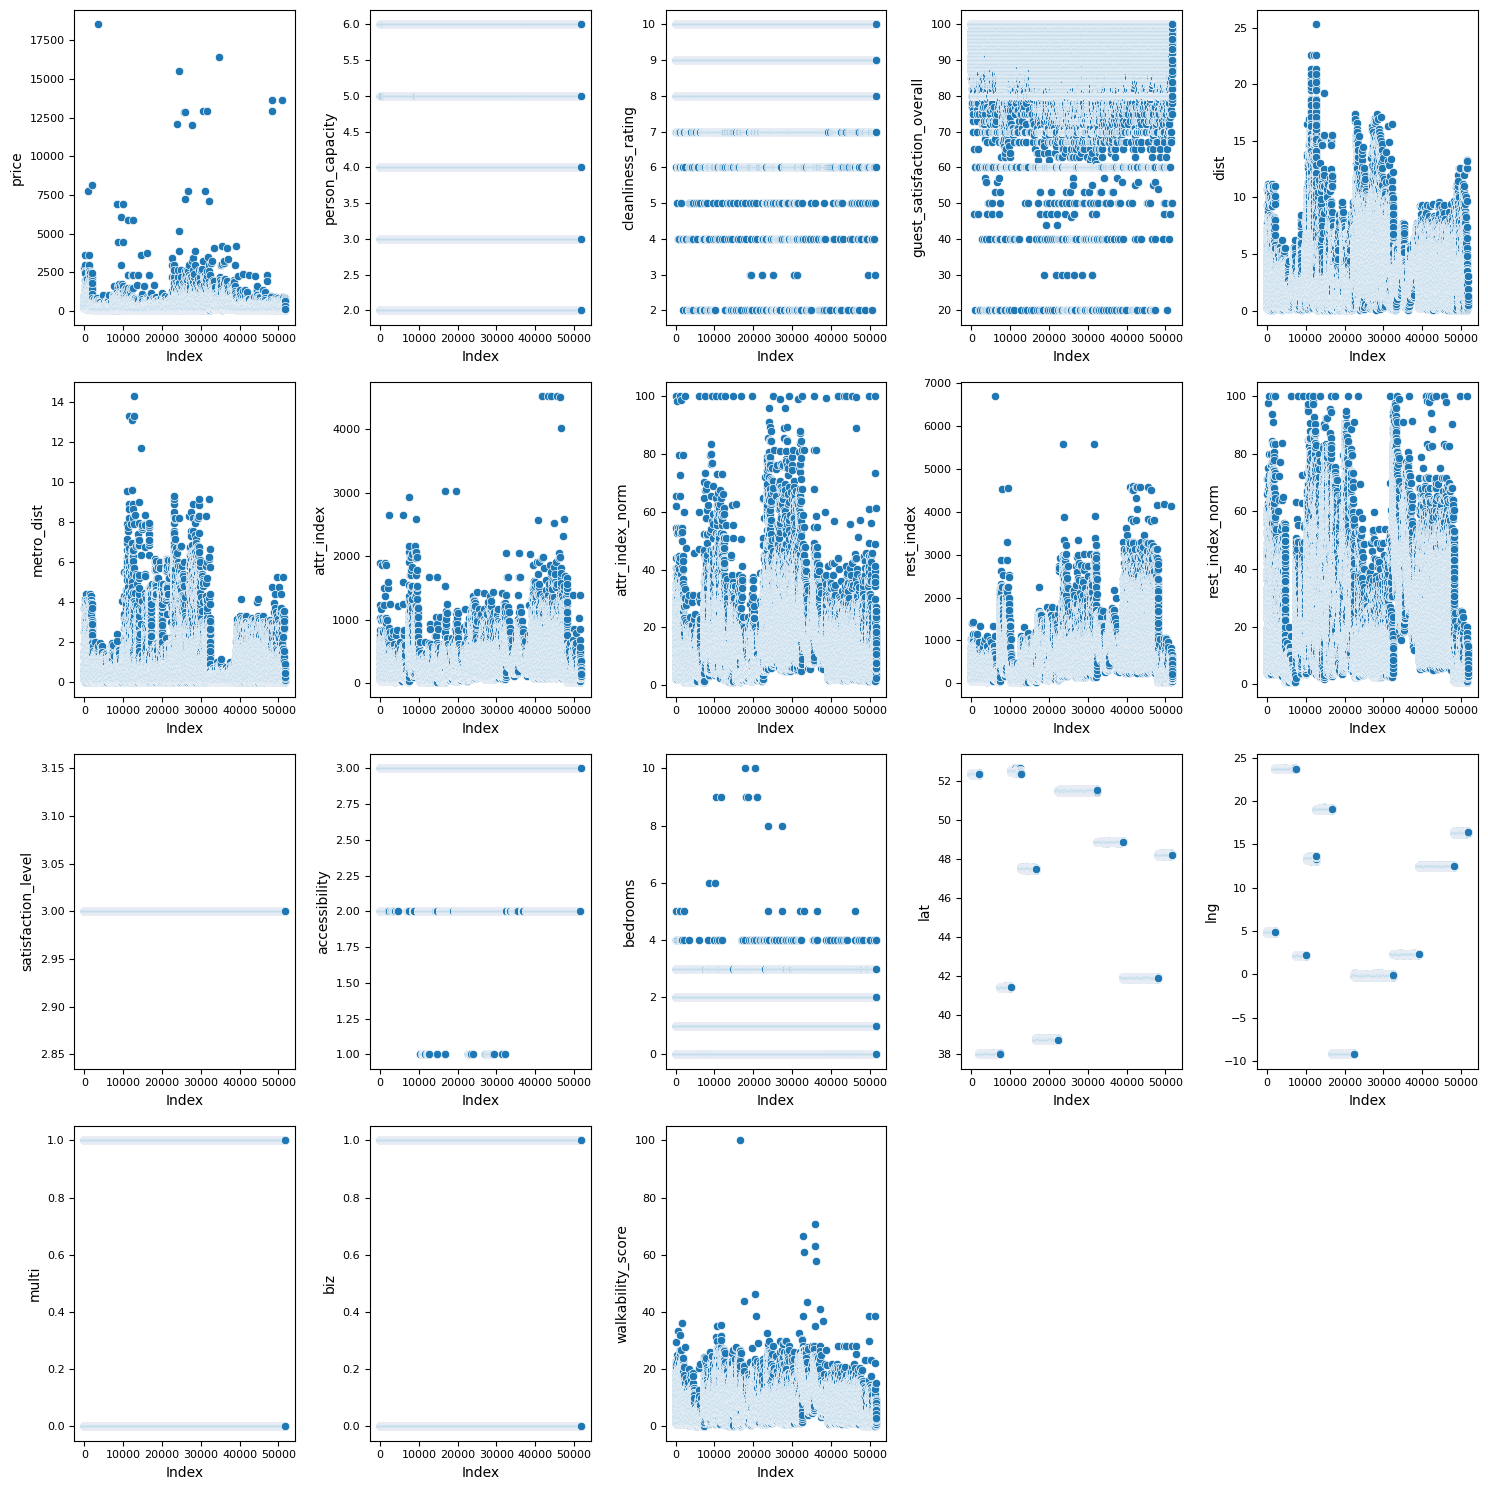

In [ ]:
feature = num

# Set ukuran figure
rcParams['figure.figsize'] = 15, 15

# Membuat scatter plot untuk setiap fitur
for i in range(0, len(feature)):
    plt.subplot(4, 5, i+1)  # Menggunakan 4 baris, 5 kolom untuk menampung 18 fitur
    sns.scatterplot(x=range(len(europe_airbnb)), y=europe_airbnb[feature[i]])
    plt.xlabel('Index')
    plt.ylabel(feature[i])
    plt.tick_params(axis='both', which='major', labelsize=8)

# Tata letak dan simpan
plt.tight_layout()
plt.savefig('scatter.png')

In [ ]:
for column in europe_airbnb.columns:
    print(f"Kolom: {column}")
    print(europe_airbnb[column].unique())
    print("-" * 50)

Kolom: price
[194.03369812 344.24577602 264.10142245 ... 715.93857373 637.16896898
 301.05415702]
--------------------------------------------------
Kolom: room_shared
[0 1]
--------------------------------------------------
Kolom: room_private
[1 0]
--------------------------------------------------
Kolom: person_capacity
[2 4 3 6 5]
--------------------------------------------------
Kolom: host_is_superhost
[0 1]
--------------------------------------------------
Kolom: multi
[1 0]
--------------------------------------------------
Kolom: biz
[0 1]
--------------------------------------------------
Kolom: cleanliness_rating
[10  8  9  6  7  5  4  2  3]
--------------------------------------------------
Kolom: guest_satisfaction_overall
[ 93  85  87  90  98 100  94  96  88  97  95  89  91  84  77  99  80  92
  82  78  86  74  81  83  73  76  75  70  65  47  60  20  40  72  79  68
  57  56  67  50  53  63  71  66  64  69  62  30  44  46  55  61  54]
------------------------------------

In [ ]:
europe_airbnb.drop(columns=['satisfaction_level'], inplace=True)

In [ ]:
europe_airbnb.drop(columns=['city'], inplace=True)

Kolom satisfaction dihapus karena kolom tersebut hanya memiliki 1 unique value sehingga tidak bisa digunakan untuk analisis selanjutnya.
Kolom city dihapus karena sudah dilakukan one hot encoding sehingga tidak menimbulkan adanya data yang redundant.

#### **Winsorization**

{'whiskers': [<matplotlib.lines.Line2D at 0x78ee2e15eef0>,
 'caps': [<matplotlib.lines.Line2D at 0x78ee2e15ead0>,
 'boxes': [<matplotlib.lines.Line2D at 0x78ee2e15e410>],
 'medians': [<matplotlib.lines.Line2D at 0x78ee356c98a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78ee356c87c0>],
 'means': []}

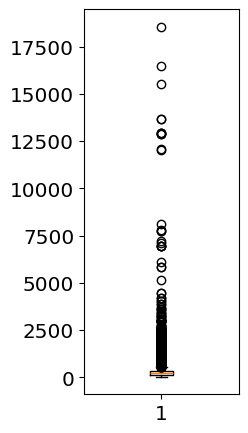

In [ ]:
rcParams['figure.figsize'] = 2, 5
plt.boxplot(europe_airbnb['price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x78ee2ae0f670>,
 'caps': [<matplotlib.lines.Line2D at 0x78ee2bb57970>,
 'boxes': [<matplotlib.lines.Line2D at 0x78ee2ae0ca30>],
 'medians': [<matplotlib.lines.Line2D at 0x78ee34c140a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x78ee2e090760>],
 'means': []}

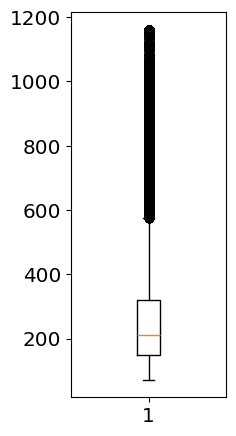

In [ ]:
from scipy.stats.mstats import winsorize
europe_airbnb['price'] = winsorize(europe_airbnb['price'], limits=[0.01, 0.01])
plt.boxplot(europe_airbnb['price'])

In [ ]:
from scipy.stats.mstats import winsorize

columns_to_winsorize = ['cleanliness_rating', 'guest_satisfaction_overall',
                        'dist', 'metro_dist', 'attr_index', 'attr_index_norm',
                        'rest_index', 'rest_index_norm', 'walkability_score']

for col in columns_to_winsorize:
    europe_airbnb[col] = winsorize(europe_airbnb[col], limits=[0.01, 0.01])

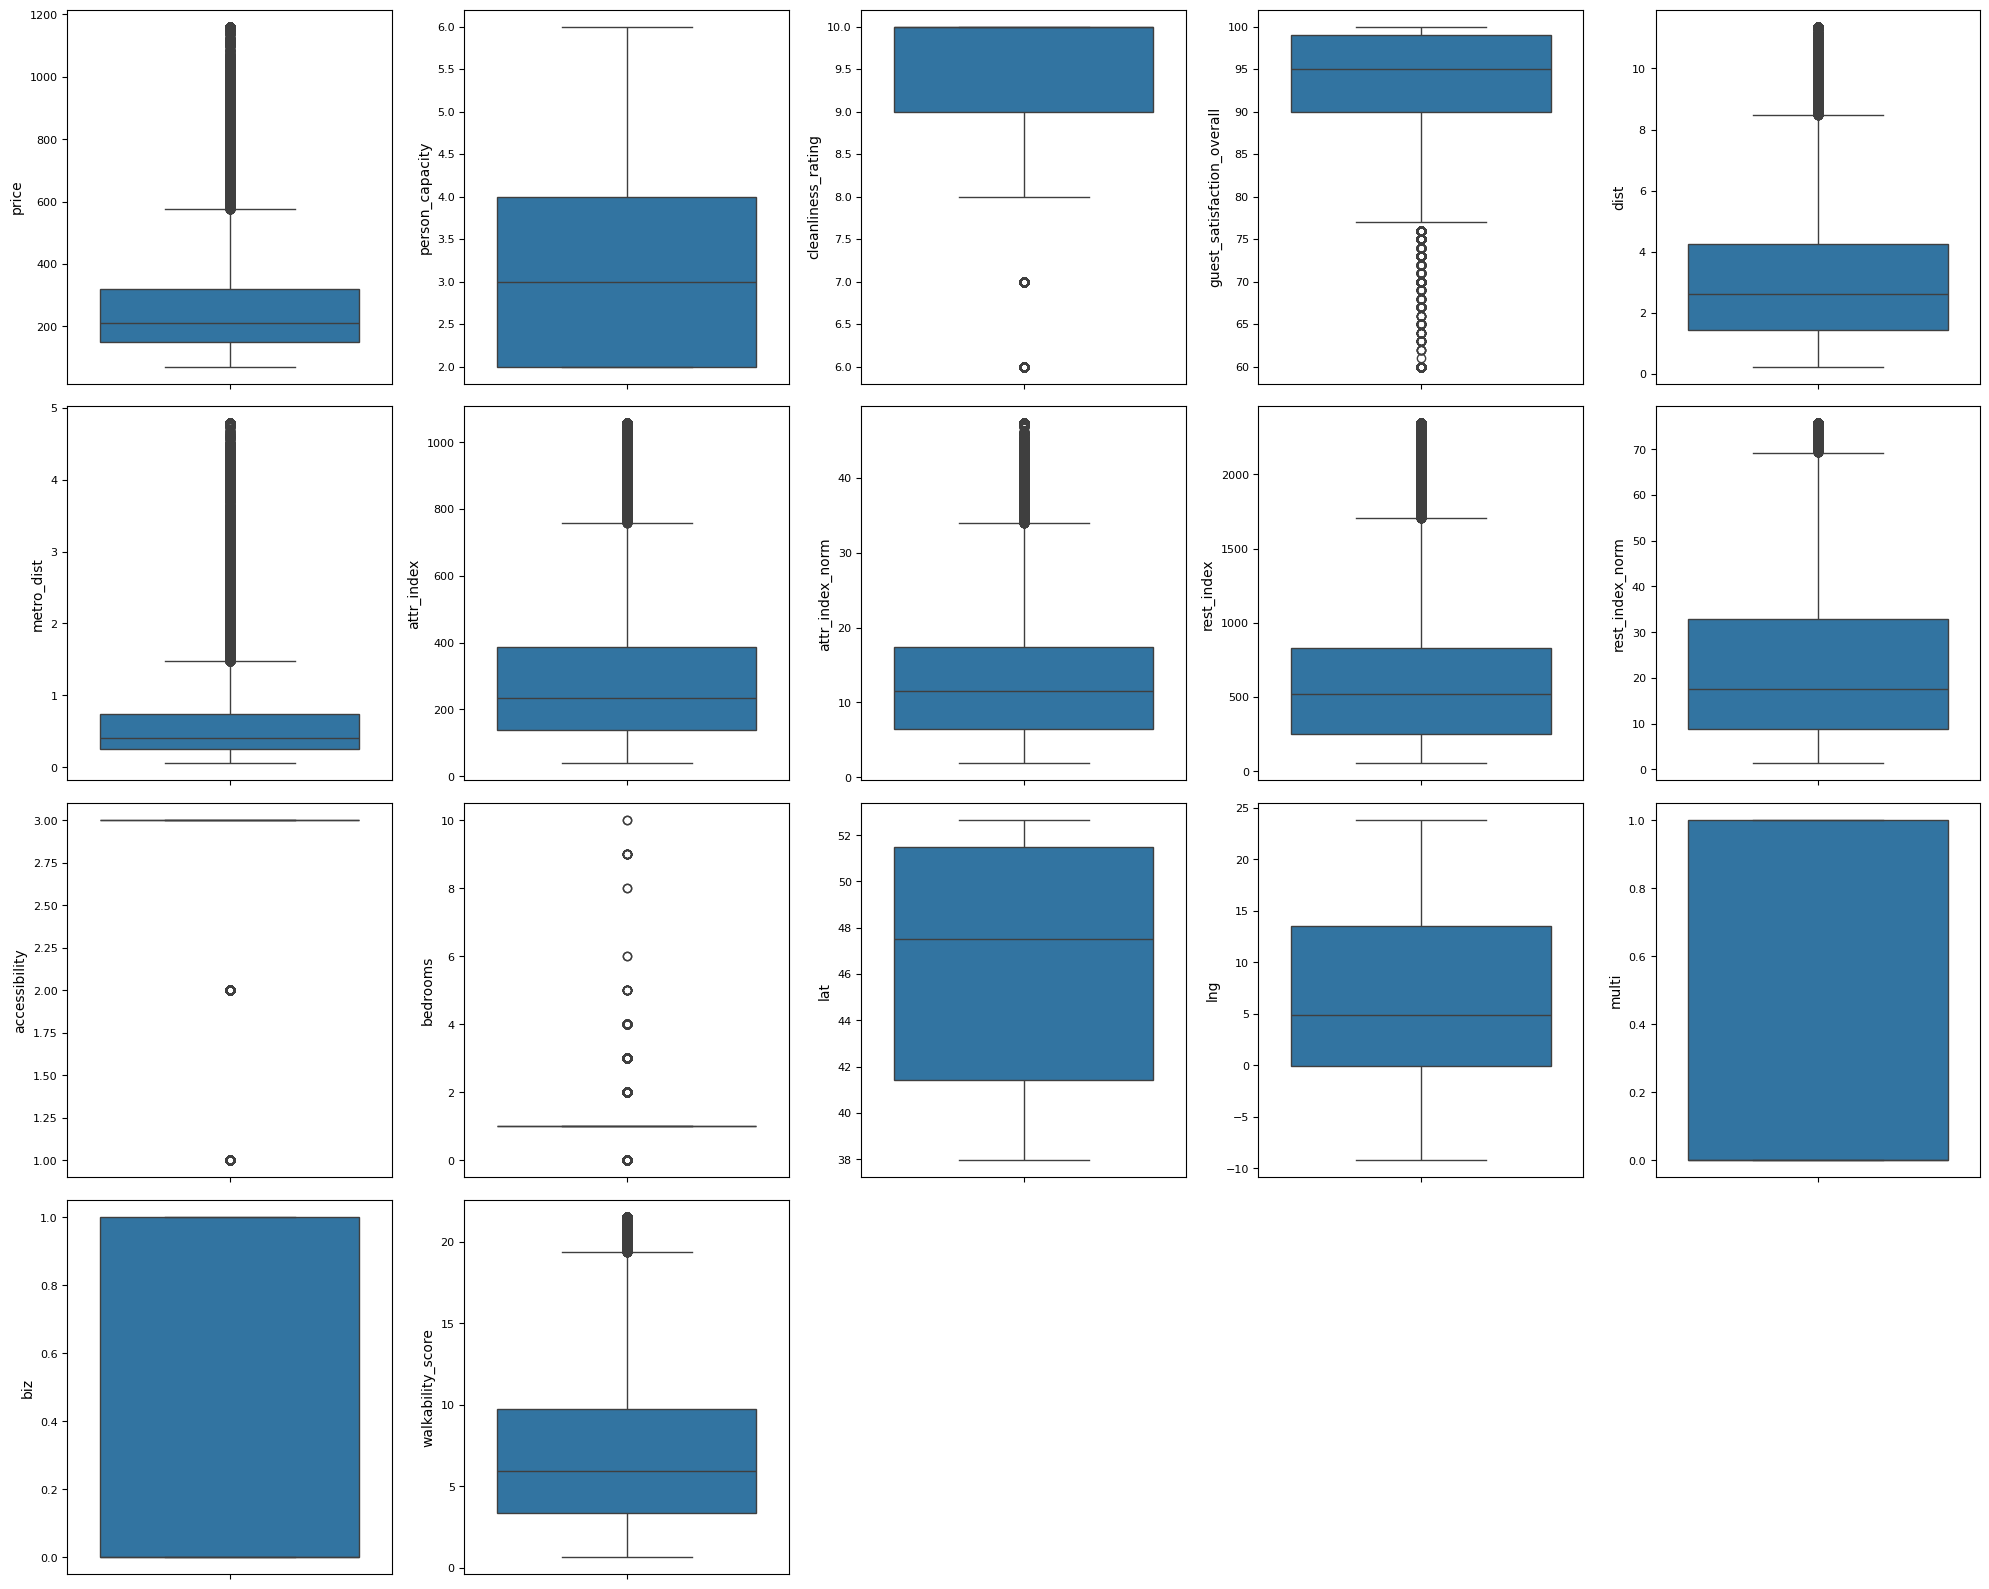

In [ ]:
features = ['price','person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index', 'attr_index_norm', 'rest_index', 'rest_index_norm','accessibility', 'bedrooms','lat','lng','multi','biz','walkability_score']

# Tentukan jumlah fitur
num_features = len(features)

# Menentukan jumlah baris dan kolom
cols = 5  # Tetapkan jumlah kolom tetap 5
rows = (num_features // cols) + (num_features % cols > 0)  # Menyesuaikan jumlah baris

# Membuat figure dengan ukuran yang sesuai
plt.figure(figsize=(cols * 4, rows * 4))

for i in range(num_features):
    plt.subplot(rows, cols, i + 1)  # Menyesuaikan grid
    sns.boxplot(y=europe_airbnb[features[i]])  # Menampilkan boxplot
    plt.ylabel(features[i])
    plt.tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()  # Menyusun layout secara rapi
plt.show()

In [ ]:
europe_airbnb.head()

price  room_shared  room_private  person_capacity  host_is_superhost  \
0  194.033698            0             1                2                  0   
1  344.245776            0             1                4                  0   
2  264.101422            0             1                2                  0   
3  433.529398            0             1                4                  0   
4  485.552926            0             1                2                  1   

   multi  biz  cleanliness_rating  guest_satisfaction_overall  bedrooms  ...  \
0      1    0                  10                          93         1  ...   
1      0    0                   8                          85         1  ...   
2      0    1                   9                          87         1  ...   
3      0    1                   9                          90         2  ...   
4      0    0                  10                          98         1  ...   

   kota_lisbon  kota_london  kota_paris  kota_rome  kota_vienna  \
0            0            0           0          0            0   
1            0            0           0          0            0   
2            0            0           0          0            0   
3            0            0           0          0            0   
4            0            0           0          0            0   

   Entire home/apt  Private room  Shared room  accessibility  \
0                0             1            0              2   
1                0             1            0              3   
2                0             1            0              2   
3                0             1            0              3   
4                0             1            0              3   

   walkability_score  
0           1.712826  
1          17.812324  
2           1.614860  
3          16.689543  
4          16.520613  

[5 rows x 34 columns]

In [ ]:
numerical = ['price','person_capacity', 'cleanliness_rating',
             'guest_satisfaction_overall', 'dist', 'metro_dist', 'attr_index',
             'attr_index_norm', 'rest_index', 'rest_index_norm','accessibility',
             'bedrooms','lat','lng','host_is_superhost','biz','Entire home/apt', 'multi','kota_amsterdam','kota_athens','kota_barcelona','kota_berlin','kota_budapest','kota_lisbon','kota_london','kota_paris','kota_rome','kota_vienna', 'Shared room','Private room','walkability_score']

# Hitung deskripsi statistik standar
desc = europe_airbnb[numerical].describe().T

# Tampilkan tabel dengan mean, count, std, min, 25%, 50%, 75%, max di baris
print(desc)

                              count        mean         std        min  \
price                       51707.0  270.356064  191.555725  71.540458   
person_capacity             51707.0    3.161661    1.298545   2.000000   
cleanliness_rating          51707.0    9.409461    0.851447   6.000000   
guest_satisfaction_overall  51707.0   92.816853    7.849934  60.000000   
dist                        51707.0    3.163635    2.266549   0.244200   
metro_dist                  51707.0    0.668867    0.774130   0.053322   
attr_index                  51707.0  291.279956  206.740078  38.106328   
attr_index_norm             51707.0   13.267021    9.000010   1.851009   
rest_index                  51707.0  623.012615  479.812675  52.691937   
rest_index_norm             51707.0   22.715144   17.552900   1.310634   
accessibility               51707.0    2.822519    0.389051   1.000000   
bedrooms                    51707.0    1.158760    0.627410   0.000000   
lat                         51707.0   

### **8. Handle Class Imbalance**

Terdapat class imbalance pada feature room_type dengan values shared rooms jauh berbeda dengan kedua values. Namun, class imbalance tidak dilakukan handling class imbalance.

### **9. Feature Selection**

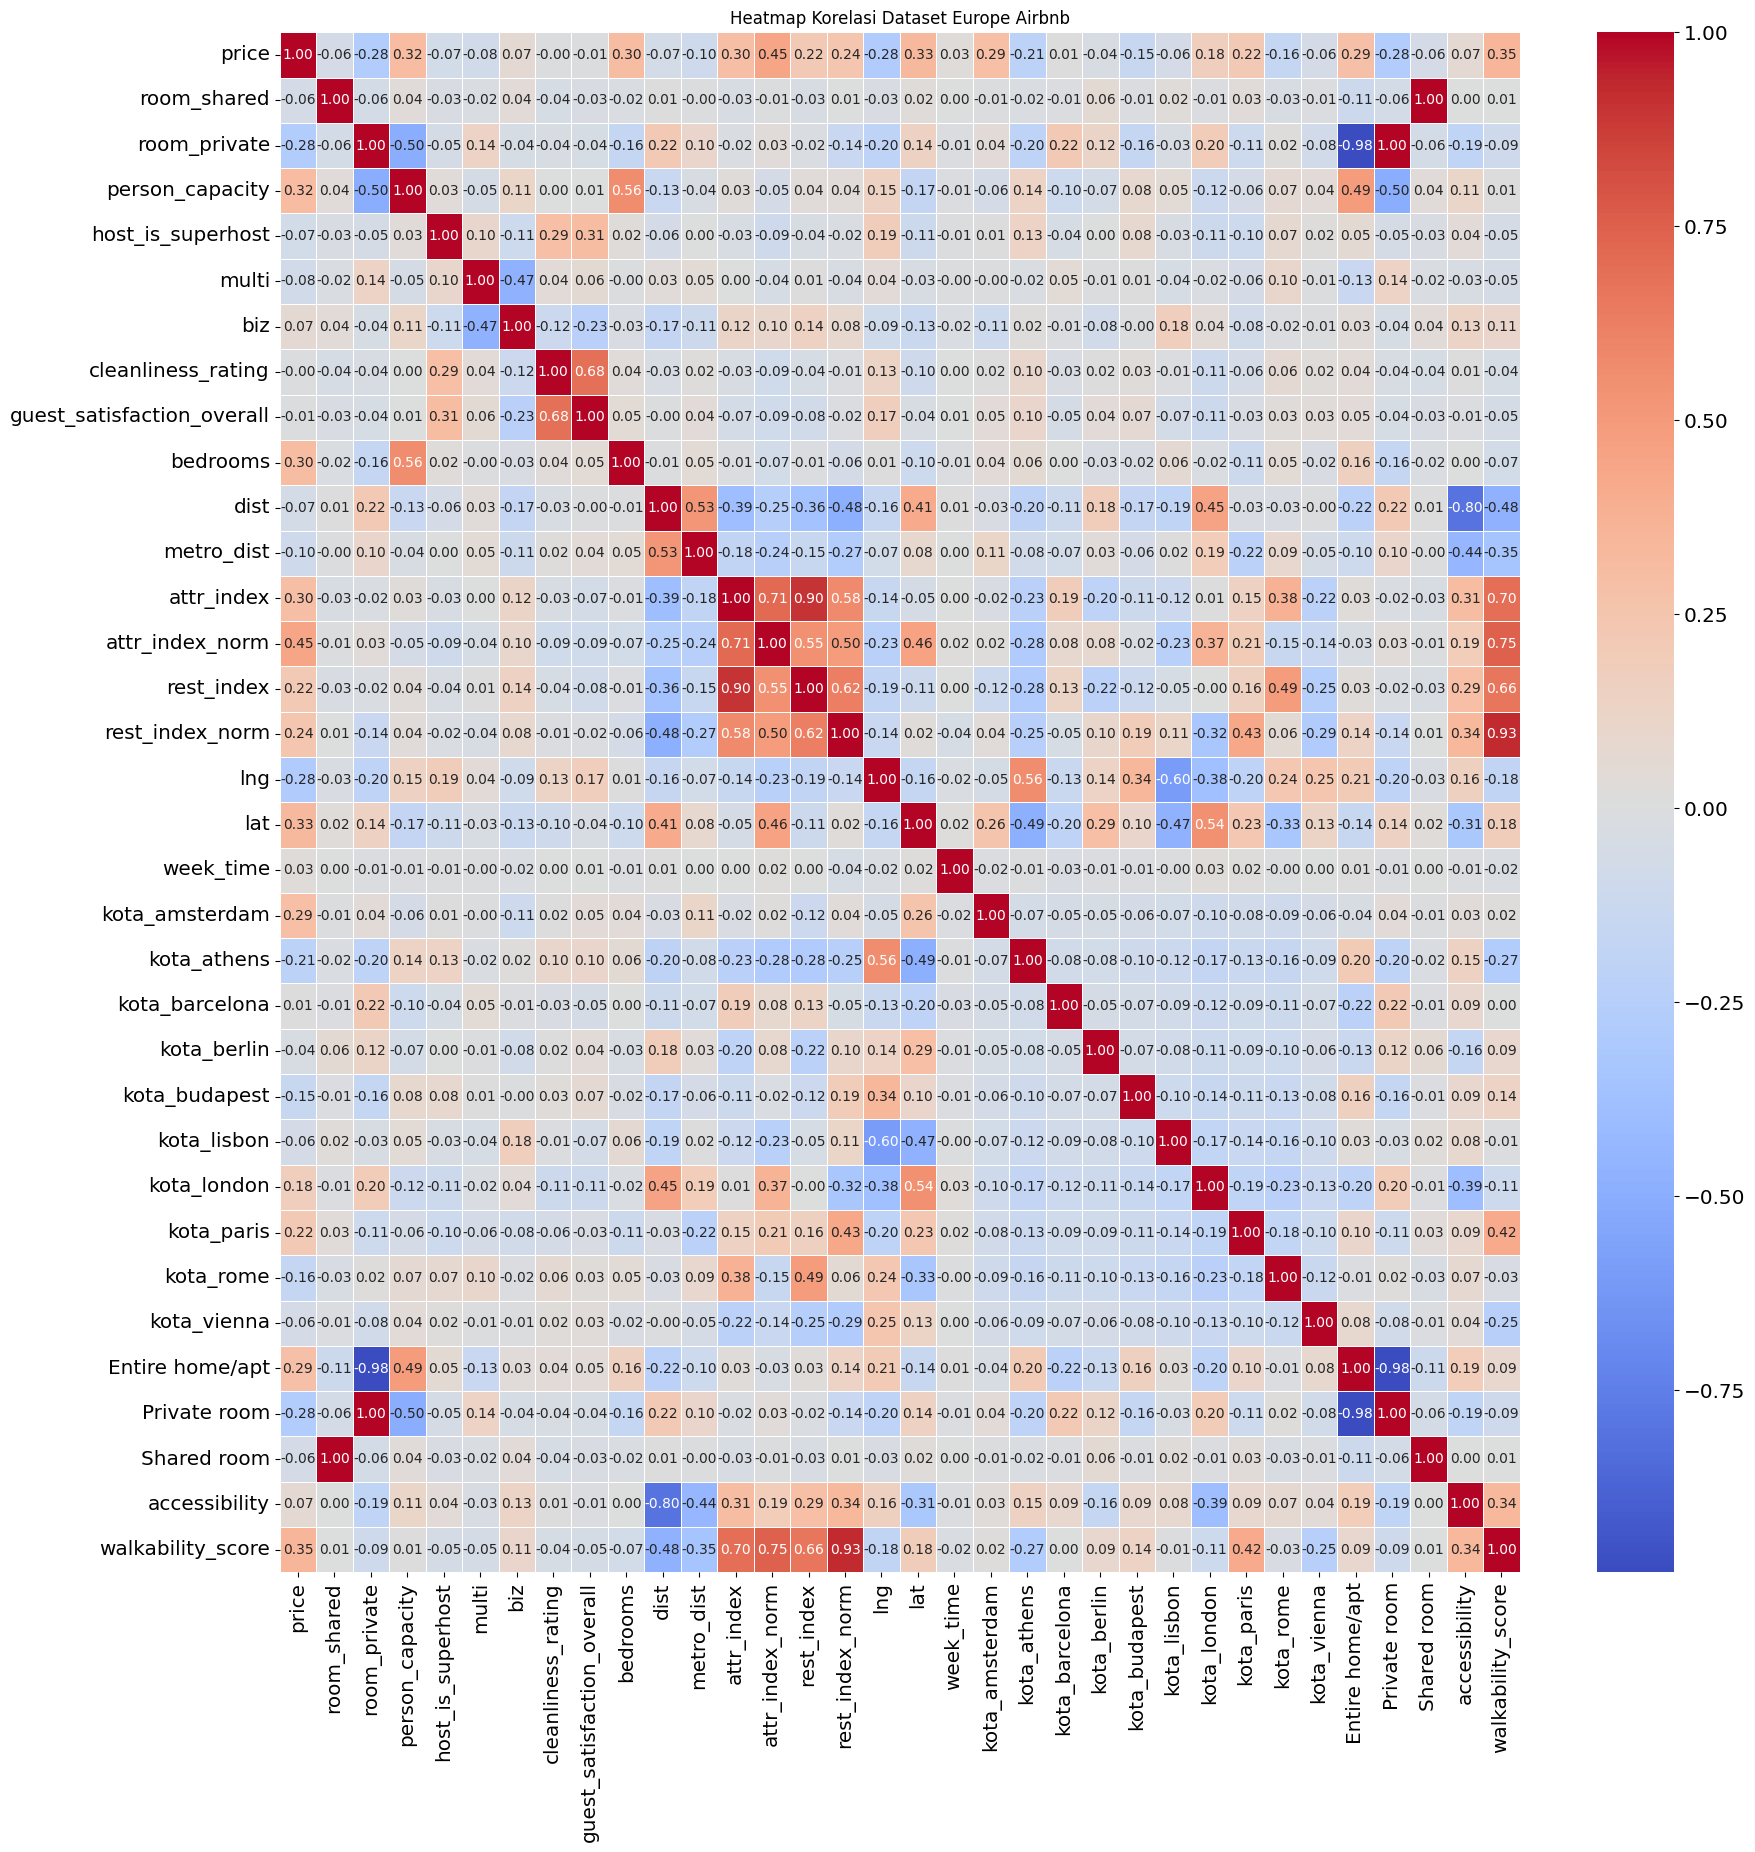

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = europe_airbnb.corr()

# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Dataset Europe Airbnb")
plt.show()

Kolom Entire home/apt, attr_index, rest_index_norm, week_time, cleanliness_rating, room_shared, multi, room_private dihapus karena merupakan data redundant yang terlihat dari korelasi yang sangat kuat antar dua feature.



### **10. Korelasi Feature Terhadap Price**

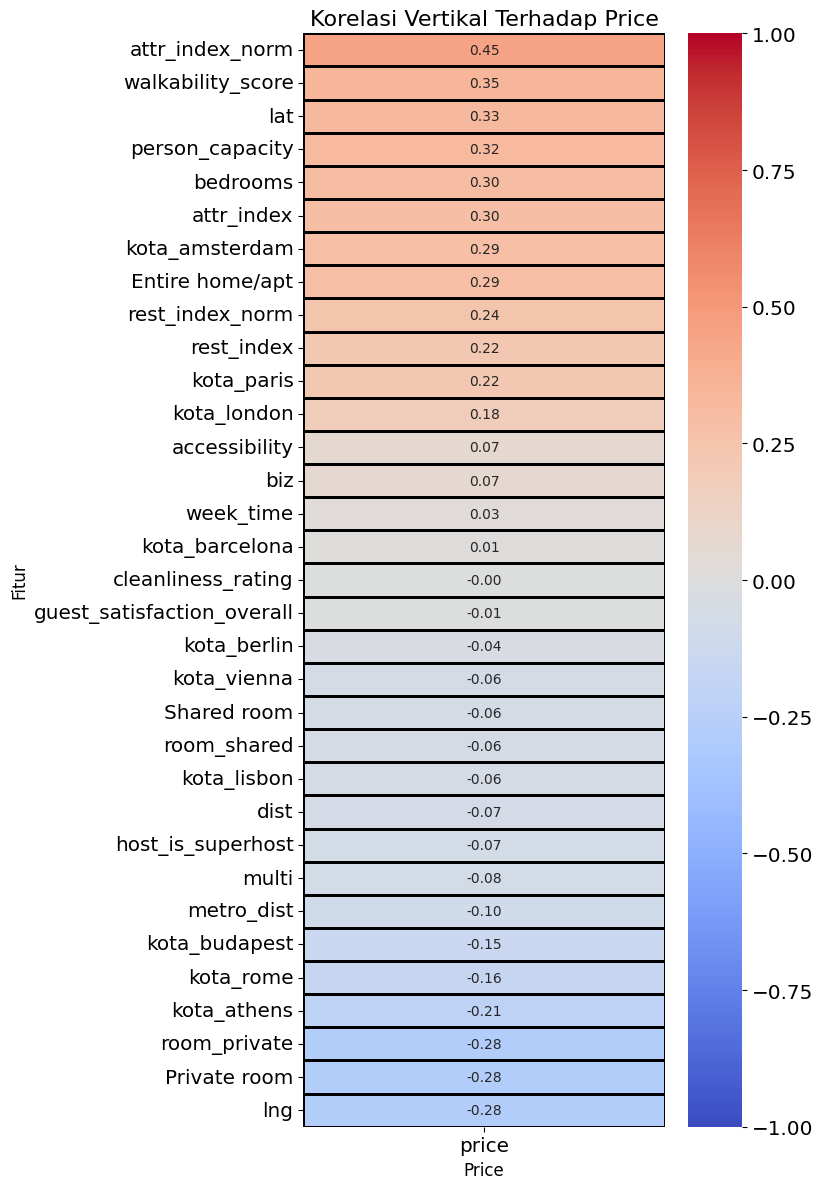

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung korelasi antara semua kolom numerik
correlation_matrix = europe_airbnb.corr()

# Memilih kolom yang berkaitan dengan 'price' dan mengurutkan berdasarkan korelasi terhadap 'price'
price_correlation = correlation_matrix['price'].drop('price').sort_values(ascending=False)

# Membuat heatmap untuk korelasi terhadap 'price'
plt.figure(figsize=(8, 12))
sns.heatmap(price_correlation.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, fmt='.2f', linewidths=1, linecolor='black')

# Menambahkan judul dan label
plt.title('Korelasi Vertikal Terhadap Price', fontsize=16)
plt.ylabel('Fitur', fontsize=12)
plt.xlabel('Price', fontsize=12)
plt.tight_layout()

# Menyimpan heatmap
plt.savefig('heatmap_price_correlation_with_boxes.png')

# Menampilkan plot
plt.show()

In [ ]:
europe_airbnb.drop(columns=['attr_index','rest_index_norm','room_shared','room_private'], inplace=True)

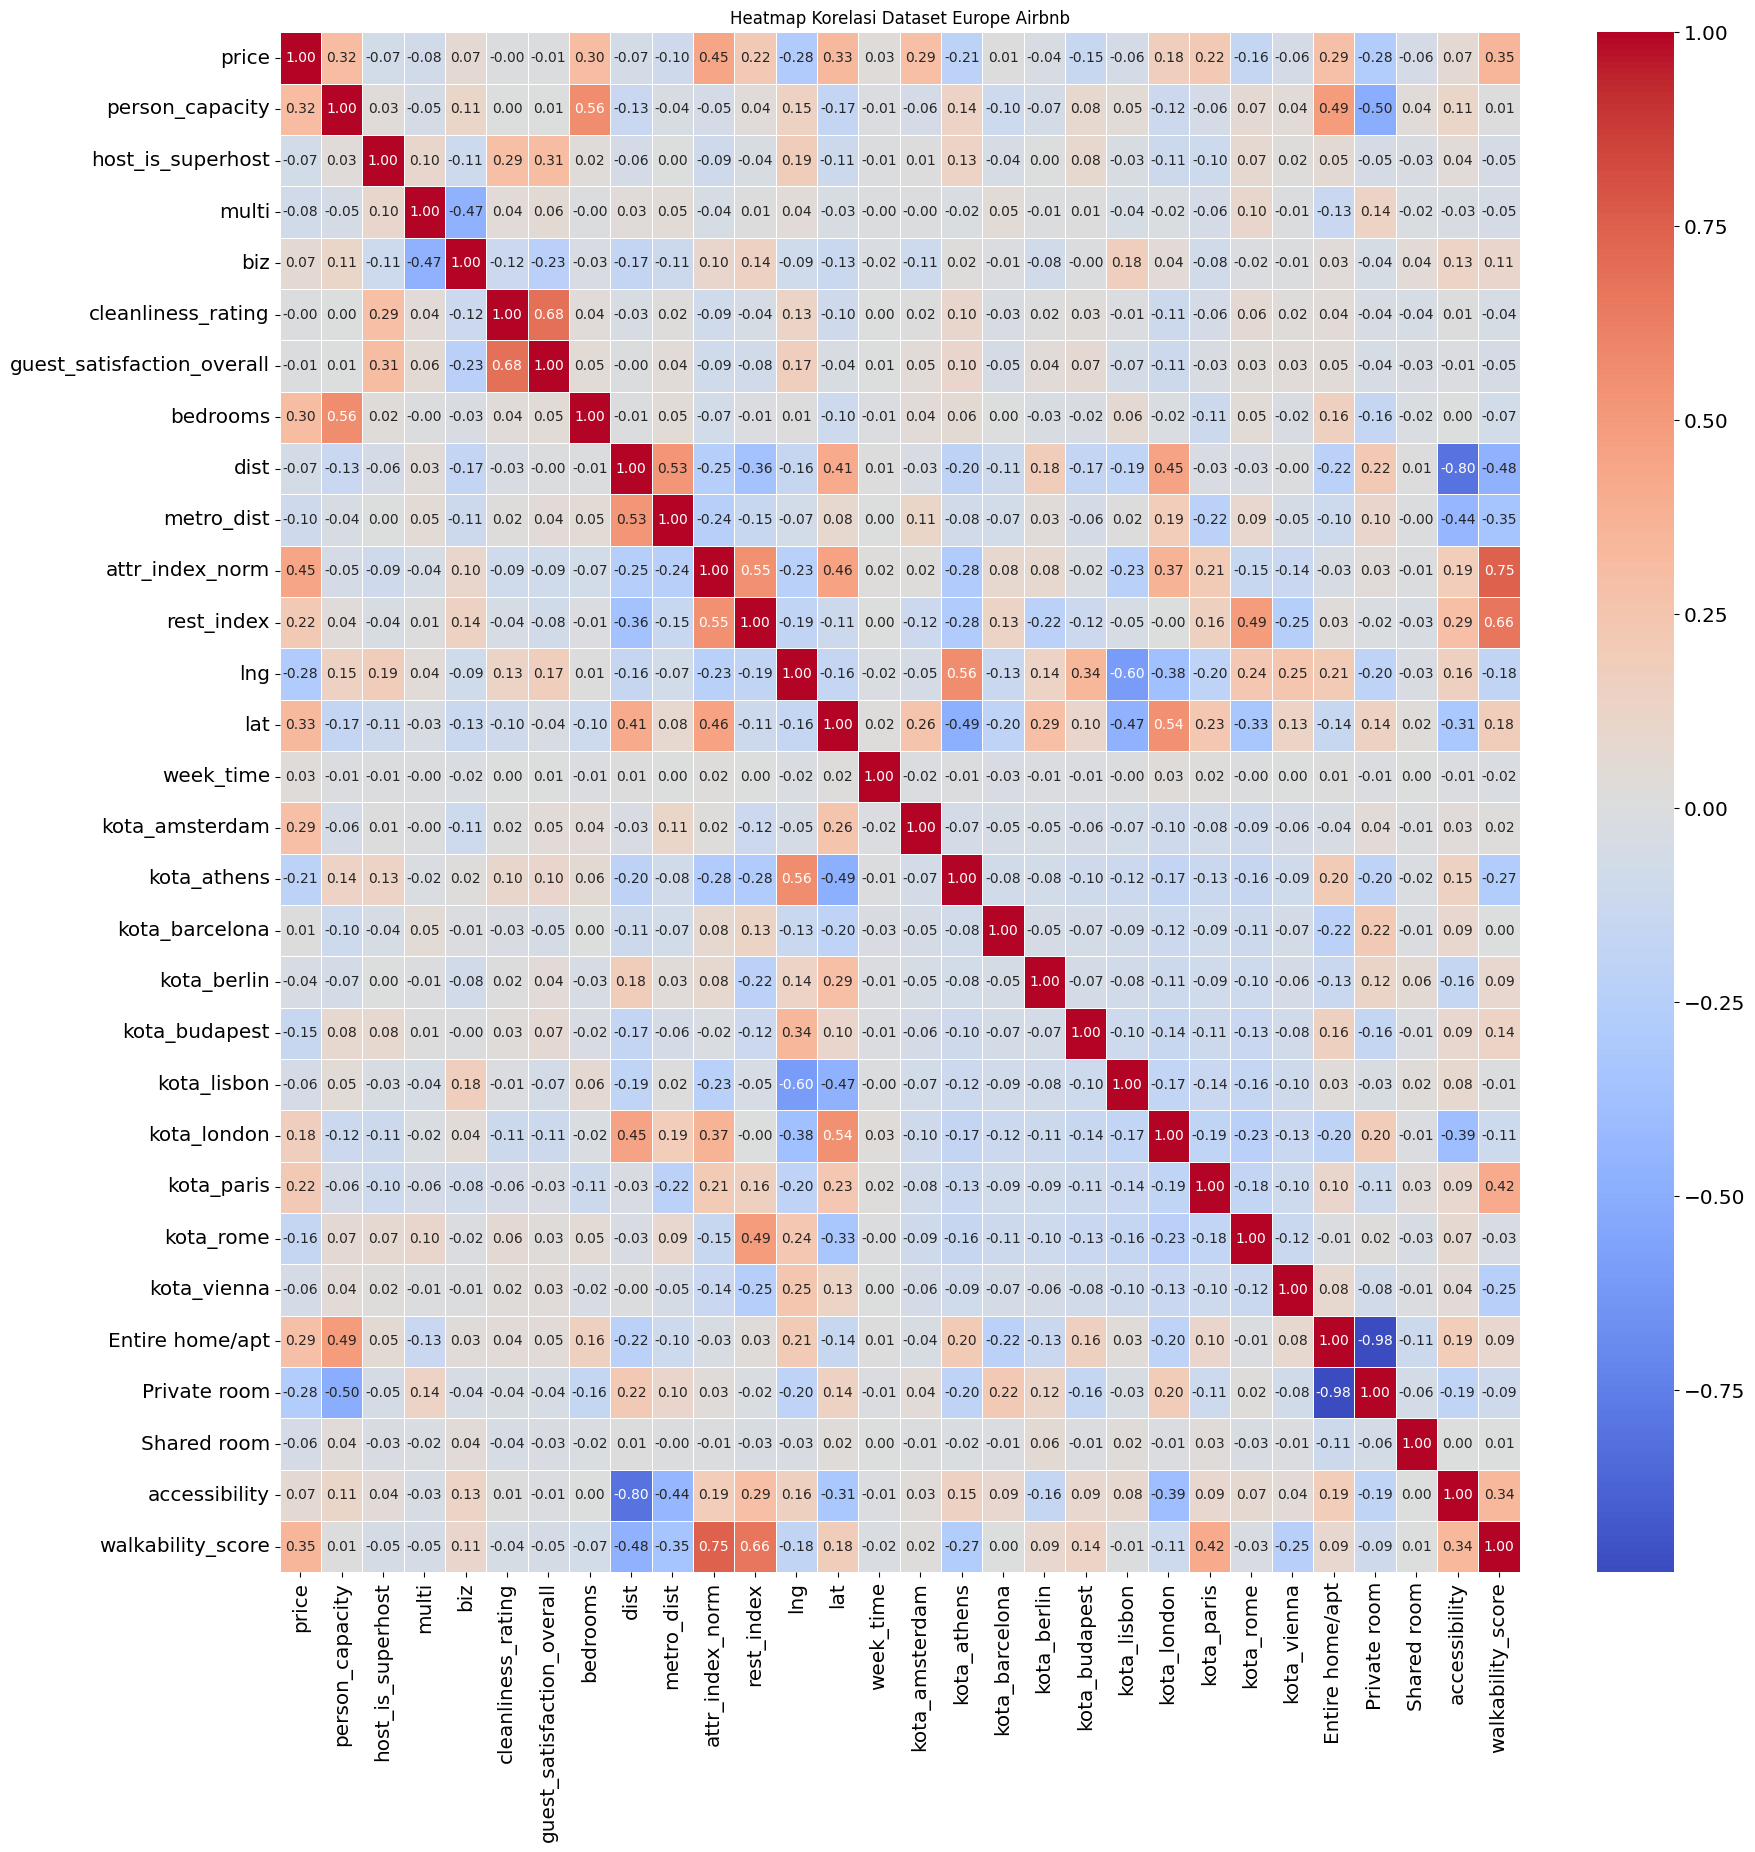

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung matriks korelasi
correlation_matrix = europe_airbnb.corr()

# Membuat heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Dataset Europe Airbnb")
plt.show()

### **11. Normalization/Standardization**

#### **Standarisasi**

Standariasi akan dilakukan setelah proses Split Train and Test untuk menghindari data leakage.

## **F. Split Train dan Test Dataset**

Split train and test dilakukan dengan memisahkan antara data training dan data test. Data training dilakukan standarisasi dengan menggunakan MinMaxScaler.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Kolom yang akan di-scaling
columns_to_scale = ['cleanliness_rating','bedrooms','person_capacity',
            'guest_satisfaction_overall', 'dist', 'metro_dist','accessibility',
            'attr_index_norm', 'rest_index',
            'lat', 'lng','walkability_score']
columns_not_to_scale = ['host_is_superhost','week_time','biz','Entire home/apt', 'multi','kota_amsterdam','kota_athens','kota_barcelona','kota_berlin','kota_budapest','kota_lisbon','kota_london','kota_paris','kota_rome','kota_vienna', 'Shared room','Private room']

columns_to_include = columns_to_scale + columns_not_to_scale

# Pisahkan dataset menjadi fitur dan target
X = europe_airbnb[columns_to_include]  # Fitur
y = europe_airbnb['price']  # Target

# Split data menjadi train dan test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Lakukan scaling pada data train dan test
X_train_scaled = scaler.fit_transform(X_train)  # Fit dan transform pada data train
X_test_scaled = scaler.transform(X_test)  # Transform hanya pada data test

# Convert hasil scaling menjadi DataFrame untuk memudahkan manipulasi
X_train_scaled = pd.DataFrame(X_train_scaled, columns=columns_to_include)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=columns_to_include)

# Menampilkan hasil untuk verifikasi
print("Data Train Setelah Scaling:")
print(X_train_scaled.head())
print("\nData Test Setelah Scaling:")
print(X_test_scaled.head())

Data Train Setelah Scaling:
   cleanliness_rating  bedrooms  person_capacity  guest_satisfaction_overall  \
0           -0.478941 -0.252962        -0.122419                    0.151940   
1            0.692292 -0.252962         0.648452                    0.913758   
2            0.692292  1.342367         0.648452                    0.913758   
3           -0.478941 -0.252962        -0.893289                    0.151940   
4           -0.478941 -1.848290        -0.122419                    0.405879   

       dist  metro_dist  accessibility  attr_index_norm  rest_index       lat  \
0  0.504865   -0.324179       0.455777         1.254633    0.178883  1.111075   
1  0.147069   -0.515318       0.455777        -0.689917    0.586037 -0.726372   
2 -0.919438    0.228551       0.455777        -0.997298   -0.937788 -1.467575   
3  0.789537    1.298175       0.455777         0.331094   -0.208102  1.115708   
4  0.952492    4.835842      -2.114182        -0.989981   -0.942548 -1.331517   

   .

## **G. Modelling**

### **1. Linear Regression**

#####Modelling

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  84.11672979517982
Testing MAE:  83.29406007879852
Training RMSE:  125.254142157261
Testing RMSE:  124.09012553480544
Training R2 Score:  0.571608343107596
Testing R2 Score:  0.5835583229980008


####Cross Validation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Inisialisasi model Linear Regression
model = LinearRegression()

# Cross-validation dengan 5-fold untuk MAE
cv_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validation MAE: {cv_mae}')
print(f'Mean Cross-validation MAE: {cv_mae.mean()}')

# Cross-validation dengan 5-fold untuk R² (koefisien determinasi)
cv_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f'Cross-validation R²: {cv_r2}')
print(f'Mean Cross-validation R²: {cv_r2.mean()}')

# Cross-validation dengan 5-fold untuk RMSE
cv_rmse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
print(f'Cross-validation RMSE: {cv_rmse}')
print(f'Mean Cross-validation RMSE: {cv_rmse.mean()}')

# Fit model ke data training
model.fit(X_train, y_train)

# Evaluasi pada data training
y_train_pred = model.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

print("\nPerformance on Training Data:")
print(f"MAE: {train_mae}")
print(f"RMSE: {train_rmse}")
print(f"R²: {train_r2}")

# Evaluasi pada data testing
y_test_pred = model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("\nPerformance on Testing Data:")
print(f"MAE: {test_mae}")
print(f"RMSE: {test_rmse}")
print(f"R²: {test_r2}")

Cross-validation MAE: [-84.33068116 -85.10503561 -84.50185497 -83.21894598 -83.83366926]
Mean Cross-validation MAE: -84.19803739663223
Cross-validation R²: [0.57692001 0.57163428 0.56372169 0.56561451 0.57544285]
Mean Cross-validation R²: 0.570666668015072
Cross-validation RMSE: [-126.62026282 -127.45591245 -126.40890362 -122.59895467 -123.72374161]
Mean Cross-validation RMSE: -125.36155503330535

Performance on Training Data:
MAE: 84.11672979517982
RMSE: 125.254142157261
R²: 0.571608343107596

Performance on Testing Data:
MAE: 83.29406007879852
RMSE: 124.09012553480544
R²: 0.5835583229980008


1. Hasil model Linear Regression menunjukkan performa yang cukup baik dengan nilai MAE (Mean Absolute Error) pada data pelatihan sebesar 84.12 dan pada data pengujian sebesar 83.29, yang menunjukkan bahwa prediksi model mendekati nilai aktual dengan error relatif kecil. RMSE (Root Mean Squared Error) pada pelatihan adalah 125.25, dan pada pengujian 124.09, yang berarti perbedaan antara nilai prediksi dan nilai aktual cenderung besar, tetapi masih dalam batas yang dapat diterima. Nilai R² (koefisien determinasi) menunjukkan seberapa baik model dapat menjelaskan variansi data, dengan R² pelatihan sebesar 0.57 dan pengujian 0.58, yang menunjukkan bahwa model ini dapat menjelaskan sekitar 57-58% variansi data, dengan sedikit penurunan performa pada data pengujian.

2. Hasil cross-validation menunjukkan bahwa model Linear Regression memiliki performa yang konsisten namun tidak sempurna di berbagai pembagian data. Nilai MAE untuk cross-validation bervariasi antara -83.22 hingga -85.11, dengan rata-rata sebesar -84.20, yang menunjukkan kesalahan prediksi yang relatif kecil pada setiap fold. Nilai R² untuk setiap fold berkisar antara 0.56 hingga 0.58, dengan rata-rata sebesar 0.57, menunjukkan bahwa model dapat menjelaskan sekitar 57% dari variansi data. RMSE untuk setiap fold bervariasi antara -122.60 hingga -127.46, dengan rata-rata sebesar -125.36, yang mengindikasikan bahwa meskipun model mampu memberikan prediksi yang relatif baik, ada beberapa perbedaan signifikan antara prediksi dan nilai aktual pada beberapa fold.

### **2. Ridge**

#####Modelling

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  84.30988585968674
Testing MAE:  83.39834439099363
Training RMSE:  125.53752166200299
Testing RMSE:  124.35756648220762
Training R2 Score:  0.5696677327545007
Testing R2 Score:  0.5817613456292393


#####Hyperparameter Tuning

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import uniform
from math import sqrt
import numpy as np

# Tentukan hyperparameter yang akan dituning dengan distribusi acak
param_dist = {
    'alpha': uniform(0.1, 10),  # Nilai alpha untuk regularisasi
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],  # Pilihan solver
}

# Melakukan pencarian hyperparameter terbaik
n_iter_search = 100  # Jumlah iterasi pencarian
best_score = -np.inf
best_params = None

for _ in range(n_iter_search):
    # Sampling hyperparameter acak
    params = {
        'alpha': param_dist['alpha'].rvs(),
        'solver': np.random.choice(param_dist['solver']),
    }

    # Inisialisasi model dengan parameter acak
    model = Ridge(random_state=42, **params)
    model.fit(X, y)
    y_pred = model.predict(X)  # Perbaiki prediksi menggunakan model yang benar

    # Evaluasi dengan MAE
    mae = mean_absolute_error(y, y_pred)
    score = -mae  # Negasi MAE karena kita memaksimalkan skor

    # Update jika skor lebih baik
    if score > best_score:
        best_score_rid = score
        best_params_rid = params
        best_model_rid = model  # Simpan model terbaik

# Menampilkan hasil terbaik
print("Best Hyperparameters: ", best_params_rid)
print("Best Score (MAE): ", -best_score_rid)

# Evaluasi akhir dengan model terbaik
y_pred_rid = best_model_rid.predict(X)  # Prediksi dengan model terbaik
mae_rid = mean_absolute_error(y, y_pred_rid)
mse_rid = mean_squared_error(y, y_pred_rid)  # Hitung MSE
rmse_rid = sqrt(mse_rid)  # Hitung RMSE secara manual
r2_rid = r2_score(y, y_pred_rid)

print(f"Final MAE: {mae_rid}")
print(f"Final RMSE: {rmse_rid}")
print(f"Final R2 Score: {r2_rid}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Hyperparameters:  {'alpha': 2.2996400379084903, 'solver': 'saga'}
Best Score (MAE):  86.77468193232043
Final MAE: 86.77468193232043
Final RMSE: 130.38702375065154
Final R2 Score: 0.5366737887836222


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#####Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation pada data training untuk perbandingan
cv_mae_rid = cross_val_score(best_model_rid, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_rid = cross_val_score(best_model_rid, X_train, y_train, cv=5, scoring='r2')
cv_rmse_rid = cross_val_score(best_model_rid, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Menampilkan hasil cross-validation
print("\nCross-validation Results:")
print(f"Cross-validation MAE: {cv_mae_rid}")
print(f"Mean Cross-validation MAE: {cv_mae_rid.mean()}")
print(f"Cross-validation R²: {cv_r2_rid}")
print(f"Mean Cross-validation R²: {cv_r2_rid.mean()}")
print(f"Cross-validation RMSE: {cv_rmse_rid}")
print(f"Mean Cross-validation RMSE: {cv_rmse_rid.mean()}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 


Cross-validation Results:
Cross-validation MAE: [-88.71084685 -88.84827977 -88.33182155 -87.30710499 -88.33276358]
Mean Cross-validation MAE: -88.30616334765446
Cross-validation R²: [0.52170548 0.52137544 0.51547686 0.51523822 0.51935211]
Mean Cross-validation R²: 0.5186296221344823
Cross-validation RMSE: [-134.6293267  -134.72559925 -133.21499481 -129.5129796  -131.64321679]
Mean Cross-validation RMSE: -132.74522343153865


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1. Hasil model Ridge menunjukkan performa yang mirip dengan model Linear Regression, meskipun ada sedikit perbedaan. Nilai MAE untuk pelatihan adalah 84.31 dan untuk pengujian 83.40, menunjukkan bahwa prediksi model ini juga cukup mendekati nilai aktual dengan error yang sedikit lebih besar dibandingkan Linear Regression. RMSE untuk pelatihan adalah 125.54 dan untuk pengujian 124.36, yang menunjukkan bahwa meskipun model ini memiliki kesalahan yang relatif kecil, terdapat sedikit perbedaan antara nilai prediksi dan aktual. Nilai R² untuk pelatihan adalah 0.57 dan untuk pengujian 0.58, yang menunjukkan bahwa model ini juga dapat menjelaskan sekitar 57-58% variansi data, dengan performa sedikit lebih baik pada data pengujian dibandingkan data pelatihan.

2. Hasil hyperparameter tuning untuk model Ridge menunjukkan bahwa hyperparameter terbaik yang ditemukan adalah alpha sebesar 2.30 dan solver 'saga'. Namun, meskipun hyperparameter tersebut memberikan skor terbaik, performa model pada data final menunjukkan MAE sebesar 86.77, yang sedikit lebih tinggi dibandingkan dengan model sebelumnya. RMSE untuk model final ini adalah 130.39, yang lebih tinggi dibandingkan hasil pada tahap sebelumnya, menunjukkan adanya kesalahan prediksi yang lebih besar. Nilai R² akhir sebesar 0.54 menunjukkan bahwa model ini dapat menjelaskan sekitar 54% dari variansi data, sedikit lebih rendah dibandingkan model sebelumnya.

3. Hasil cross-validation untuk model Ridge menunjukkan kinerja yang relatif stabil, dengan MAE berkisar antara -87.31 dan -88.85, dengan rata-rata sebesar -88.31. Ini menunjukkan bahwa model cenderung menghasilkan kesalahan prediksi yang sedikit lebih tinggi dibandingkan model sebelumnya. Nilai R² untuk cross-validation berkisar antara 0.51 hingga 0.52, dengan rata-rata sebesar 0.52, yang menunjukkan bahwa model ini hanya dapat menjelaskan sekitar 51-52% dari variansi data, lebih rendah dibandingkan dengan hasil R² model Linear Regression. RMSE untuk cross-validation berkisar antara -129.51 dan -134.73, dengan rata-rata sebesar -132.75, yang lebih tinggi, menandakan bahwa model ini memberikan prediksi dengan kesalahan yang lebih besar dibandingkan model Linear Regression.

### **3. Lasso**

#####Modelling

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error

# Prediksi
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  84.11153027960476
Testing MAE:  83.41726152375965
Training RMSE:  126.37963845106707
Testing RMSE:  125.34087538676089
Training R2 Score:  0.5638749547153484
Testing R2 Score:  0.5751210786158647


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import uniform
import numpy as np

# Tentukan hyperparameter yang akan dituning dengan distribusi acak
param_dist = {
    'alpha': uniform(0.1, 10),  # Nilai alpha untuk regularisasi
    'max_iter': [1000, 5000, 10000],  # Pilihan iterasi maksimum
}

# Melakukan pencarian hyperparameter terbaik
n_iter_search = 100  # Jumlah iterasi pencarian
best_score = -np.inf
best_params = None

for _ in range(n_iter_search):
    # Sampling hyperparameter acak
    params = {
        'alpha': param_dist['alpha'].rvs(),
        'max_iter': np.random.choice(param_dist['max_iter']),
    }

    # Inisialisasi model dengan parameter acak
    model = Lasso(random_state=42, **params)
    model.fit(X, y)
    y_pred = model.predict(X)  # Prediksi menggunakan model yang sesuai

    # Evaluasi dengan MAE
    mae = mean_absolute_error(y, y_pred)
    score = -mae  # Negasi MAE karena kita memaksimalkan skor

    # Update jika skor lebih baik
    if score > best_score:
        best_score_lasso = score
        best_params_lasso = params
        best_model_lasso = model  # Simpan model terbaik

# Menampilkan hasil terbaik
print("Best Hyperparameters: ", best_params_lasso)
print("Best Score (MAE): ", -best_score_lasso)

# Evaluasi akhir dengan model terbaik
y_pred_lasso = best_model_lasso.predict(X)  # Prediksi menggunakan model terbaik
mae_lasso = mean_absolute_error(y, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y, y_pred_lasso))  # Manual RMSE jika squared=False tidak didukung
r2_lasso = r2_score(y, y_pred_lasso)

print(f"Final MAE: {mae_lasso}")
print(f"Final RMSE: {rmse_lasso}")
print(f"Final R2 Score: {r2_lasso}")

Best Hyperparameters:  {'alpha': 8.482716920194424, 'max_iter': 10000}
Best Score (MAE):  92.22582834554566
Final MAE: 92.22582834554566
Final RMSE: 139.41575480787517
Final R2 Score: 0.470285532765211


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation pada data training untuk perbandingan
cv_mae_lasso = cross_val_score(best_model_lasso, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_lasso = cross_val_score(best_model_lasso, X_train, y_train, cv=5, scoring='r2')
cv_rmse_lasso = cross_val_score(best_model_lasso, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Menampilkan hasil cross-validation
print("\nCross-validation Results for Lasso:")
print(f"Cross-validation MAE: {cv_mae_lasso}")
print(f"Mean Cross-validation MAE: {-cv_mae_lasso.mean()}")  # Negasi untuk menampilkan nilai MAE positif
print(f"Cross-validation R²: {cv_r2_lasso}")
print(f"Mean Cross-validation R²: {cv_r2_lasso.mean()}")
print(f"Cross-validation RMSE: {cv_rmse_lasso}")
print(f"Mean Cross-validation RMSE: {-cv_rmse_lasso.mean()}")  # Negasi untuk nilai RMSE positif


Cross-validation Results for Lasso:
Cross-validation MAE: [-92.63545393 -92.82907297 -92.2155156  -90.88038417 -92.38188877]
Mean Cross-validation MAE: 92.18846308843096
Cross-validation R²: [0.46916427 0.47031847 0.46558606 0.46873002 0.46582088]
Mean Cross-validation R²: 0.4679239406732106
Cross-validation RMSE: [-141.83128628 -141.72943247 -139.90548475 -135.5834712  -138.78049137]
Mean Cross-validation RMSE: 139.56603321414644


1. Hasil model Lasso menunjukkan performa yang serupa dengan model Ridge, dengan nilai MAE pada data pelatihan sebesar 84.11 dan pada data pengujian sebesar 83.42, yang menunjukkan kesalahan prediksi yang relatif kecil dan hampir tidak ada perbedaan besar antara pelatihan dan pengujian. RMSE pada pelatihan adalah 126.38, dan pada pengujian 125.34, yang menunjukkan bahwa perbedaan antara nilai prediksi dan nilai aktual cukup kecil, meskipun sedikit lebih besar dibandingkan model Ridge. Nilai R² untuk pelatihan adalah 0.56 dan untuk pengujian 0.58, yang menunjukkan bahwa model ini dapat menjelaskan sekitar 56-58% dari variansi data, dengan sedikit peningkatan pada data pengujian dibandingkan pelatihan.

2. Hasil hyperparameter tuning untuk model Lasso menunjukkan bahwa hyperparameter terbaik yang ditemukan adalah alpha sebesar 8.48 dan jumlah iterasi maksimum sebanyak 10.000. Meskipun hyperparameter terbaik ini menghasilkan skor terbaik pada MAE sebesar 92.23, performa model final menunjukkan peningkatan kesalahan prediksi dibandingkan model sebelumnya, dengan nilai MAE yang lebih tinggi. RMSE untuk model final ini adalah 139.42, yang menunjukkan kesalahan yang lebih besar dalam prediksi dibandingkan dengan hasil dari model sebelumnya. Nilai R² akhir sebesar 0.47 menunjukkan bahwa model ini hanya dapat menjelaskan sekitar 47% dari variansi data, yang lebih rendah daripada model Ridge dan Linear Regression.

3. Hasil cross-validation untuk model Lasso menunjukkan bahwa model memiliki kesalahan prediksi yang lebih besar dibandingkan model lainnya, dengan MAE untuk setiap fold berkisar antara -90.88 hingga -92.83, dengan rata-rata sebesar -92.19. Nilai R² untuk setiap fold berkisar antara 0.46 hingga 0.47, dengan rata-rata sebesar 0.47, yang menunjukkan bahwa model hanya dapat menjelaskan sekitar 46-47% dari variansi data. RMSE untuk setiap fold berkisar antara -135.58 hingga -141.83, dengan rata-rata sebesar -139.57, yang menunjukkan adanya kesalahan yang lebih besar dalam prediksi model Lasso dibandingkan model Ridge atau Linear Regression.

### **4. ElasticNet**

#####Modelling

In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

ElasticNet()

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error

# Prediksi
y_train_pred = elasticnet_model.predict(X_train)
y_test_pred = elasticnet_model.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  91.25083122417674
Testing MAE:  90.94316404826606
Training RMSE:  139.56040189656832
Testing RMSE:  138.70815070144815
Training R2 Score:  0.46815971165888215
Testing R2 Score:  0.4796642059950871


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import uniform
import numpy as np

# Tentukan hyperparameter yang akan dituning dengan distribusi acak
param_dist = {
    'alpha': uniform(0.1, 10),  # Nilai alpha untuk regularisasi
    'l1_ratio': uniform(0, 1),  # Nilai rasio L1/L2
    'max_iter': [1000, 5000, 10000],  # Pilihan iterasi maksimum
}

# Melakukan pencarian hyperparameter terbaik
n_iter_search = 100  # Jumlah iterasi pencarian
best_score = -np.inf
best_params = None

for _ in range(n_iter_search):
    # Sampling hyperparameter acak
    params = {
        'alpha': param_dist['alpha'].rvs(),
        'l1_ratio': param_dist['l1_ratio'].rvs(),
        'max_iter': np.random.choice(param_dist['max_iter']),
    }

    # Inisialisasi model dengan parameter acak
    model = ElasticNet(random_state=42, **params)
    model.fit(X, y)
    y_pred = model.predict(X)  # Prediksi menggunakan model yang sesuai

    # Evaluasi dengan MAE
    mae = mean_absolute_error(y, y_pred)
    score = -mae  # Negasi MAE karena kita memaksimalkan skor

    # Update jika skor lebih baik
    if score > best_score:
        best_score_elastic = score
        best_params_elastic = params
        best_model_elastic = model  # Simpan model terbaik

# Menampilkan hasil terbaik
print("Best Hyperparameters: ", best_params_elastic)
print("Best Score (MAE): ", -best_score_elastic)

# Evaluasi akhir dengan model terbaik
y_pred_elastic = best_model_elastic.predict(X)  # Prediksi menggunakan model terbaik
mae_elastic = mean_absolute_error(y, y_pred_elastic)
rmse_elastic = np.sqrt(mean_squared_error(y, y_pred_elastic))  # Manual RMSE jika squared=False tidak didukung
r2_elastic = r2_score(y, y_pred_elastic)

print(f"Final MAE: {mae_elastic}")
print(f"Final RMSE: {rmse_elastic}")
print(f"Final R2 Score: {r2_elastic}")

Best Hyperparameters:  {'alpha': 3.2541330773336017, 'l1_ratio': 0.6359248463653244, 'max_iter': 1000}
Best Score (MAE):  94.4889415745154
Final MAE: 94.4889415745154
Final RMSE: 145.13070859179737
Final R2 Score: 0.4259671360917099


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation pada data training untuk perbandingan
cv_mae_elastic = cross_val_score(best_model_elastic, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_elastic = cross_val_score(best_model_elastic, X_train, y_train, cv=5, scoring='r2')
cv_rmse_elastic = cross_val_score(best_model_elastic, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Menampilkan hasil cross-validation
print("\nCross-validation Results for ElasticNet:")
print(f"Cross-validation MAE: {cv_mae_elastic}")
print(f"Mean Cross-validation MAE: {-cv_mae_elastic.mean()}")  # Negasi untuk menampilkan nilai MAE positif
print(f"Cross-validation R²: {cv_r2_elastic}")
print(f"Mean Cross-validation R²: {cv_r2_elastic.mean()}")
print(f"Cross-validation RMSE: {cv_rmse_elastic}")
print(f"Mean Cross-validation RMSE: {-cv_rmse_elastic.mean()}")  # Negasi untuk nilai RMSE positif


Cross-validation Results for ElasticNet:
Cross-validation MAE: [-94.80958461 -95.52922837 -94.46512787 -92.96437223 -94.92500204]
Mean Cross-validation MAE: 94.5386630240311
Cross-validation R²: [0.42483978 0.42498928 0.42207094 0.42724792 0.41703881]
Mean Cross-validation R²: 0.4232373449199655
Cross-validation RMSE: [-147.63400094 -147.66943202 -145.48999194 -140.77724057 -144.97889593]
Mean Cross-validation RMSE: 145.30991228153113


1. Hasil model ElasticNet menunjukkan bahwa meskipun ada kesalahan prediksi yang relatif tinggi, model ini memberikan performa yang konsisten antara pelatihan dan pengujian. Nilai MAE untuk data pelatihan adalah 91.25 dan untuk data pengujian 90.94, yang menunjukkan kesalahan prediksi yang hampir sama. RMSE untuk pelatihan adalah 139.56, dan untuk pengujian 138.71, yang menunjukkan kesalahan prediksi yang lebih besar dibandingkan model sebelumnya. Nilai R² pada data pelatihan adalah 0.47 dan pada data pengujian 0.48, yang menunjukkan bahwa model ini dapat menjelaskan sekitar 47-48% dari variansi data, dengan sedikit peningkatan pada data pengujian.

2. Hasil hyperparameter tuning untuk model ElasticNet menunjukkan bahwa hyperparameter terbaik yang ditemukan adalah alpha sebesar 3.25, l1_ratio sebesar 0.64, dan jumlah iterasi maksimum sebanyak 1000. Meskipun hyperparameter ini memberikan skor terbaik pada MAE sebesar 94.49, performa model final menunjukkan kesalahan prediksi yang cukup tinggi, dengan nilai MAE yang lebih besar. RMSE untuk model final adalah 145.13, yang menandakan adanya kesalahan yang lebih besar dalam prediksi dibandingkan dengan model lain. Nilai R² akhir sebesar 0.43 menunjukkan bahwa model ini hanya dapat menjelaskan sekitar 43% dari variansi data, lebih rendah dibandingkan model Linear Regression, Ridge, dan Lasso.

3. Hasil cross-validation untuk model ElasticNet menunjukkan bahwa model ini memiliki performa yang relatif buruk dengan kesalahan prediksi yang lebih besar dibandingkan model lainnya. MAE untuk setiap fold berkisar antara -92.96 hingga -95.53, dengan rata-rata sebesar -94.54, menunjukkan kesalahan prediksi yang lebih tinggi. Nilai R² untuk setiap fold berkisar antara 0.42 hingga 0.43, dengan rata-rata sebesar 0.42, yang menunjukkan bahwa model ini hanya dapat menjelaskan sekitar 42-43% dari variansi data. RMSE untuk setiap fold berkisar antara -140.78 hingga -147.67, dengan rata-rata sebesar -145.31, yang menunjukkan kesalahan prediksi yang lebih besar dibandingkan dengan model lainnya.

### **5. Decision Tree Regressor**

#####Modelling

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prediksi
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  1.0155272945276714e-15
Testing MAE:  44.672447831761566
Training RMSE:  1.4226477552510176e-14
Testing RMSE:  94.7172255366973
Training R2 Score:  1.0
Testing R2 Score:  0.7573738118037507


#####Hyperparameter Tuning

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint
from math import sqrt
import numpy as np

# Inisialisasi model Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)

# Tentukan hyperparameter yang akan dituning dengan distribusi acak
param_dist = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],  # Nilai valid untuk criterion
    'max_depth': randint(3, 20),  # Kedalaman pohon
    'min_samples_split': randint(2, 11),  # Minimum sampel untuk pembagian node
    'min_samples_leaf': randint(1, 11),   # Minimum sampel untuk daun node
    'max_features': ['sqrt', 'log2', None],  # Pilihan untuk max_features yang valid
    'splitter': ['best', 'random']  # Pilihan untuk splitter
}

# Melakukan pencarian hyperparameter terbaik
n_iter_search = 100  # Jumlah iterasi pencarian
best_score_dt = -np.inf  # Inisialisasi dengan skor yang sangat rendah
best_params_dt = None
best_model_dt = None

for _ in range(n_iter_search):
    # Sampling hyperparameter acak
    params = {
        'criterion': np.random.choice(param_dist['criterion']),
        'max_depth': param_dist['max_depth'].rvs(),
        'min_samples_split': param_dist['min_samples_split'].rvs(),
        'min_samples_leaf': param_dist['min_samples_leaf'].rvs(),
        'max_features': np.random.choice(param_dist['max_features']),
        'splitter': np.random.choice(param_dist['splitter']),
    }

    # Inisialisasi model dengan parameter acak
    model = DecisionTreeRegressor(random_state=42, **params)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Evaluasi dengan MAE
    mae = mean_absolute_error(y, y_pred)
    score = -mae  # Negasi MAE karena kita memaksimalkan skor

    # Update jika skor lebih baik
    if score > best_score_dt:
        best_score_dt = score
        best_params_dt = params
        best_model_dt = model  # Simpan model terbaik

# Menampilkan hasil terbaik
print("Best Hyperparameters: ", best_params_dt)
print("Best Score (MAE): ", -best_score_dt)

# Evaluasi akhir dengan model terbaik
y_pred_rid = best_model_rid.predict(X)  # Prediksi dengan model terbaik
mae_rid = mean_absolute_error(y, y_pred_rid)
mse_rid = mean_squared_error(y, y_pred_rid)  # Hitung MSE
rmse_rid = sqrt(mse_rid)  # Hitung RMSE secara manual
r2_rid = r2_score(y, y_pred_rid)

print(f"Final MAE: {mae_rid}")
print(f"Final RMSE: {rmse_rid}")
print(f"Final R2 Score: {r2_rid}")

Best Hyperparameters:  {'criterion': 'absolute_error', 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': None, 'splitter': 'best'}
Best Score (MAE):  22.702991778901765
Final MAE: 86.77468193232043
Final RMSE: 130.38702375065154
Final R2 Score: 0.5366737887836222


#####Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation pada data training untuk perbandingan
cv_mae_dt = cross_val_score(best_model_dt, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_dt = cross_val_score(best_model_dt, X_train, y_train, cv=5, scoring='r2')
cv_rmse_dt = cross_val_score(best_model_dt, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Menampilkan hasil cross-validation
print("\nCross-validation Results:")
print(f"Cross-validation MAE: {cv_mae_dt}")
print(f"Mean Cross-validation MAE: {cv_mae_dt.mean()}")
print(f"Cross-validation R²: {cv_r2_dt}")
print(f"Mean Cross-validation R²: {cv_r2_dt.mean()}")
print(f"Cross-validation RMSE: {cv_rmse_dt}")
print(f"Mean Cross-validation RMSE: {cv_rmse_dt.mean()}")


Cross-validation Results:
Cross-validation MAE: [-63.51538927 -62.73874258 -60.74726502 -62.12174243 -61.99599653]
Mean Cross-validation MAE: -62.22382716335612
Cross-validation R²: [0.62297165 0.6315637  0.63898283 0.61352935 0.6318458 ]
Mean Cross-validation R²: 0.6277786647380047
Cross-validation RMSE: [-119.5305652  -118.20445258 -114.98992324 -115.63981011 -115.21256598]
Mean Cross-validation RMSE: -116.71546341918334


1. Hasil model Decision Tree Regressor menunjukkan performa yang sangat baik pada data pelatihan, dengan MAE yang sangat kecil (dekat dengan nol) sebesar 1.02e-15 dan RMSE yang hampir nol (1.42e-14), serta nilai R² yang mencapai 1, yang menandakan bahwa model sepenuhnya mempelajari pola data pelatihan. Namun, pada data pengujian, model mengalami penurunan performa, dengan MAE sebesar 44.67, RMSE 94.72, dan R² sebesar 0.76. Meskipun masih menunjukkan kemampuan yang baik dalam menjelaskan variansi data pengujian (sekitar 76%), perbedaan besar antara hasil pelatihan dan pengujian menunjukkan kemungkinan overfitting, di mana model sangat cocok dengan data pelatihan tetapi kurang generalisasi pada data pengujian.

2. Hasil hyperparameter tuning untuk model Decision Tree Regressor menunjukkan bahwa pengaturan terbaik untuk hyperparameter adalah penggunaan kriteria 'absolute_error', kedalaman pohon maksimal 19, dengan jumlah sampel minimum yang dibagi sebesar 7 dan sampel minimum per daun sebesar 1. Meskipun hyperparameter yang ditemukan menghasilkan nilai MAE terbaik sebesar 22.70, model final menunjukkan peningkatan kesalahan prediksi, dengan MAE 86.77, RMSE 130.39, dan nilai R² yang lebih rendah yaitu 0.54. Ini mengindikasikan bahwa meskipun tuning hyperparameter berhasil mengurangi overfitting sedikit, model masih kesulitan dalam menjelaskan variansi data secara efektif.

3. Hasil cross-validation untuk model Decision Tree Regressor menunjukkan bahwa model ini cukup baik dengan nilai MAE yang berkisar antara -60.75 hingga -63.52, dengan rata-rata MAE sebesar -62.22, yang menunjukkan kesalahan prediksi yang lebih kecil dibandingkan dengan model yang lebih sederhana. Nilai R² untuk setiap fold berkisar antara 0.61 hingga 0.64, dengan rata-rata sebesar 0.63, yang menunjukkan bahwa model ini dapat menjelaskan sekitar 62-64% dari variansi data dalam proses cross-validation. RMSE untuk setiap fold berkisar antara -114.99 hingga -119.53, dengan rata-rata -116.72, menunjukkan kesalahan prediksi yang relatif konsisten dan moderat, lebih baik daripada model dengan overfitting tinggi.

### **6. Random Forest Regressor**

#####Modelling

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#####Measurement

In [ ]:
from sklearn.metrics import mean_absolute_error

# Prediksi
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  16.904629713144857
Testing MAE:  44.43146868625987
Training RMSE:  29.432271528138106
Testing RMSE:  75.41539441291499
Training R2 Score:  0.9763460119408968
Testing R2 Score:  0.8461846237105104


#####Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform
from math import sqrt
import numpy as np

# Inisialisasi model Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Tentukan hyperparameter yang akan dituning dengan distribusi acak
param_dist = {
    'n_estimators': randint(50, 200),  # Jumlah pohon
    'max_depth': randint(3, 20),  # Kedalaman pohon
    'min_samples_split': randint(2, 11),  # Minimum sampel untuk pembagian node
    'min_samples_leaf': randint(1, 11),   # Minimum sampel untuk daun node
    'max_features': ['sqrt', 'log2', None],  # Pilihan untuk max_features yang valid
    'bootstrap': [True, False],  # Memilih untuk bootstrap atau tidak
}

# Melakukan pencarian hyperparameter terbaik
n_iter_search = 100  # Jumlah iterasi pencarian
best_score_rf = -np.inf  # Inisialisasi dengan skor yang sangat rendah
best_params_rf = None
best_model_rf = None

for _ in range(n_iter_search):
    # Sampling hyperparameter acak
    params = {
        'n_estimators': param_dist['n_estimators'].rvs(),
        'max_depth': param_dist['max_depth'].rvs(),
        'min_samples_split': param_dist['min_samples_split'].rvs(),
        'min_samples_leaf': param_dist['min_samples_leaf'].rvs(),
        'max_features': np.random.choice(param_dist['max_features']),
        'bootstrap': np.random.choice(param_dist['bootstrap']),
    }

    # Inisialisasi model dengan parameter acak
    model = RandomForestRegressor(random_state=42, **params)
    model.fit(X, y)
    y_pred = model.predict(X)

    # Evaluasi dengan MAE
    mae = mean_absolute_error(y, y_pred)
    score = -mae  # Negasi MAE karena kita memaksimalkan skor

    # Update jika skor lebih baik
    if score > best_score_rf:
        best_score_rf = score
        best_params_rf = params
        best_model_rf = model  # Simpan model terbaik

# Menampilkan hasil terbaik
print("Best Hyperparameters: ", best_params_rf)
print("Best Score (MAE): ", -best_score_rf)

# Evaluasi akhir dengan model terbaik
y_pred_rf = best_model_rf.predict(X)  # Prediksi dengan model terbaik
mae_rf = mean_absolute_error(y, y_pred_rf)
mse_rf = mean_squared_error(y, y_pred_rf)  # Hitung MSE
rmse_rf = sqrt(mse_rf)  # Hitung RMSE secara manual
r2_rf = r2_score(y, y_pred_rf)

print(f"Final MAE: {mae_rf}")
print(f"Final RMSE: {rmse_rf}")
print(f"Final R2 Score: {r2_rf}")

Best Hyperparameters:  {'n_estimators': 162, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': None, 'bootstrap': False}
Best Score (MAE):  25.56677616335922
Final MAE: 25.56677616335922
Final RMSE: 45.83872509820026
Final R2 Score: 0.9427358015777012


#####Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation pada data training untuk perbandingan
cv_mae_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='r2')
cv_rmse_rf = cross_val_score(best_model_rf, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Menampilkan hasil cross-validation
print("\nCross-validation Results:")
print(f"Cross-validation MAE: {cv_mae_rf}")
print(f"Mean Cross-validation MAE: {cv_mae_rf.mean()}")
print(f"Cross-validation R²: {cv_r2_rf}")
print(f"Mean Cross-validation R²: {cv_r2_rf.mean()}")
print(f"Cross-validation RMSE: {cv_rmse_rf}")
print(f"Mean Cross-validation RMSE: {cv_rmse_rf.mean()}")


Cross-validation Results:
Cross-validation MAE: [-61.92583642 -63.29426819 -60.98608411 -61.66431208 -61.42806445]
Mean Cross-validation MAE: -61.85971305163573
Cross-validation R²: [0.68008695 0.67385568 0.67353761 0.66039765 0.67257587]
Mean Cross-validation R²: 0.672090752579842
Cross-validation RMSE: [-110.10522965 -111.21350926 -109.34839895 -108.40129014 -108.65264632]
Mean Cross-validation RMSE: -109.54421486227007


1. Hasil model Random Forest Regressor menunjukkan performa yang sangat baik pada data pelatihan, dengan MAE yang rendah sebesar 16.90 dan RMSE yang cukup kecil sebesar 29.43. Nilai R² pada data pelatihan mencapai 0.98, menandakan model ini sangat baik dalam mempelajari pola data pelatihan. Namun, pada data pengujian, terjadi penurunan kinerja, dengan MAE sebesar 44.43 dan RMSE 75.42, meskipun masih cukup baik, model hanya dapat menjelaskan sekitar 85% dari variansi data (R² = 0.85). Perbedaan antara hasil pelatihan dan pengujian menunjukkan adanya kemungkinan overfitting, di mana model terlalu menyesuaikan diri dengan data pelatihan tetapi sedikit kesulitan untuk menggeneralisasi pada data baru.

2. Hasil hyperparameter tuning untuk model Random Forest Regressor menghasilkan konfigurasi terbaik dengan 162 estimator, kedalaman pohon maksimum 19, dan parameter lain yang diatur untuk meningkatkan generalisasi. Dengan hyperparameter yang dituning, model menunjukkan MAE yang lebih baik dibandingkan dengan model dasar, yaitu 25.57, serta RMSE yang lebih rendah pada 45.84. Nilai R² mencapai 0.94, yang menunjukkan bahwa model berhasil meningkatkan kinerjanya dan dapat menjelaskan sekitar 94% variansi data pada pengujian. Meskipun ada penurunan kinerja dari data pelatihan, hasil ini menunjukkan model yang lebih stabil dan dapat diandalkan.

3. Hasil cross-validation untuk Random Forest Regressor menunjukkan bahwa model ini secara konsisten memberikan hasil yang baik di berbagai subset data, dengan MAE yang rata-rata sebesar -61.86, menunjukkan kesalahan prediksi yang cukup kecil. Nilai R² untuk setiap fold berada di sekitar 0.66 hingga 0.68, dengan rata-rata 0.67, yang menandakan model dapat menjelaskan sekitar 67% variansi data dalam proses cross-validation. RMSE berada pada kisaran -108.40 hingga -111.21, dengan rata-rata -109.54, yang menunjukkan bahwa model cukup stabil dan efektif dalam memprediksi nilai pada data yang tidak terlihat.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

model = RandomForestRegressor()
model.fit(X_train, y_train)

# Feature importance
importance = pd.Series(model.feature_importances_, index=X_train.columns)
print(importance.sort_values(ascending=False))

bedrooms                      0.214255
lat                           0.182239
attr_index_norm               0.119284
lng                           0.077919
Entire home/apt               0.076261
rest_index                    0.049950
dist                          0.045441
metro_dist                    0.037521
walkability_score             0.035634
person_capacity               0.033933
kota_amsterdam                0.031846
guest_satisfaction_overall    0.030657
kota_barcelona                0.019394
cleanliness_rating            0.010761
Private room                  0.008739
biz                           0.006895
multi                         0.004562
host_is_superhost             0.004334
kota_rome                     0.003397
week_time                     0.002732
kota_budapest                 0.002042
kota_paris                    0.000920
accessibility                 0.000377
Shared room                   0.000293
kota_london                   0.000217
kota_lisbon              

Berdasarkan data di atas, fitur **bedrooms** (21.4%) merupakan faktor yang paling penting dalam mempengaruhi prediksi model, diikuti oleh **latitude (lat)** (18.2%) dan **attr_index_norm** (11.9%). Fitur lain seperti **longitude (lng)**, **Entire home/apt**, dan **rest_index** juga memiliki kontribusi yang signifikan, masing-masing di kisaran 4-7%. Fitur lokasi seperti **kota_amsterdam** dan **kota_barcelona** memberikan pengaruh moderat, meskipun lebih kecil dibandingkan fitur properti. Sebaliknya, beberapa fitur seperti **accessibility**, **Shared room**, dan lokasi tertentu seperti **kota_athens**, **kota_vienna**, serta **kota_london** memiliki pengaruh yang hampir nol terhadap prediksi. Secara keseluruhan, model lebih mengutamakan faktor spesifikasi properti, lokasi geografis (latitude dan longitude), serta atribut properti untuk menentukan hasil prediksi, sementara variabel lainnya hanya memberikan kontribusi kecil atau tidak relevan.

### **7. Gradient Boosting Regressor**

#####Modelling and Measurement

In [ ]:
# Import library yang dibutuhkan
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Membuat model Gradient Boosting
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training model
gb_regressor.fit(X_train, y_train)

# Prediksi pada data training dan testing
y_train_pred = gb_regressor.predict(X_train)
y_test_pred = gb_regressor.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  65.55217023122458
Testing MAE:  65.45249788594299
Training RMSE:  105.86773378589172
Testing RMSE:  106.04437201839835
Training R2 Score:  0.693955877337239
Testing R2 Score:  0.6958729928991936


#####Hyperparameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform
import numpy as np

# Data simulasi jika diperlukan
# X, y = ...  # Pastikan X dan y sudah diinisialisasi

# Hyperparameter yang akan dituning
param_dist = {
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 11),
    'subsample': uniform(0.5, 0.5),  # Rentang 0.5 hingga 1.0
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']
}

n_iter_search = 100
best_score_gb = -np.inf
best_params_gb = None
best_model_gb = None

for _ in range(n_iter_search):
    params = {
        'n_estimators': param_dist['n_estimators'].rvs(),
        'learning_rate': max(0.01, min(param_dist['learning_rate'].rvs(), 1.0)),
        'max_depth': param_dist['max_depth'].rvs(),
        'min_samples_split': max(2, param_dist['min_samples_split'].rvs()),
        'subsample': max(0.5, min(param_dist['subsample'].rvs(), 1.0)),
        'loss': np.random.choice(param_dist['loss']),
    }

    try:
        model = GradientBoostingRegressor(random_state=42, **params)
        model.fit(X, y)
        y_pred = model.predict(X)
        mae = mean_absolute_error(y, y_pred)
        score = -mae

        if score > best_score_gb:
            best_score_gb = score
            best_params_gb = params
            best_model_gb = model
    except Exception as e:
        print(f"Error pada iterasi ini: {e}")
        continue

print("Best Hyperparameters: ", best_params_gb)
print("Best Score (MAE): ", -best_score_gb)

from math import sqrt  # Impor sqrt untuk menghitung akar kuadrat

# Evaluasi akhir dengan model terbaik
y_pred_gb = best_model_gb.predict(X)  # Prediksi dengan model terbaik
mae_gb = mean_absolute_error(y, y_pred_gb)
mse_gb = mean_squared_error(y, y_pred_gb)  # Hitung MSE
rmse_gb = sqrt(mse_gb)  # Hitung RMSE secara manual
r2_gb = r2_score(y, y_pred_gb)

print(f"Final MAE: {mae_gb}")
print(f"Final RMSE: {rmse_gb}")
print(f"Final R² Score: {r2_gb}")

Best Hyperparameters:  {'n_estimators': 174, 'learning_rate': 0.09675094492190427, 'max_depth': 17, 'min_samples_split': 3, 'subsample': 0.8603802357910451, 'loss': 'squared_error'}
Best Score (MAE):  2.253707416179319
Final MAE: 2.253707416179319
Final RMSE: 3.069871740018631
Final R² Score: 0.9997431624092691


#####Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation pada data training untuk perbandingan
cv_mae_gb = cross_val_score(best_model_gb, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_r2_gb = cross_val_score(best_model_gb, X_train, y_train, cv=5, scoring='r2')
cv_rmse_gb = cross_val_score(best_model_gb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')

# Menampilkan hasil cross-validation
print("\nCross-validation Results:")
print(f"Cross-validation MAE: {cv_mae_gb}")
print(f"Mean Cross-validation MAE: {cv_mae_gb.mean()}")
print(f"Cross-validation R²: {cv_r2_gb}")
print(f"Mean Cross-validation R²: {cv_r2_gb.mean()}")
print(f"Cross-validation RMSE: {cv_rmse_gb}")
print(f"Mean Cross-validation RMSE: {cv_rmse_gb.mean()}")


Cross-validation Results:
Cross-validation MAE: [-44.73661693 -44.4174993  -44.13211384 -44.6728529  -44.39329753]
Mean Cross-validation MAE: -44.47047609789771
Cross-validation R²: [0.81373843 0.82050557 0.80659081 0.80905116 0.80618375]
Mean Cross-validation R²: 0.8112139435860632
Cross-validation RMSE: [-84.01437376 -82.50459205 -84.16555842 -81.28447919 -83.59495291]
Mean Cross-validation RMSE: -83.11279126893189


1. Hasil model Gradient Boosting Regressor menunjukkan bahwa model ini memiliki kinerja yang cukup stabil antara data pelatihan dan data pengujian, dengan MAE yang hampir serupa (65.55 pada pelatihan dan 65.45 pada pengujian), serta RMSE yang sedikit lebih tinggi pada pengujian (106.04 dibandingkan dengan 105.87 pada pelatihan). Nilai R² pada kedua set data cukup baik, masing-masing 0.69 pada pelatihan dan 0.70 pada pengujian, yang mengindikasikan bahwa model ini berhasil menjelaskan sekitar 69-70% dari variansi dalam data. Kinerja yang relatif seragam ini menunjukkan bahwa model mampu menggeneralisasi dengan baik tanpa overfitting yang signifikan.

2. Hasil hyperparameter tuning untuk Gradient Boosting Regressor menunjukkan peningkatan yang sangat signifikan setelah pengoptimalan. Dengan hyperparameter terbaik, seperti 174 estimator, learning rate 0.096, dan kedalaman pohon 17, model berhasil mencapai MAE yang sangat rendah sebesar 2.25, serta RMSE yang sangat kecil pada 3.07. Nilai R² yang luar biasa tinggi, yaitu 0.9997, menunjukkan bahwa model ini sangat efektif dalam memprediksi data pengujian dan hampir sepenuhnya menjelaskan variansi dalam data, menandakan kinerja yang sangat baik dan model yang sangat teroptimasi.

3. Hasil cross-validation untuk Gradient Boosting Regressor menunjukkan konsistensi yang luar biasa di berbagai subset data, dengan MAE rata-rata sebesar -44.47, yang menunjukkan kesalahan prediksi yang kecil dan stabil di seluruh fold. Nilai R² rata-rata mencapai 0.81, yang berarti model dapat menjelaskan sekitar 81% dari variansi data dalam proses cross-validation. RMSE rata-rata sebesar -83.11 mengindikasikan bahwa model ini cukup baik dalam memprediksi nilai pada data yang tidak terlihat dan sangat stabil dalam performanya di berbagai percakapan.

### **8. Extreme Gradient Boosting**

#####Modelling and Measurement

In [ ]:
# Import library yang dibutuhkan
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Membagi data menjadi training dan testing (pastikan X dan y sudah didefinisikan sebelumnya)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model XGBoost
xgb_regressor = XGBRegressor(n_estimators=100, random_state=42)

# Training model
xgb_regressor.fit(X_train, y_train)

# Prediksi pada data training dan testing
y_train_pred = xgb_regressor.predict(X_train)
y_test_pred = xgb_regressor.predict(X_test)

# Evaluasi performa model
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print hasil evaluasi
print("Training MAE: ", mae_train)
print("Testing MAE: ", mae_test)

print("Training RMSE: ", rmse_train)
print("Testing RMSE: ", rmse_test)

print("Training R2 Score: ", r2_train)
print("Testing R2 Score: ", r2_test)

Training MAE:  48.418054890474004
Testing MAE:  57.18190101217049
Training RMSE:  74.59072339514763
Testing RMSE:  91.73398494322598
Training R2 Score:  0.8480759782927556
Testing R2 Score:  0.7724167692173982


#####Hyperparameter Tuning

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import randint, uniform
import numpy as np

# Inisialisasi parameter distribusi
param_dist = {
    'n_estimators': randint(50, 200),  # Jumlah pohon
    'learning_rate': uniform(0.01, 0.2),  # Laju pembelajaran
    'max_depth': randint(3, 20),  # Kedalaman pohon
    'subsample': uniform(0.5, 0.5),  # Rentang valid: 0.5 hingga 1.0
    'colsample_bytree': uniform(0.5, 0.5),  # Rentang valid: 0.5 hingga 1.0
    'gamma': uniform(0, 5),  # Regularisasi
}

n_iter_search = 100  # Jumlah iterasi pencarian
best_score_xgb = -np.inf
best_params_xgb = None
best_model_xgb = None

# Pencarian hyperparameter
for _ in range(n_iter_search):
    try:
        # Sampling parameter
        params = {
            'n_estimators': param_dist['n_estimators'].rvs(),
            'learning_rate': param_dist['learning_rate'].rvs(),
            'max_depth': param_dist['max_depth'].rvs(),
            'subsample': max(0.5, min(param_dist['subsample'].rvs(), 1.0)),  # Validasi
            'colsample_bytree': max(0.5, min(param_dist['colsample_bytree'].rvs(), 1.0)),  # Validasi
            'gamma': max(0, param_dist['gamma'].rvs()),  # Regularisasi
        }

        # Inisialisasi model
        model = XGBRegressor(random_state=42, **params)
        model.fit(X, y)
        y_pred = model.predict(X)

        # Evaluasi model
        mae = mean_absolute_error(y, y_pred)
        score = -mae

        # Update model terbaik
        if score > best_score_xgb:
            best_score_xgb = score
            best_params_xgb = params
            best_model_xgb = model

    except Exception as e:
        # Tangkap error tanpa menghentikan proses
        print(f"Error dalam iterasi ini: {e}")
        continue

# Menampilkan hasil terbaik
print("Best Hyperparameters: ", best_params_xgb)
print("Best Score (MAE): ", -best_score_xgb)

from math import sqrt  # Impor sqrt untuk menghitung akar kuadrat

# Evaluasi akhir dengan model terbaik
y_pred_xgb = best_model_xgb.predict(X)  # Prediksi dengan model terbaik
mae_xgb = mean_absolute_error(y, y_pred_xgb)
mse_xgb = mean_squared_error(y, y_pred_xgb)  # Hitung MSE
rmse_xgb = sqrt(mse_xgb)  # Hitung RMSE secara manual
r2_xgb = r2_score(y, y_pred_xgb)

print(f"Final MAE: {mae_xgb}")
print(f"Final RMSE: {rmse_xgb}")
print(f"Final R² Score: {r2_xgb}")

Best Hyperparameters:  {'n_estimators': 128, 'learning_rate': 0.15438676396261625, 'max_depth': 19, 'subsample': 0.8659088868459406, 'colsample_bytree': 0.8533624214578232, 'gamma': 1.3244135069802527}
Best Score (MAE):  0.7639081567304166
Final MAE: 0.7639081567304166
Final RMSE: 2.746142412179714
Final R² Score: 0.9997944751988821


#####Cross Validation

In [ ]:
pip install --upgrade xgboost scikit-learn

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Inisialisasi KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores, r2_scores, rmse_scores = [], [], []

# Iterasi setiap fold
for train_idx, val_idx in kf.split(X_train):
    # Gunakan iloc untuk mengakses data berdasarkan indeks
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # Latih model pada fold saat ini
    best_model_xgb.fit(X_train_fold, y_train_fold)

    # Prediksi pada validation fold
    y_pred = best_model_xgb.predict(X_val_fold)

    # Evaluasi
    mae_scores.append(mean_absolute_error(y_val_fold, y_pred))
    r2_scores.append(r2_score(y_val_fold, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_val_fold, y_pred)))

# Hasil evaluasi
print("\nManual Cross-Validation Results:")
print(f"Mean MAE: {np.mean(mae_scores):.4f}")
print(f"Mean R²: {np.mean(r2_scores):.4f}")
print(f"Mean RMSE: {np.mean(rmse_scores):.4f}")


Manual Cross-Validation Results:
Mean MAE: 45.1718
Mean R²: 0.8158
Mean RMSE: 82.1184


1. Hasil model measurement untuk Extreme Gradient Boosting (XGBoost) Regressor menunjukkan bahwa model ini memiliki MAE yang lebih rendah pada data pelatihan (48.42) dibandingkan dengan data pengujian (57.18), serta RMSE yang lebih kecil pada pelatihan (74.59) daripada pengujian (91.73), yang mengindikasikan bahwa model cenderung sedikit overfit pada data pelatihan. Meskipun demikian, nilai R² yang baik pada pelatihan (0.85) dan pengujian (0.77) menunjukkan bahwa model mampu menjelaskan sebagian besar variansi dalam data dan masih memberikan hasil prediksi yang memadai pada data yang belum terlihat, meskipun ada sedikit penurunan kinerja saat diuji.

2. Hasil hyperparameter tuning untuk Extreme Gradient Boosting Regressor menunjukkan bahwa pengoptimalan hyperparameter menghasilkan model dengan kinerja luar biasa. Dengan hyperparameter terbaik, seperti 128 estimator, learning rate 0.154, kedalaman pohon 19, serta subsample dan colsample_bytree yang cukup tinggi, model berhasil mencapai MAE yang sangat rendah, yaitu 0.76, serta RMSE yang sangat kecil pada 2.75. Nilai R² yang sangat tinggi (0.9998) menunjukkan bahwa model ini hampir sepenuhnya menjelaskan variansi dalam data pengujian, menghasilkan prediksi yang sangat akurat dan teroptimasi dengan baik.

3. Hasil cross-validation untuk Extreme Gradient Boosting Regressor menunjukkan performa yang konsisten dan cukup baik di seluruh fold, dengan MAE rata-rata 45.17 yang mengindikasikan kesalahan prediksi yang relatif kecil. Nilai R² rata-rata sebesar 0.82 menunjukkan bahwa model ini dapat menjelaskan sekitar 82% dari variansi data, yang mengindikasikan kekuatan prediksi model. RMSE rata-rata 82.12 menunjukkan bahwa meskipun ada kesalahan prediksi, model ini mampu memberikan hasil yang relatif akurat pada data yang divalidasi melalui cross-validation.

##H. Feature Importance

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd

# Training GBoost
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Feature Importance
importance = model.feature_importances_

# Menampilkan Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

                       Feature  Importance
1                     bedrooms    0.222388
7              attr_index_norm    0.192754
10                         lng    0.141750
15             Entire home/apt    0.115973
9                          lat    0.111125
2              person_capacity    0.091587
17              kota_amsterdam    0.068973
19              kota_barcelona    0.011954
3   guest_satisfaction_overall    0.010696
24                  kota_paris    0.005371
4                         dist    0.005320
0           cleanliness_rating    0.004588
11           walkability_score    0.004450
8                   rest_index    0.004260
14                         biz    0.003251
27                 Shared room    0.002713
5                   metro_dist    0.001120
26                 kota_vienna    0.000607
13                   week_time    0.000378
28                Private room    0.000235
16                       multi    0.000231
21               kota_budapest    0.000154
23         

**Evaluasi Feature yang Paling Penting**
Berdasarkan tabel di atas, fitur dengan kontribusi terbesar terhadap prediksi model adalah **bedrooms** (22.2%), diikuti oleh **attr_index_norm** (19.3%) dan **longitude (lng)** (14.2%). Fitur seperti **Entire home/apt** (11.6%) dan **latitude (lat)** (11.1%) juga memberikan pengaruh signifikan. Ini menunjukkan bahwa jumlah kamar tidur, indeks atribut, dan lokasi properti merupakan faktor utama dalam menentukan prediksi. Sebaliknya, beberapa fitur seperti **accessibility**, **kota_athens**, dan **kota_berlin** memiliki pentingnya nol, yang berarti model tidak menganggap fitur-fitur tersebut relevan dalam mempengaruhi hasil prediksi. Fitur-fitur lain, seperti **kota_vienna**, **Shared room**, dan **kota_paris**, memiliki pengaruh kecil, tetapi masih memberikan kontribusi dalam prediksi. Secara keseluruhan, model lebih mengutamakan fitur lokasi dan spesifikasi properti dalam proses pengambilan keputusan.

##I. Modelling Results

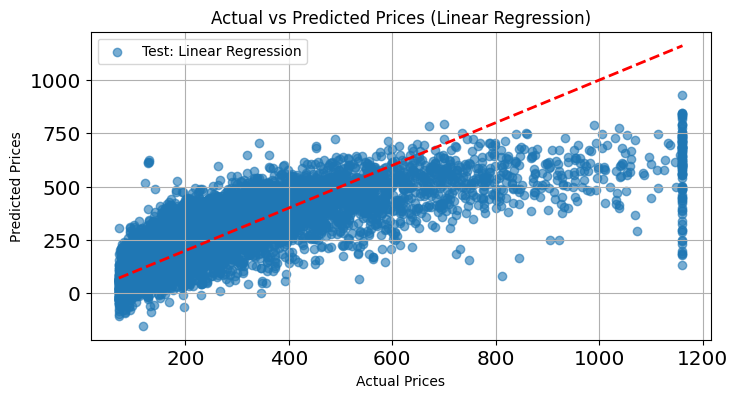

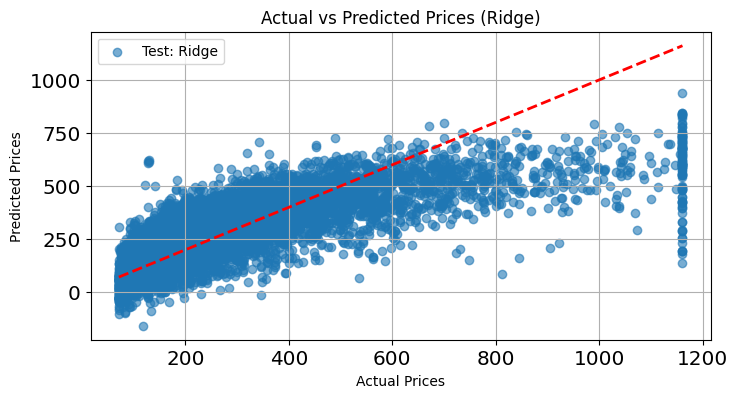

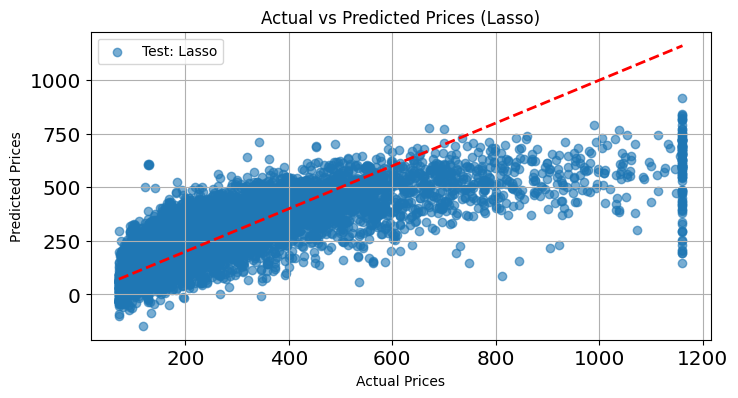

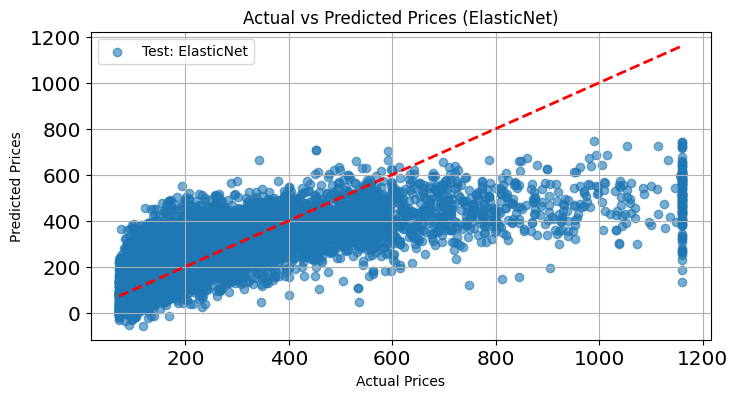

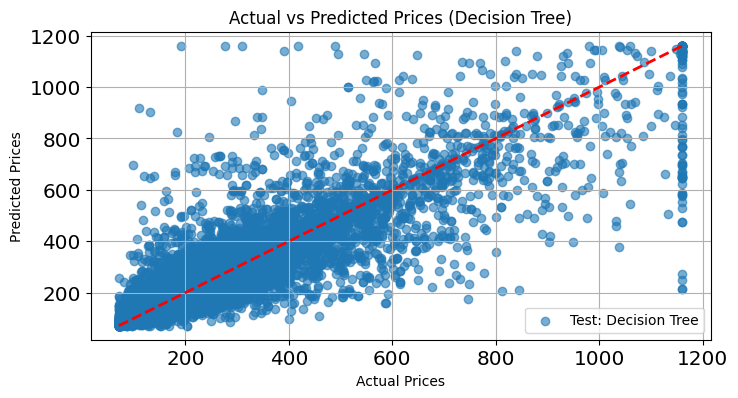

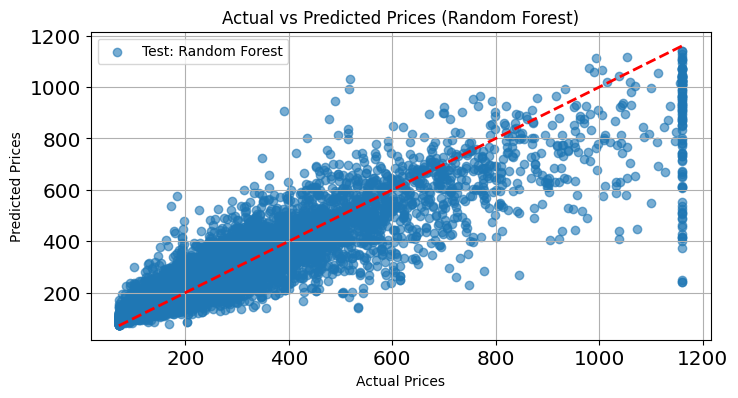

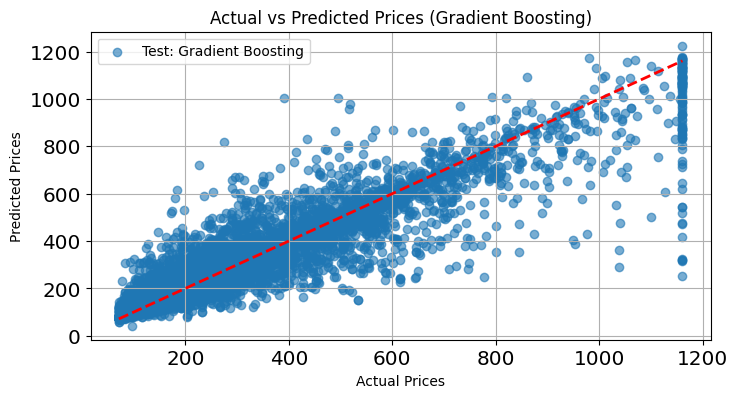

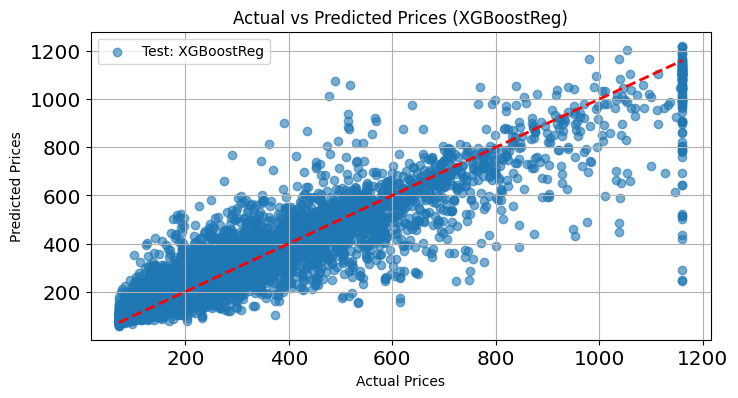

                      Train MSE      Test MSE  Train R2   Test R2
Linear Regression  15688.600128  15398.359255  0.571608  0.583558
Ridge              15768.390596  15473.410116  0.569430  0.581529
Lasso              15901.017430  15629.240122  0.565808  0.577314
ElasticNet         20112.886209  19897.963980  0.450799  0.461869
Decision Tree       2255.926374   9617.192191  0.938400  0.739907
Random Forest       2875.994936   7174.230959  0.921468  0.805976
Gradient Boosting     33.189111   5560.418842  0.999094  0.849621
XGBoostReg             8.545825   5599.633650  0.999767  0.848560


In [ ]:
# model initiation
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha= 7.861352413175666, solver= 'auto'),
    "Lasso": Lasso(alpha= 0.707880765120794, max_iter= 5000),
    "ElasticNet": ElasticNet(alpha= 9.238430003093946, l1_ratio= 0.9849604978990494, max_iter= 10000),
    "Decision Tree": DecisionTreeRegressor(criterion= 'squared_error', max_depth= 19, min_samples_split= 8, min_samples_leaf= 1, max_features= None, splitter= 'best'),
    "Random Forest": RandomForestRegressor(n_estimators= 113, max_depth= 19, min_samples_split= 9, min_samples_leaf= 3, max_features= 'sqrt', bootstrap= False),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators= 147, learning_rate= 0.20033783044498682, max_depth= 18, min_samples_split= 2, subsample= 0.8884914347860629, loss= 'huber'),
    "XGBoostReg": XGBRegressor(n_estimators= 184, learning_rate= 0.19478610691343534, max_depth= 19, subsample= 0.5578783972060642, colsample_bytree= 0.6503292382174248, gamma= 2.338451346544862)
}

results = {}

for name, model in models.items():
    if name == "GradientBoostingRegressor":
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Evaluation
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results[name] = {
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train R2": train_r2,
        "Test R2": test_r2,
    }

   # Visualization
    plt.figure(figsize=(8, 4))
    plt.scatter(y_test, y_test_pred, alpha=0.6, label=f"Test: {name}")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, linestyle="--")
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")
    plt.title(f"Actual vs Predicted Prices ({name})")
    plt.legend()
    plt.grid(True)
    plt.show()

# Show Visualization
results_df = pd.DataFrame(results).T
print(results_df)

1. **Gradient Boosting dan XGBoost Unggul**: Kedua model menunjukkan distribusi prediksi yang paling mendekati garis merah, dengan penyebaran titik yang rapat, terutama pada rentang harga tinggi, menunjukkan akurasi prediksi yang sangat baik.

2. **Linear Regression dan Lasso Kurang Akurat**: Model seperti Linear Regression dan Lasso menunjukkan banyak penyimpangan, terutama pada harga tinggi, di mana prediksi cenderung lebih rendah dibanding nilai aktual.

3. **Random Forest Cukup Stabil**: Random Forest memberikan prediksi yang cukup mendekati nilai aktual, dengan penyebaran titik yang relatif rapat, meskipun sedikit lebih tersebar dibanding Gradient Boosting dan XGBoost.

4. **Decision Tree Overfitting**: Decision Tree memiliki penyebaran yang luas dan banyak penyimpangan, terutama pada harga tinggi, menunjukkan kemungkinan overfitting pada data pelatihan.

5. **Model ElasticNet dan Ridge di Tengah-Tengah**: ElasticNet dan Ridge memiliki kinerja yang lebih baik dibandingkan Linear Regression dan Lasso, tetapi masih kalah akurat dibandingkan Random Forest, Gradient Boosting, dan XGBoost.

Gambaran ini menunjukkan bahwa model ensemble (Gradient Boosting dan XGBoost) lebih efektif dalam menangkap pola data kompleks untuk prediksi harga.

##J. Measurement Comparison

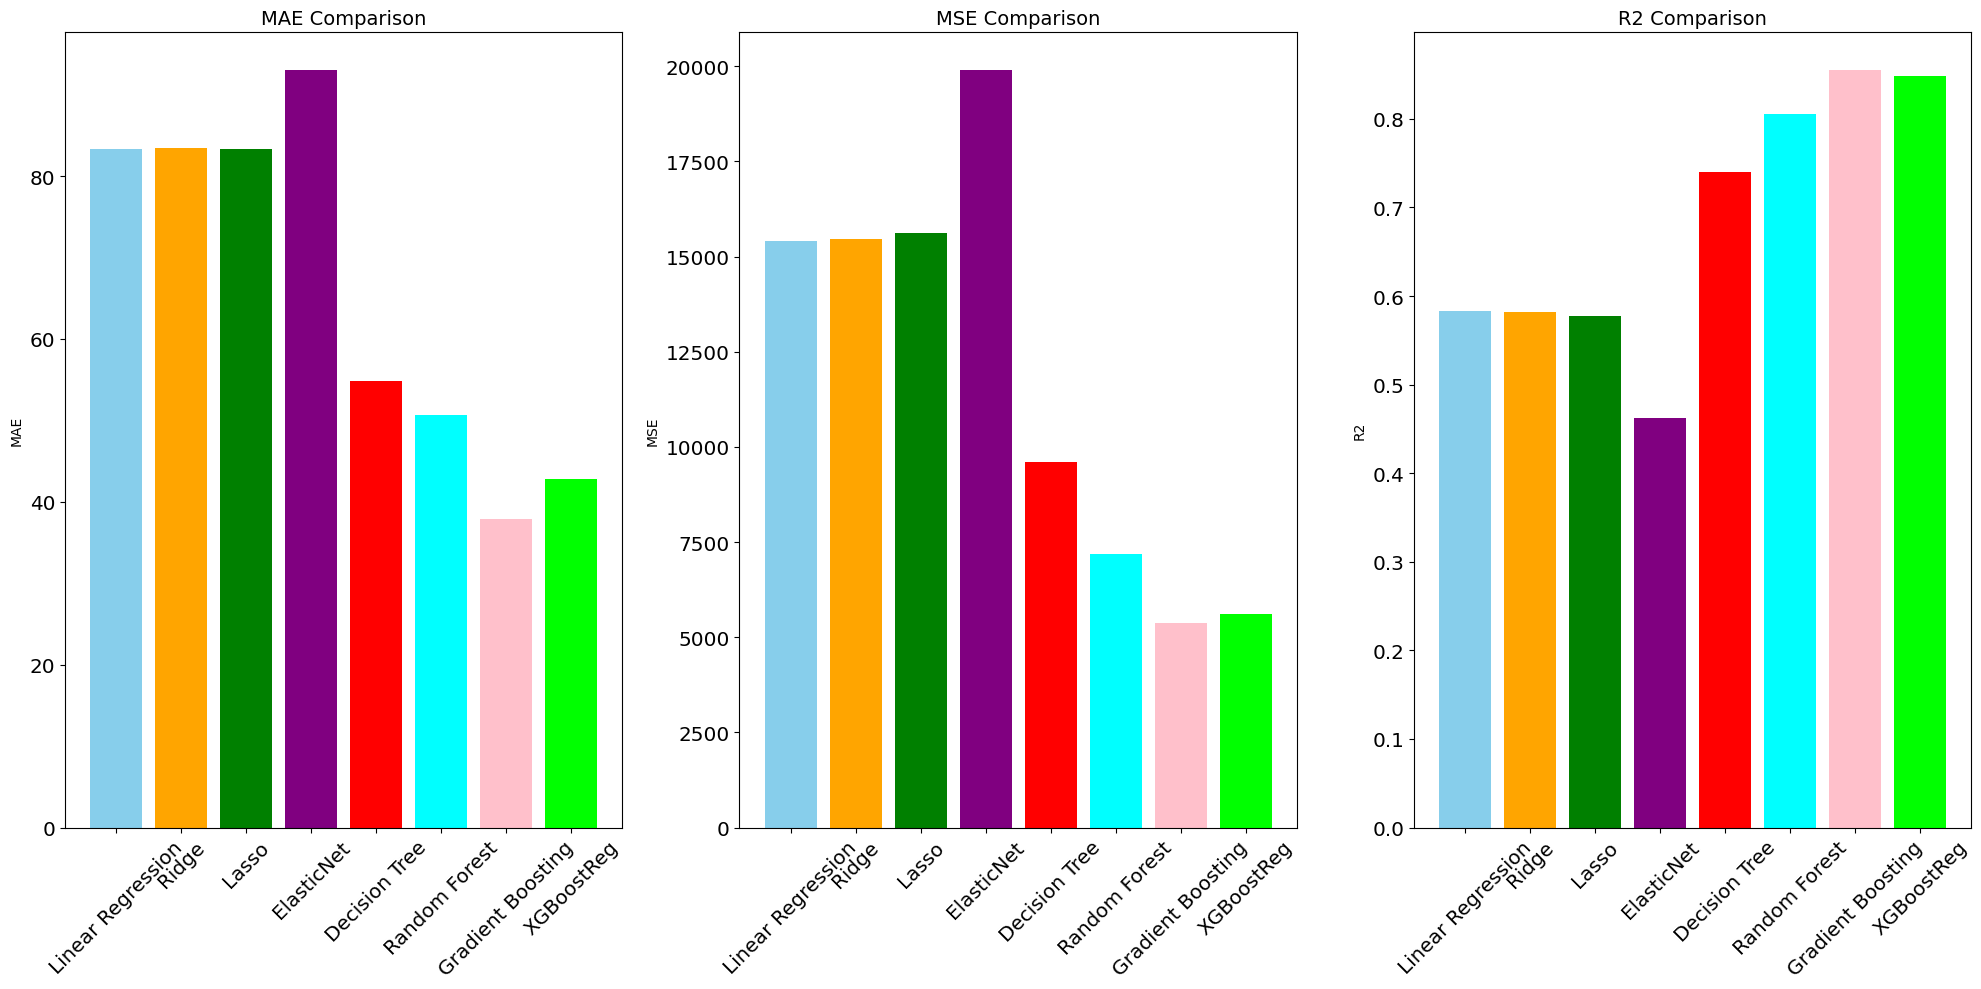

In [ ]:
# Evaluate models
results = {}
for model_name, model in models.items():
    if model_name == "GradientBoostingRegressor":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MAE": mae, "MSE": mse, "R2": r2}

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Visualization
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

metrics = ["MAE", "MSE", "R2"]
colors = ['skyblue', 'orange', 'green', 'purple', 'red', 'cyan', 'pink', 'lime']
for i, metric in enumerate(metrics):
    ax[i].bar(results_df.index, results_df[metric], color=colors)
    ax[i].set_title(f"{metric} Comparison", fontsize=14)
    ax[i].set_ylabel(metric)
    ax[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Berikut adalah 5 poin penting dari grafik di atas:

1. **Gradient Boosting dan Extreme Gradient Boosting Terbaik:** Model Gradient Boosting dan Extreme Gradient Boosting memiliki performa unggul di semua metrik (MAE, MSE, dan R²). Mereka menunjukkan MAE dan MSE paling rendah serta R² mendekati 1, yang mencerminkan akurasi prediksi yang sangat tinggi.

2. **ElasticNet Memiliki Performa Terburuk:** ElasticNet tampil sebagai model dengan performa terburuk, dengan MAE dan MSE tertinggi serta R² yang rendah dibandingkan model lainnya. Hal ini menunjukkan bahwa ElasticNet tidak cocok untuk dataset ini.

3. **Random Forest Regressor Stabil:** Random Forest menunjukkan performa yang solid dengan nilai MAE dan MSE yang rendah serta R² yang tinggi. Meskipun tidak sebaik Gradient Boosting, model ini masih kompetitif dan stabil.

4. **Model Regresi Konvensional Kurang Kompetitif:** Model Linear Regression, Ridge, dan Lasso memiliki metrik yang lebih buruk dibandingkan model berbasis pohon. Nilai MAE dan MSE mereka cukup tinggi, dan R² berada di bawah model seperti Gradient Boosting dan Random Forest.

5. **Model Berbasis Pohon Lebih Akurat:** Secara keseluruhan, model berbasis pohon (Decision Tree, Random Forest, Gradient Boosting, dan Extreme Gradient Boosting) menunjukkan keunggulan yang jelas dibandingkan model regresi berbasis linear, baik dalam hal kesalahan prediksi (MAE dan MSE) maupun kemampuan menjelaskan variabilitas data (R²).

#Metode SHAP

In [ ]:
pip install shap

 99%|===================| 40781/41365 [01:04<00:00]       

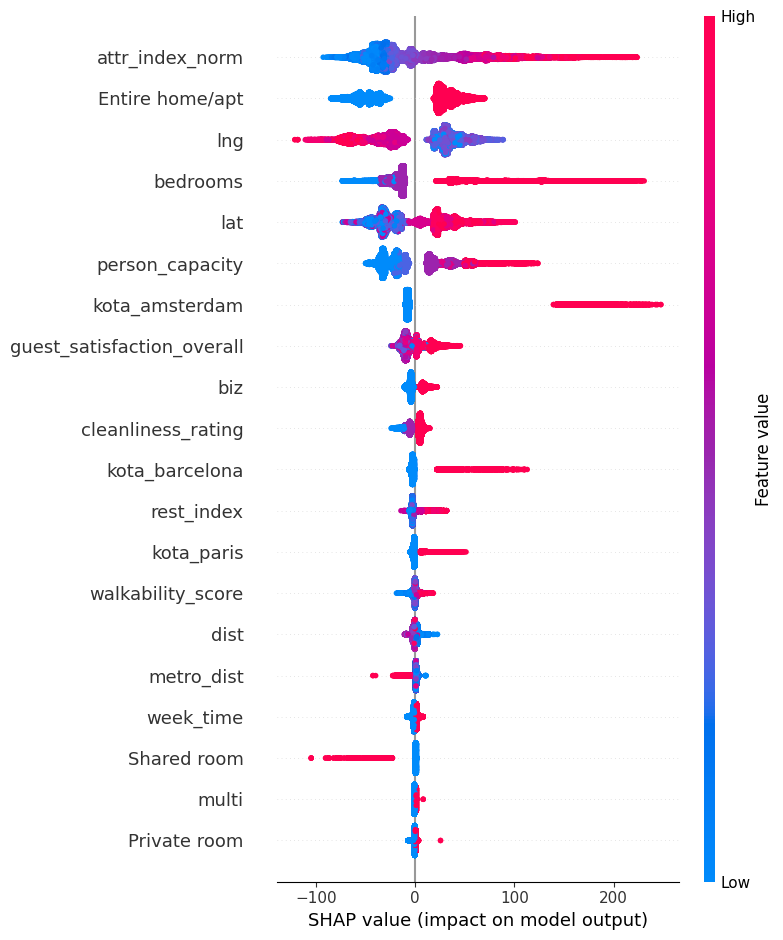

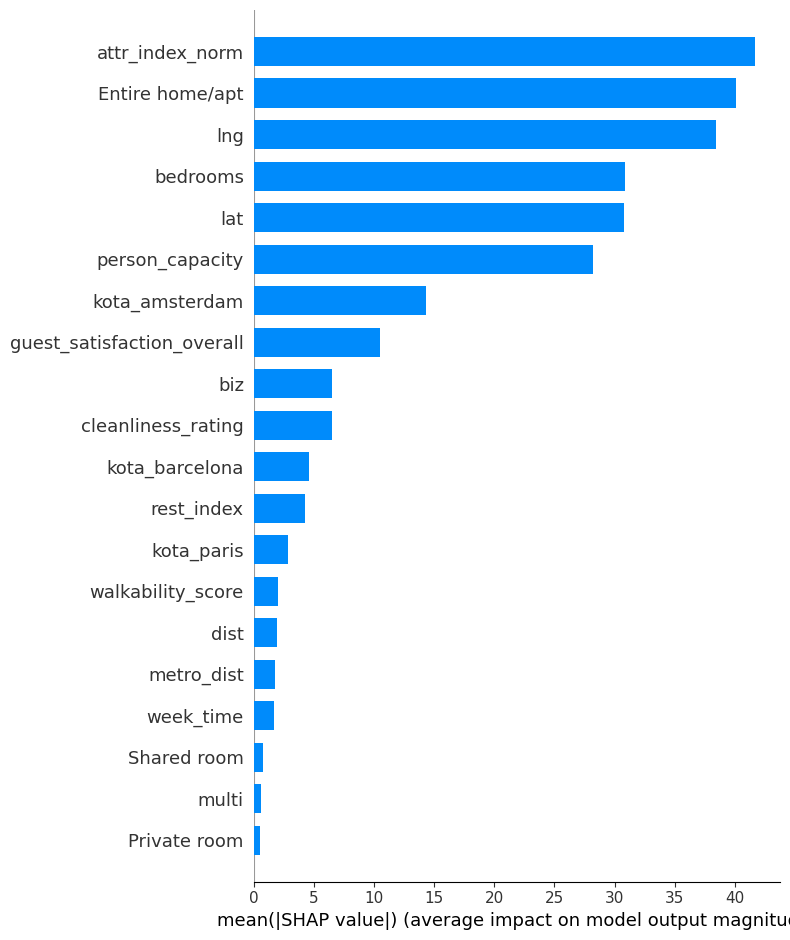

In [ ]:
import pandas as pd
import shap
import xgboost as xgb
import numpy as np

from sklearn.ensemble import GradientBoostingRegressor

# Inisialisasi SHAP
shap.initjs()

# Inisialisasi dan pelatihan model XGBoost
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Buat SHAP Explainer dengan model dan data
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)

# Visualisasi pengaruh fitur pada instance ke-0
shap.force_plot(
    explainer.expected_value,  # Nilai harapan model
    shap_values[0].values,    # SHAP values untuk instance ke-0
    X_train.iloc[0, :]        # Data input untuk instance ke-0
)
# Membuat SHAP explainer
explainer = shap.TreeExplainer(model)

# Menghitung SHAP values
shap_values = explainer.shap_values(X)

# Visualisasi feature importance
shap.summary_plot(shap_values, X)

# Jika ingin melihat bar plot
shap.summary_plot(shap_values, X, plot_type="bar")

Gambar di atas adalah diagram SHAP (SHapley Additive exPlanations) yang menunjukkan dampak fitur-fitur pada output model prediksi. Sumbu horizontal mewakili nilai SHAP, di mana nilai positif menunjukkan kontribusi terhadap peningkatan prediksi, dan nilai negatif menunjukkan pengurangan prediksi. Fitur diurutkan berdasarkan dampak rata-rata mereka, dengan fitur teratas, seperti `attr_index_norm`, memberikan kontribusi terbesar terhadap prediksi. Warna menunjukkan nilai fitur, dari rendah (biru) ke tinggi (merah). Misalnya, `Entire home/apt` dengan nilai tinggi (merah) cenderung meningkatkan prediksi, sementara fitur seperti `metro_dist` dengan nilai tinggi cenderung mengurangi prediksi. Diagram ini memberikan wawasan tentang pentingnya setiap fitur dan bagaimana mereka memengaruhi model secara keseluruhan.

#Business Insight

Dari hasil evaluasi, terlihat bahwa harga per orang adalah faktor kunci dalam pengambilan keputusan pelanggan, sehingga penyesuaian strategi harga dapat memberikan dampak besar terhadap daya tarik listing. Kapasitas akomodasi juga menjadi peluang, terutama untuk menarik kelompok besar atau keluarga. Walaupun tidak sepenting harga, kualitas layanan seperti kebersihan dan reputasi host tetap penting untuk meningkatkan loyalitas pelanggan. Selain itu, lokasi yang strategis, seperti dekat transportasi umum, dapat menambah daya tarik listing tertentu.

#Rekomendasi dan Action Items

Sebagai rekomendasi, perusahaan dapat mengoptimalkan strategi harga dengan memberikan diskon dinamis berdasarkan musim atau permintaan untuk meningkatkan daya tarik listing. Promosikan listing dengan kapasitas besar untuk memenuhi kebutuhan kelompok pelanggan tertentu. Selain itu, edukasi host untuk meningkatkan kualitas layanan, seperti kebersihan dan menjadi superhost, agar dapat meningkatkan tingkat kepuasan pelanggan. Fokuskan pemasaran pada properti yang berada di lokasi strategis untuk menarik lebih banyak pelanggan yang mempertimbangkan kemudahan akses.

#Saving Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

# Save preprocessed data to a pickle file
preprocessed_data = {
    'X_train': X_train_scaled,  # Scaled train data
    'X_test': X_test_scaled,    # Scaled test data
    'y_train': y_train,         # Target variable for train data
    'y_test': y_test            # Target variable for test data
}

# Save the preprocessed data to a file
with open('preprocessed_data.pkl', 'wb') as f:
    pickle.dump(preprocessed_data, f)

print("Preprocessed data saved to 'preprocessed_data.pkl'")

Preprocessed data saved to 'preprocessed_data.pkl'


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
import pickle
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score

# Load preprocessed data
with open('preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

# Create pipeline
pipeline_gboost = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Cross-validation
print("Performing cross-validation for Gradient Boosting...")
cv_scores_gboost = cross_val_score(pipeline_gboost, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_rmse_gboost = (-cv_scores_gboost.mean()) ** 0.5
print(f"Gradient Boosting Cross-Validation RMSE (mean): {mean_cv_rmse_gboost:.4f}")

# Define additional scoring metrics
scorer_mae = make_scorer(mean_absolute_error, greater_is_better=False)
scorer_r2 = make_scorer(r2_score)

# Cross-validation for MAE
cv_mae_scores_gboost = cross_val_score(pipeline_gboost, X_train, y_train, cv=5, scoring=scorer_mae)
mean_cv_mae_gboost = -cv_mae_scores_gboost.mean()
print(f"Gradient Boosting Cross-Validation MAE (mean): {mean_cv_mae_gboost:.4f}")

# Cross-validation for R²
cv_r2_scores_gboost = cross_val_score(pipeline_gboost, X_train, y_train, cv=5, scoring=scorer_r2)
mean_cv_r2_gboost = cv_r2_scores_gboost.mean()
print(f"Gradient Boosting Cross-Validation R² (mean): {mean_cv_r2_gboost:.4f}")

# Hyperparameter tuning
print("Performing hyperparameter tuning for Gradient Boosting...")
param_grid_gboost = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0]
}
random_search_gboost = RandomizedSearchCV(pipeline_gboost, param_grid_gboost, cv=3, n_iter=10, scoring='neg_mean_squared_error', random_state=42)
random_search_gboost.fit(X_train, y_train)

best_model_gboost = random_search_gboost.best_estimator_
print(f"Best parameters for Gradient Boosting: {random_search_gboost.best_params_}")

# Test evaluation
y_pred_gboost = best_model_gboost.predict(X_test)

# Compute evaluation metrics
mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)
rmse_gboost = mse_gboost ** 0.5
r2_gboost = r2_score(y_test, y_pred_gboost)

print(f"Test Evaluation Metrics for Gradient Boosting:")
print(f"MAE: {mae_gboost:.4f}")
print(f"RMSE: {rmse_gboost:.4f}")
print(f"R²: {r2_gboost:.4f}")


# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Pastikan direktori tersedia
import os
model_dir = '/content/drive/My Drive/Model/'
os.makedirs(model_dir, exist_ok=True)  # Membuat direktori jika belum ada

# Simpan model
model_file_path_gboost = '/content/drive/My Drive/Model/GradientBoosting_with_scaler.pkl'
with open(model_file_path_gboost, 'wb') as f:
    pickle.dump({
        'best_model': best_model_gboost,
        'best_params': random_search_gboost.best_params_,
        'cv_results': random_search_gboost.cv_results_,
        'cv_scores': cv_scores_gboost,
        'scaler': best_model_gboost.named_steps['scaler']
    }, f)

print(f"Gradient Boosting model saved to {model_file_path_gboost}")

Performing cross-validation for Gradient Boosting...
Gradient Boosting Cross-Validation RMSE (mean): 107.3299
Gradient Boosting Cross-Validation MAE (mean): 66.3956
Gradient Boosting Cross-Validation R² (mean): 0.6855
Performing hyperparameter tuning for Gradient Boosting...
Best parameters for Gradient Boosting: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__max_depth': 10, 'model__learning_rate': 0.1}
Test Evaluation Metrics for Gradient Boosting:
MAE: 50.5430
RMSE: 79.9444
R²: 0.8272
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Gradient Boosting model saved to /content/drive/My Drive/Model/GradientBoosting_with_scaler.pkl


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from joblib import dump, load
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score

# Load preprocessed data
with open('preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']

# Create pipeline
pipeline_gboost = Pipeline([
    ('scaler', StandardScaler()),
    ('model', GradientBoostingRegressor(random_state=42))
])

# Cross-validation
print("Performing cross-validation for Gradient Boosting...")
cv_scores_gboost = cross_val_score(pipeline_gboost, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_rmse_gboost = (-cv_scores_gboost.mean()) ** 0.5
print(f"Gradient Boosting Cross-Validation RMSE (mean): {mean_cv_rmse_gboost:.4f}")

# Define additional scoring metrics
scorer_mae = make_scorer(mean_absolute_error, greater_is_better=False)
scorer_r2 = make_scorer(r2_score)

# Cross-validation for MAE
cv_mae_scores_gboost = cross_val_score(pipeline_gboost, X_train, y_train, cv=5, scoring=scorer_mae)
mean_cv_mae_gboost = -cv_mae_scores_gboost.mean()
print(f"Gradient Boosting Cross-Validation MAE (mean): {mean_cv_mae_gboost:.4f}")

# Cross-validation for R²
cv_r2_scores_gboost = cross_val_score(pipeline_gboost, X_train, y_train, cv=5, scoring=scorer_r2)
mean_cv_r2_gboost = cv_r2_scores_gboost.mean()
print(f"Gradient Boosting Cross-Validation R² (mean): {mean_cv_r2_gboost:.4f}")

# Hyperparameter tuning
print("Performing hyperparameter tuning for Gradient Boosting...")
param_grid_gboost = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [3, 5, 10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0]
}
random_search_gboost = RandomizedSearchCV(pipeline_gboost, param_grid_gboost, cv=3, n_iter=10, scoring='neg_mean_squared_error', random_state=42)
random_search_gboost.fit(X_train, y_train)

best_model_gboost = random_search_gboost.best_estimator_
print(f"Best parameters for Gradient Boosting: {random_search_gboost.best_params_}")

# Test evaluation
y_pred_gboost = best_model_gboost.predict(X_test)

# Compute evaluation metrics
mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)
rmse_gboost = mse_gboost ** 0.5
r2_gboost = r2_score(y_test, y_pred_gboost)

print(f"Test Evaluation Metrics for Gradient Boosting:")
print(f"MAE: {mae_gboost:.4f}")
print(f"RMSE: {rmse_gboost:.4f}")
print(f"R²: {r2_gboost:.4f}")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Pastikan direktori tersedia
import os
model_dir = '/content/drive/My Drive/Model/'
os.makedirs(model_dir, exist_ok=True)  # Membuat direktori jika belum ada

# Simpan model menggunakan joblib
model_file_path_gboost = '/content/drive/My Drive/Model/GradientBoosting_with_scaler.joblib'
dump({
    'best_model': best_model_gboost,
    'best_params': random_search_gboost.best_params_,
    'cv_results': random_search_gboost.cv_results_,
    'cv_scores': cv_scores_gboost,
    'scaler': best_model_gboost.named_steps['scaler']
}, model_file_path_gboost)

print(f"Gradient Boosting model saved to {model_file_path_gboost}")


Performing cross-validation for Gradient Boosting...
Gradient Boosting Cross-Validation RMSE (mean): 107.3299
Gradient Boosting Cross-Validation MAE (mean): 66.3956
Gradient Boosting Cross-Validation R² (mean): 0.6855
Performing hyperparameter tuning for Gradient Boosting...
Best parameters for Gradient Boosting: {'model__subsample': 0.8, 'model__n_estimators': 100, 'model__max_depth': 10, 'model__learning_rate': 0.1}
Test Evaluation Metrics for Gradient Boosting:
MAE: 50.5430
RMSE: 79.9444
R²: 0.8272
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Gradient Boosting model saved to /content/drive/My Drive/Model/GradientBoosting_with_scaler.joblib
